## References

In [1]:
# https://radimrehurek.com/gensim/tut2.html#Gensim    
# https://markroxor.github.io/gensim/static/notebooks/lda_training_tips.html
# https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
# https://pypi.org/project/pyLDAvis/1.0.0/
# https://gist.github.com/tokestermw/3588e6fbbb2f03f89798
# https://stackoverflow.com/questions/11162402/lda-topic-modeling-training-and-testing
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

## Prepare Notebook

In [96]:
# import packages
import os.path
from gensim import corpora, models
import logging
import pickle
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim
import pyLDAvis
from wordcloud import WordCloud

In [93]:
# display plots within notebook
%matplotlib inline

In [3]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Vectorized Corpora and Dictionaries

In [4]:
# load no pooling corpus
if (os.path.exists("tourism_no_pooling.dict")):
   dictionary_no_pooling = corpora.Dictionary.load('tourism_no_pooling.dict')
   corpus_no_pooling = corpora.MmCorpus('tourism_no_pooling.mm')
   print("Vectorized no pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load user pooling corpus
if (os.path.exists("tourism_user_pooling.dict")):
   dictionary_user_pooling = corpora.Dictionary.load('tourism_user_pooling.dict')
   corpus_user_pooling = corpora.MmCorpus('tourism_user_pooling.mm')
   print("Vectorized user pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load hashtag pooling corpus
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary_hashtag_pooling = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   corpus_hashtag_pooling = corpora.MmCorpus('tourism_hashtag_pooling.mm')
   print("Vectorized hashtag pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

2018-09-21 22:37:25,126 : INFO : loading Dictionary object from tourism_no_pooling.dict
2018-09-21 22:37:25,132 : INFO : loaded tourism_no_pooling.dict
2018-09-21 22:37:25,137 : INFO : loaded corpus index from tourism_no_pooling.mm.index
2018-09-21 22:37:25,138 : INFO : initializing cython corpus reader from tourism_no_pooling.mm
2018-09-21 22:37:25,142 : INFO : accepted corpus with 7633 documents, 5035 features, 41550 non-zero entries
2018-09-21 22:37:25,144 : INFO : loading Dictionary object from tourism_user_pooling.dict
2018-09-21 22:37:25,150 : INFO : loaded tourism_user_pooling.dict
2018-09-21 22:37:25,153 : INFO : loaded corpus index from tourism_user_pooling.mm.index
2018-09-21 22:37:25,154 : INFO : initializing cython corpus reader from tourism_user_pooling.mm
2018-09-21 22:37:25,157 : INFO : accepted corpus with 4424 documents, 4185 features, 33668 non-zero entries
2018-09-21 22:37:25,160 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-09-21 22:37:25

Vectorized no pooling corpus loaded!
Vectorized user pooling corpus loaded!
Vectorized hashtag pooling corpus loaded!


## Implement LDA Models with Different Pooling Methods

In [52]:
# train no pooling model
lda_model_no_pooling = models.LdaModel(corpus_no_pooling,
                                       id2word=dictionary_no_pooling,
                                       alpha='auto', eta='auto',
                                       eval_every=1,
                                       iterations=400, passes=20, num_topics=6)

2018-09-22 00:34:14,454 : INFO : using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
2018-09-22 00:34:14,458 : INFO : using serial LDA version on this node
2018-09-22 00:34:14,465 : INFO : running online (multi-pass) LDA training, 6 topics, 20 passes over the supplied corpus of 7633 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-09-22 00:34:15,560 : INFO : -10.053 per-word bound, 1062.2 perplexity estimate based on a held-out corpus of 2000 documents with 11237 words
2018-09-22 00:34:15,561 : INFO : PROGRESS: pass 0, at document #2000/7633
2018-09-22 00:34:16,444 : INFO : optimized alpha [0.12779114, 0.12681617, 0.14731577, 0.13240604, 0.13252465, 0.12872756]
2018-09-22 00:34:16,446 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:34:16,452 : INFO : topic #1 (0.127): 0.025*"sagra

2018-09-22 00:34:22,131 : INFO : topic #2 (0.175): 0.087*"sagrada" + 0.051*"familia" + 0.033*"basílica" + 0.030*"photo" + 0.028*"família" + 0.028*"posted" + 0.023*"gothic" + 0.021*"quarter" + 0.015*"#sagradafamilia" + 0.009*"barceloneta"
2018-09-22 00:34:22,134 : INFO : topic diff=0.507023, rho=0.414638
2018-09-22 00:34:23,135 : INFO : -8.012 per-word bound, 258.1 perplexity estimate based on a held-out corpus of 2000 documents with 11140 words
2018-09-22 00:34:23,136 : INFO : PROGRESS: pass 1, at document #4000/7633
2018-09-22 00:34:23,663 : INFO : optimized alpha [0.11839923, 0.11903283, 0.18058635, 0.12389509, 0.12144719, 0.11807507]
2018-09-22 00:34:23,665 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:34:23,671 : INFO : topic #5 (0.118): 0.017*"milà" + 0.015*"drinking" + 0.015*"pedreracasa" + 0.011*"parc" + 0.007*"hotel" + 0.007*"night" + 0.006*"#photo" + 0.006*"day" + 0.006*"laberint" + 0.006*"#arteurbano"
2018-09-22 00:34:23,673 : INFO 

2018-09-22 00:34:27,770 : INFO : topic diff=0.258377, rho=0.383018
2018-09-22 00:34:28,358 : INFO : -7.946 per-word bound, 246.5 perplexity estimate based on a held-out corpus of 2000 documents with 10914 words
2018-09-22 00:34:28,360 : INFO : PROGRESS: pass 2, at document #6000/7633
2018-09-22 00:34:28,778 : INFO : optimized alpha [0.11696578, 0.1166544, 0.19602248, 0.12459347, 0.12068957, 0.11513174]
2018-09-22 00:34:28,780 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:34:28,786 : INFO : topic #5 (0.115): 0.018*"milà" + 0.016*"drinking" + 0.016*"pedreracasa" + 0.009*"parc" + 0.009*"hotel" + 0.008*"#arteurbano" + 0.008*"#digerible" + 0.008*"#streetart" + 0.008*"casa" + 0.007*"day"
2018-09-22 00:34:28,788 : INFO : topic #1 (0.117): 0.015*"drinking" + 0.013*"#photo" + 0.012*"love" + 0.009*"#beach" + 0.008*"día" + 0.008*"i'm" + 0.007*"happy" + 0.007*"cada" + 0.007*"nuestra" + 0.007*"cervecita"
2018-09-22 00:34:28,790 : INFO : topic #4 (0.121): 

2018-09-22 00:34:33,735 : INFO : PROGRESS: pass 3, at document #7633/7633
2018-09-22 00:34:34,098 : INFO : optimized alpha [0.11668184, 0.11738668, 0.20838171, 0.13027133, 0.12270269, 0.11521581]
2018-09-22 00:34:34,100 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-09-22 00:34:34,105 : INFO : topic #5 (0.115): 0.019*"milà" + 0.017*"pedreracasa" + 0.015*"parc" + 0.013*"drinking" + 0.009*"#arteurbano" + 0.009*"hotel" + 0.008*"casa" + 0.008*"españa" + 0.008*"#streetart" + 0.007*"#digerible"
2018-09-22 00:34:34,107 : INFO : topic #0 (0.117): 0.012*"festival" + 0.011*"#gaudi" + 0.010*"#sagradafamilia" + 0.008*"#travel" + 0.007*"right" + 0.007*"#photography" + 0.007*"arena" + 0.007*"beach" + 0.006*"love" + 0.006*"back"
2018-09-22 00:34:34,109 : INFO : topic #4 (0.123): 0.020*"gothic" + 0.018*"quarter" + 0.017*"wa" + 0.015*"last" + 0.014*"day" + 0.013*"beach" + 0.010*"city" + 0.010*"#art" + 0.009*"night" + 0.007*"view"
2018-09-22 00:34:34,112 : INFO : topic 

2018-09-22 00:34:39,750 : INFO : topic #5 (0.111): 0.019*"milà" + 0.016*"pedreracasa" + 0.014*"drinking" + 0.012*"parc" + 0.010*"hotel" + 0.008*"casa" + 0.007*"#arteurbano" + 0.007*"españa" + 0.007*"night" + 0.006*"#streetart"
2018-09-22 00:34:39,751 : INFO : topic #1 (0.112): 0.018*"drinking" + 0.012*"#photo" + 0.012*"love" + 0.009*"fashion" + 0.008*"#beach" + 0.007*"día" + 0.007*"i'm" + 0.006*"#summer" + 0.006*"que" + 0.006*"#photooftheday"
2018-09-22 00:34:39,753 : INFO : topic #4 (0.123): 0.019*"gothic" + 0.017*"quarter" + 0.016*"wa" + 0.015*"last" + 0.014*"day" + 0.010*"beach" + 0.009*"#art" + 0.009*"night" + 0.008*"city" + 0.007*"one"
2018-09-22 00:34:39,755 : INFO : topic #3 (0.131): 0.015*"time" + 0.013*"one" + 0.009*"barcelona)" + 0.008*"wa" + 0.008*"ever" + 0.008*"come" + 0.007*"day" + 0.007*"year" + 0.007*"best" + 0.006*"see"
2018-09-22 00:34:39,757 : INFO : topic #2 (0.205): 0.096*"sagrada" + 0.058*"familia" + 0.036*"basílica" + 0.032*"photo" + 0.029*"posted" + 0.029*"famíl

2018-09-22 00:34:44,916 : INFO : topic #1 (0.112): 0.021*"drinking" + 0.015*"#photo" + 0.011*"love" + 0.009*"#beach" + 0.008*"día" + 0.008*"i'm" + 0.007*"#summer" + 0.007*"#photooftheday" + 0.006*"cada" + 0.006*"nuestra"
2018-09-22 00:34:44,918 : INFO : topic #4 (0.124): 0.020*"gothic" + 0.017*"quarter" + 0.016*"wa" + 0.014*"last" + 0.014*"day" + 0.012*"beach" + 0.011*"#art" + 0.010*"city" + 0.009*"night" + 0.007*"one"
2018-09-22 00:34:44,920 : INFO : topic #3 (0.134): 0.015*"time" + 0.013*"one" + 0.009*"wa" + 0.009*"barcelona)" + 0.008*"day" + 0.008*"ever" + 0.008*"back" + 0.007*"best" + 0.007*"come" + 0.006*"#graffiti"
2018-09-22 00:34:44,922 : INFO : topic #2 (0.210): 0.105*"sagrada" + 0.066*"familia" + 0.035*"basílica" + 0.032*"photo" + 0.028*"posted" + 0.028*"família" + 0.026*"#sagradafamilia" + 0.020*"gothic" + 0.018*"quarter" + 0.008*"#gaudi"
2018-09-22 00:34:44,924 : INFO : topic diff=0.161293, rho=0.304058
2018-09-22 00:34:45,537 : INFO : -7.850 per-word bound, 230.7 perplexit

2018-09-22 00:34:50,412 : INFO : topic #4 (0.128): 0.025*"gothic" + 0.022*"quarter" + 0.017*"wa" + 0.016*"day" + 0.015*"last" + 0.014*"beach" + 0.010*"city" + 0.009*"#art" + 0.008*"night" + 0.007*"marbella"
2018-09-22 00:34:50,415 : INFO : topic #3 (0.136): 0.015*"time" + 0.015*"one" + 0.010*"wa" + 0.009*"ever" + 0.008*"barcelona)" + 0.008*"day" + 0.008*"come" + 0.008*"best" + 0.008*"i've" + 0.007*"year"
2018-09-22 00:34:50,417 : INFO : topic #2 (0.212): 0.107*"sagrada" + 0.069*"familia" + 0.036*"photo" + 0.035*"basílica" + 0.033*"posted" + 0.029*"#sagradafamilia" + 0.027*"família" + 0.016*"gothic" + 0.014*"quarter" + 0.009*"#gaudi"
2018-09-22 00:34:50,419 : INFO : topic diff=0.143522, rho=0.290908
2018-09-22 00:34:50,957 : INFO : -7.955 per-word bound, 248.2 perplexity estimate based on a held-out corpus of 1633 documents with 9022 words
2018-09-22 00:34:50,958 : INFO : PROGRESS: pass 7, at document #7633/7633
2018-09-22 00:34:51,309 : INFO : optimized alpha [0.11599065, 0.11391558, 0

2018-09-22 00:34:56,161 : INFO : topic #3 (0.141): 0.015*"one" + 0.014*"time" + 0.010*"wa" + 0.009*"ever" + 0.008*"best" + 0.008*"day" + 0.008*"come" + 0.008*"amazing" + 0.007*"barcelona)" + 0.007*"see"
2018-09-22 00:34:56,163 : INFO : topic #2 (0.214): 0.101*"sagrada" + 0.065*"familia" + 0.039*"photo" + 0.037*"posted" + 0.034*"basílica" + 0.027*"#sagradafamilia" + 0.027*"família" + 0.013*"gothic" + 0.012*"barceloneta" + 0.012*"quarter"
2018-09-22 00:34:56,165 : INFO : topic diff=0.136962, rho=0.279329
2018-09-22 00:34:56,758 : INFO : -7.939 per-word bound, 245.3 perplexity estimate based on a held-out corpus of 2000 documents with 11237 words
2018-09-22 00:34:56,760 : INFO : PROGRESS: pass 9, at document #2000/7633
2018-09-22 00:34:57,161 : INFO : optimized alpha [0.11476826, 0.1110459, 0.20798419, 0.14034894, 0.13199231, 0.10962763]
2018-09-22 00:34:57,163 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:34:57,169 : INFO : topic #5 (0.110): 0.

2018-09-22 00:35:01,261 : INFO : topic #2 (0.208): 0.102*"sagrada" + 0.062*"familia" + 0.037*"basílica" + 0.034*"photo" + 0.031*"posted" + 0.030*"família" + 0.027*"#sagradafamilia" + 0.009*"gothic" + 0.009*"#gaudi" + 0.009*"barceloneta"
2018-09-22 00:35:01,262 : INFO : topic diff=0.137427, rho=0.259793
2018-09-22 00:35:01,855 : INFO : -7.795 per-word bound, 222.1 perplexity estimate based on a held-out corpus of 2000 documents with 11140 words
2018-09-22 00:35:01,856 : INFO : PROGRESS: pass 10, at document #4000/7633
2018-09-22 00:35:02,282 : INFO : optimized alpha [0.11500975, 0.11142325, 0.21018165, 0.14275275, 0.13495229, 0.10913703]
2018-09-22 00:35:02,284 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:35:02,290 : INFO : topic #5 (0.109): 0.020*"milà" + 0.018*"pedreracasa" + 0.016*"drinking" + 0.013*"parc" + 0.010*"hotel" + 0.007*"casa" + 0.007*"#arteurbano" + 0.007*"#streetart" + 0.007*"españa" + 0.006*"laberint"
2018-09-22 00:35:02,291 :

2018-09-22 00:35:06,258 : INFO : topic diff=0.111418, rho=0.251446
2018-09-22 00:35:06,863 : INFO : -7.804 per-word bound, 223.4 perplexity estimate based on a held-out corpus of 2000 documents with 10914 words
2018-09-22 00:35:06,864 : INFO : PROGRESS: pass 11, at document #6000/7633
2018-09-22 00:35:07,289 : INFO : optimized alpha [0.11619853, 0.11181775, 0.21230003, 0.14565782, 0.13891575, 0.11006788]
2018-09-22 00:35:07,291 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:35:07,297 : INFO : topic #5 (0.110): 0.020*"milà" + 0.018*"pedreracasa" + 0.017*"drinking" + 0.012*"hotel" + 0.011*"parc" + 0.009*"#arteurbano" + 0.008*"casa" + 0.008*"#streetart" + 0.008*"#digerible" + 0.007*"españa"
2018-09-22 00:35:07,298 : INFO : topic #1 (0.112): 0.021*"drinking" + 0.017*"#photo" + 0.010*"love" + 0.010*"#beach" + 0.009*"día" + 0.008*"cada" + 0.008*"#photooftheday" + 0.007*"nuestra" + 0.007*"cervecita" + 0.007*"#summer"
2018-09-22 00:35:07,300 : INFO : 

2018-09-22 00:35:12,433 : INFO : PROGRESS: pass 12, at document #7633/7633
2018-09-22 00:35:12,801 : INFO : optimized alpha [0.11726139, 0.11384266, 0.21522941, 0.15083165, 0.14343667, 0.11185651]
2018-09-22 00:35:12,803 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-09-22 00:35:12,809 : INFO : topic #5 (0.112): 0.021*"milà" + 0.019*"pedreracasa" + 0.015*"parc" + 0.014*"drinking" + 0.011*"hotel" + 0.010*"#arteurbano" + 0.009*"casa" + 0.008*"españa" + 0.008*"#streetart" + 0.008*"#digerible"
2018-09-22 00:35:12,811 : INFO : topic #1 (0.114): 0.022*"drinking" + 0.016*"#photo" + 0.011*"fashion" + 0.011*"#beach" + 0.010*"día" + 0.009*"love" + 0.009*"#summer" + 0.008*"cada" + 0.008*"nuestra" + 0.008*"cervecita"
2018-09-22 00:35:12,813 : INFO : topic #4 (0.143): 0.053*"gothic" + 0.047*"quarter" + 0.017*"beach" + 0.015*"wa" + 0.015*"day" + 0.013*"last" + 0.011*"city" + 0.009*"#art" + 0.008*"night" + 0.007*"marbella"
2018-09-22 00:35:12,814 : INFO : topic #3 (0

2018-09-22 00:35:18,178 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:35:18,185 : INFO : topic #5 (0.111): 0.020*"milà" + 0.018*"pedreracasa" + 0.015*"drinking" + 0.013*"parc" + 0.012*"hotel" + 0.009*"casa" + 0.008*"#arteurbano" + 0.007*"españa" + 0.007*"#streetart" + 0.007*"#digerible"
2018-09-22 00:35:18,187 : INFO : topic #1 (0.112): 0.022*"drinking" + 0.015*"#photo" + 0.010*"love" + 0.009*"fashion" + 0.009*"#beach" + 0.008*"día" + 0.007*"#photooftheday" + 0.007*"#summer" + 0.007*"que" + 0.007*"cada"
2018-09-22 00:35:18,189 : INFO : topic #4 (0.144): 0.049*"gothic" + 0.044*"quarter" + 0.015*"wa" + 0.015*"day" + 0.014*"beach" + 0.013*"last" + 0.009*"city" + 0.009*"#art" + 0.008*"night" + 0.007*"one"
2018-09-22 00:35:18,192 : INFO : topic #3 (0.152): 0.015*"one" + 0.015*"time" + 0.010*"wa" + 0.009*"best" + 0.009*"ever" + 0.009*"barcelona)" + 0.008*"day" + 0.008*"come" + 0.007*"year" + 0.007*"see"
2018-09-22 00:35:18,194 : INFO : topic #2 (0.

2018-09-22 00:35:23,311 : INFO : topic #1 (0.113): 0.023*"drinking" + 0.017*"#photo" + 0.010*"love" + 0.009*"#beach" + 0.008*"día" + 0.007*"#photooftheday" + 0.007*"#summer" + 0.007*"fashion" + 0.007*"cada" + 0.007*"nuestra"
2018-09-22 00:35:23,313 : INFO : topic #4 (0.146): 0.048*"gothic" + 0.043*"quarter" + 0.015*"beach" + 0.014*"wa" + 0.014*"day" + 0.013*"last" + 0.010*"city" + 0.010*"#art" + 0.008*"night" + 0.007*"marbella"
2018-09-22 00:35:23,315 : INFO : topic #3 (0.155): 0.015*"time" + 0.015*"one" + 0.010*"wa" + 0.009*"best" + 0.009*"ever" + 0.009*"day" + 0.009*"barcelona)" + 0.009*"back" + 0.008*"amazing" + 0.007*"i've"
2018-09-22 00:35:23,317 : INFO : topic #2 (0.215): 0.110*"sagrada" + 0.070*"familia" + 0.037*"basílica" + 0.034*"photo" + 0.032*"#sagradafamilia" + 0.031*"posted" + 0.029*"família" + 0.011*"#gaudi" + 0.008*"gaudi" + 0.007*"beautiful"
2018-09-22 00:35:23,319 : INFO : topic diff=0.088658, rho=0.224640
2018-09-22 00:35:23,943 : INFO : -7.783 per-word bound, 220.2 p

2018-09-22 00:35:27,918 : INFO : topic #4 (0.148): 0.048*"gothic" + 0.042*"quarter" + 0.016*"beach" + 0.015*"wa" + 0.015*"day" + 0.013*"last" + 0.010*"city" + 0.009*"#art" + 0.008*"night" + 0.007*"marbella"
2018-09-22 00:35:27,921 : INFO : topic #3 (0.157): 0.016*"one" + 0.015*"time" + 0.011*"wa" + 0.010*"best" + 0.010*"ever" + 0.009*"day" + 0.008*"back" + 0.008*"barcelona)" + 0.008*"amazing" + 0.008*"i've"
2018-09-22 00:35:27,923 : INFO : topic #2 (0.217): 0.111*"sagrada" + 0.072*"familia" + 0.037*"photo" + 0.036*"basílica" + 0.034*"posted" + 0.033*"#sagradafamilia" + 0.029*"família" + 0.011*"#gaudi" + 0.008*"gaudi" + 0.007*"beautiful"
2018-09-22 00:35:27,925 : INFO : topic diff=0.082414, rho=0.219178
2018-09-22 00:35:28,351 : INFO : -7.893 per-word bound, 237.7 perplexity estimate based on a held-out corpus of 1633 documents with 9022 words
2018-09-22 00:35:28,352 : INFO : PROGRESS: pass 16, at document #7633/7633
2018-09-22 00:35:28,627 : INFO : optimized alpha [0.11878081, 0.114939

2018-09-22 00:35:32,049 : INFO : topic #3 (0.161): 0.016*"one" + 0.015*"time" + 0.011*"wa" + 0.010*"best" + 0.009*"ever" + 0.009*"day" + 0.008*"back" + 0.008*"amazing" + 0.008*"last" + 0.008*"barcelona)"
2018-09-22 00:35:32,051 : INFO : topic #2 (0.221): 0.106*"sagrada" + 0.068*"familia" + 0.040*"photo" + 0.037*"posted" + 0.036*"basílica" + 0.031*"#sagradafamilia" + 0.028*"família" + 0.011*"#gaudi" + 0.011*"barceloneta" + 0.008*"gaudi"
2018-09-22 00:35:32,052 : INFO : topic diff=0.081894, rho=0.214095
2018-09-22 00:35:32,592 : INFO : -7.892 per-word bound, 237.5 perplexity estimate based on a held-out corpus of 2000 documents with 11237 words
2018-09-22 00:35:32,593 : INFO : PROGRESS: pass 18, at document #2000/7633
2018-09-22 00:35:32,962 : INFO : optimized alpha [0.11813773, 0.11331607, 0.21642624, 0.16063219, 0.14948854, 0.11198544]
2018-09-22 00:35:32,963 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:35:32,970 : INFO : topic #5 (0.112): 0

2018-09-22 00:35:36,370 : INFO : topic #2 (0.218): 0.106*"sagrada" + 0.065*"familia" + 0.038*"basílica" + 0.036*"photo" + 0.033*"posted" + 0.031*"#sagradafamilia" + 0.031*"família" + 0.011*"#gaudi" + 0.009*"barceloneta" + 0.008*"gaudi"
2018-09-22 00:35:36,372 : INFO : topic diff=0.086335, rho=0.204909
2018-09-22 00:35:36,890 : INFO : -7.757 per-word bound, 216.3 perplexity estimate based on a held-out corpus of 2000 documents with 11140 words
2018-09-22 00:35:36,891 : INFO : PROGRESS: pass 19, at document #4000/7633
2018-09-22 00:35:37,257 : INFO : optimized alpha [0.11860389, 0.11390286, 0.21953322, 0.1625818, 0.15024628, 0.11198296]
2018-09-22 00:35:37,259 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-09-22 00:35:37,265 : INFO : topic #5 (0.112): 0.021*"milà" + 0.019*"pedreracasa" + 0.016*"drinking" + 0.014*"parc" + 0.011*"hotel" + 0.008*"casa" + 0.008*"#arteurbano" + 0.007*"#streetart" + 0.007*"españa" + 0.007*"#digerible"
2018-09-22 00:35:37,266 :

In [53]:
# train user pooling model
lda_model_user_pooling = models.LdaModel(corpus_user_pooling,
                                       id2word=dictionary_user_pooling,
                                       alpha='auto', eta='auto',
                                       eval_every=1,
                                       iterations=400, passes=20, num_topics=6)

2018-09-22 00:35:44,637 : INFO : using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
2018-09-22 00:35:44,641 : INFO : using serial LDA version on this node
2018-09-22 00:35:44,648 : INFO : running online (multi-pass) LDA training, 6 topics, 20 passes over the supplied corpus of 4424 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-09-22 00:35:46,461 : INFO : -9.380 per-word bound, 666.1 perplexity estimate based on a held-out corpus of 2000 documents with 26772 words
2018-09-22 00:35:46,463 : INFO : PROGRESS: pass 0, at document #2000/4424
2018-09-22 00:35:48,240 : INFO : optimized alpha [0.10956584, 0.1132037, 0.13166484, 0.11342391, 0.11529192, 0.11485749]
2018-09-22 00:35:48,242 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-09-22 00:35:48,249 : INFO : topic #0 (0.110): 0.014*"#photodr

2018-09-22 00:35:53,654 : INFO : topic #2 (0.154): 0.079*"sagrada" + 0.050*"familia" + 0.026*"basílica" + 0.021*"família" + 0.021*"#sagradafamilia" + 0.013*"day" + 0.011*"wa" + 0.010*"#gaudi" + 0.008*"beautiful" + 0.007*"gothic"
2018-09-22 00:35:53,656 : INFO : topic diff=0.339005, rho=0.487254
2018-09-22 00:35:53,823 : INFO : -7.736 per-word bound, 213.2 perplexity estimate based on a held-out corpus of 424 documents with 2266 words
2018-09-22 00:35:53,824 : INFO : PROGRESS: pass 1, at document #4424/4424
2018-09-22 00:35:53,976 : INFO : optimized alpha [0.089214996, 0.096992068, 0.15533078, 0.10780509, 0.097284511, 0.10403849]
2018-09-22 00:35:53,977 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-09-22 00:35:53,982 : INFO : topic #0 (0.089): 0.012*"night" + 0.011*"finished" + 0.010*"#endomondo" + 0.009*"last" + 0.009*"km" + 0.009*"#endorphins" + 0.009*"barcelona)" + 0.008*"españa" + 0.008*"wa" + 0.007*"guell"
2018-09-22 00:35:53,985 : INFO : topic #1 

2018-09-22 00:35:58,761 : INFO : topic diff=0.402361, rho=0.401222
2018-09-22 00:35:59,439 : INFO : -7.950 per-word bound, 247.3 perplexity estimate based on a held-out corpus of 2000 documents with 10703 words
2018-09-22 00:35:59,440 : INFO : PROGRESS: pass 3, at document #4000/4424
2018-09-22 00:35:59,862 : INFO : optimized alpha [0.080227435, 0.089017078, 0.17434259, 0.10398655, 0.090381011, 0.098411806]
2018-09-22 00:35:59,864 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-09-22 00:35:59,869 : INFO : topic #0 (0.080): 0.013*"barcelona)" + 0.010*"finished" + 0.010*"night" + 0.010*"#photodrinking" + 0.010*"wa" + 0.009*"#endomondo" + 0.008*"last" + 0.008*"km" + 0.008*"#endorphins" + 0.007*"day"
2018-09-22 00:35:59,872 : INFO : topic #1 (0.089): 0.017*"drinking" + 0.010*"festival" + 0.009*"beach" + 0.008*"el" + 0.007*"happy" + 0.007*"time" + 0.006*"wa" + 0.006*"good" + 0.006*"day" + 0.005*"#friends"
2018-09-22 00:35:59,874 : INFO : topic #5 (0.098): 0.

2018-09-22 00:36:03,582 : INFO : PROGRESS: pass 5, at document #2000/4424
2018-09-22 00:36:04,125 : INFO : optimized alpha [0.074842237, 0.084513247, 0.17478547, 0.1012245, 0.087388322, 0.097931869]
2018-09-22 00:36:04,126 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-09-22 00:36:04,132 : INFO : topic #0 (0.075): 0.016*"barcelona)" + 0.013*"#photodrinking" + 0.011*"night" + 0.010*"#endomondo" + 0.009*"wa" + 0.009*"finished" + 0.009*"km" + 0.009*"#endorphins" + 0.009*"día" + 0.008*"(at"
2018-09-22 00:36:04,134 : INFO : topic #1 (0.085): 0.020*"drinking" + 0.010*"festival" + 0.009*"el" + 0.007*"time" + 0.007*"beach" + 0.007*"day" + 0.007*"wa" + 0.006*"happy" + 0.006*"#friends" + 0.006*"good"
2018-09-22 00:36:04,136 : INFO : topic #5 (0.098): 0.059*"photo" + 0.056*"posted" + 0.020*"barceloneta" + 0.018*"milà" + 0.017*"playa" + 0.016*"pedreracasa" + 0.010*"parc" + 0.009*"ramblas" + 0.007*"wa" + 0.007*"platja"
2018-09-22 00:36:04,139 : INFO : topic #3 (0.1

2018-09-22 00:36:07,959 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-09-22 00:36:07,964 : INFO : topic #0 (0.072): 0.013*"barcelona)" + 0.012*"finished" + 0.011*"night" + 0.010*"#endomondo" + 0.010*"wa" + 0.009*"km" + 0.009*"#endorphins" + 0.009*"last" + 0.008*"#photodrinking" + 0.007*"(at"
2018-09-22 00:36:07,966 : INFO : topic #1 (0.082): 0.013*"drinking" + 0.009*"festival" + 0.009*"el" + 0.008*"#barceloneta" + 0.008*"time" + 0.008*"wa" + 0.008*"day" + 0.007*"beach" + 0.007*"happy" + 0.005*"#friends"
2018-09-22 00:36:07,968 : INFO : topic #5 (0.097): 0.054*"photo" + 0.051*"posted" + 0.028*"barceloneta" + 0.023*"playa" + 0.013*"milà" + 0.012*"parc" + 0.012*"pedreracasa" + 0.010*"platja" + 0.009*"españa" + 0.008*"ramblas"
2018-09-22 00:36:07,970 : INFO : topic #3 (0.100): 0.051*"gothic" + 0.045*"quarter" + 0.009*"love" + 0.009*"beach" + 0.008*"#summer" + 0.007*"city" + 0.007*"back" + 0.007*"one" + 0.007*"today" + 0.006*"wa"
2018-09-22 00:36:07,973 : I

2018-09-22 00:36:12,823 : INFO : topic #1 (0.080): 0.017*"drinking" + 0.011*"festival" + 0.009*"el" + 0.008*"beach" + 0.007*"happy" + 0.007*"time" + 0.007*"wa" + 0.006*"day" + 0.006*"good" + 0.006*"#photo"
2018-09-22 00:36:12,825 : INFO : topic #5 (0.095): 0.059*"photo" + 0.055*"posted" + 0.017*"barceloneta" + 0.017*"milà" + 0.015*"pedreracasa" + 0.014*"playa" + 0.010*"ramblas" + 0.010*"parc" + 0.008*"españa" + 0.007*"wa"
2018-09-22 00:36:12,828 : INFO : topic #3 (0.099): 0.051*"gothic" + 0.045*"quarter" + 0.010*"beach" + 0.009*"love" + 0.008*"city" + 0.007*"one" + 0.007*"#summer" + 0.007*"back" + 0.007*"marbella" + 0.006*"#love"
2018-09-22 00:36:12,829 : INFO : topic #2 (0.185): 0.087*"sagrada" + 0.055*"familia" + 0.029*"basílica" + 0.027*"#sagradafamilia" + 0.023*"família" + 0.012*"#gaudi" + 0.011*"wa" + 0.009*"day" + 0.008*"one" + 0.008*"beautiful"
2018-09-22 00:36:12,832 : INFO : topic diff=0.127341, rho=0.298647
2018-09-22 00:36:12,981 : INFO : -7.501 per-word bound, 181.2 perplex

2018-09-22 00:36:16,614 : INFO : topic #5 (0.096): 0.063*"photo" + 0.060*"posted" + 0.022*"barceloneta" + 0.018*"playa" + 0.018*"milà" + 0.016*"pedreracasa" + 0.013*"parc" + 0.010*"ramblas" + 0.009*"platja" + 0.008*"españa"
2018-09-22 00:36:16,617 : INFO : topic #3 (0.098): 0.055*"gothic" + 0.050*"quarter" + 0.009*"beach" + 0.009*"love" + 0.008*"#summer" + 0.008*"city" + 0.007*"back" + 0.007*"one" + 0.006*"#love" + 0.006*"marbella"
2018-09-22 00:36:16,619 : INFO : topic #2 (0.177): 0.082*"sagrada" + 0.051*"familia" + 0.028*"basílica" + 0.026*"#sagradafamilia" + 0.023*"família" + 0.012*"#gaudi" + 0.011*"wa" + 0.010*"day" + 0.008*"#streetart" + 0.007*"one"
2018-09-22 00:36:16,622 : INFO : topic diff=0.245993, rho=0.275116
2018-09-22 00:36:17,184 : INFO : -7.859 per-word bound, 232.2 perplexity estimate based on a held-out corpus of 2000 documents with 10703 words
2018-09-22 00:36:17,185 : INFO : PROGRESS: pass 10, at document #4000/4424
2018-09-22 00:36:17,567 : INFO : optimized alpha [0

2018-09-22 00:36:20,168 : INFO : topic #3 (0.097): 0.052*"gothic" + 0.046*"quarter" + 0.010*"beach" + 0.010*"love" + 0.009*"#summer" + 0.007*"city" + 0.007*"back" + 0.007*"one" + 0.007*"today" + 0.006*"wa"
2018-09-22 00:36:20,170 : INFO : topic #2 (0.177): 0.087*"sagrada" + 0.055*"familia" + 0.029*"basílica" + 0.027*"#sagradafamilia" + 0.024*"família" + 0.012*"#gaudi" + 0.011*"wa" + 0.009*"day" + 0.008*"gaudi" + 0.007*"one"
2018-09-22 00:36:20,172 : INFO : topic diff=0.122518, rho=0.265260
2018-09-22 00:36:20,868 : INFO : -7.424 per-word bound, 171.7 perplexity estimate based on a held-out corpus of 2000 documents with 26772 words
2018-09-22 00:36:20,869 : INFO : PROGRESS: pass 12, at document #2000/4424
2018-09-22 00:36:21,338 : INFO : optimized alpha [0.064815409, 0.077089384, 0.17552306, 0.096690707, 0.083009608, 0.094796538]
2018-09-22 00:36:21,340 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-09-22 00:36:21,346 : INFO : topic #0 (0.065): 0.017*"b

2018-09-22 00:36:24,721 : INFO : topic #2 (0.180): 0.088*"sagrada" + 0.056*"familia" + 0.029*"basílica" + 0.028*"#sagradafamilia" + 0.024*"família" + 0.012*"#gaudi" + 0.011*"wa" + 0.009*"day" + 0.008*"one" + 0.008*"beautiful"
2018-09-22 00:36:24,724 : INFO : topic diff=0.102481, rho=0.248360
2018-09-22 00:36:24,879 : INFO : -7.467 per-word bound, 176.9 perplexity estimate based on a held-out corpus of 424 documents with 2266 words
2018-09-22 00:36:24,880 : INFO : PROGRESS: pass 13, at document #4424/4424
2018-09-22 00:36:24,966 : INFO : optimized alpha [0.063764788, 0.076569639, 0.17570007, 0.096533075, 0.082753666, 0.094651498]
2018-09-22 00:36:24,967 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-09-22 00:36:24,973 : INFO : topic #0 (0.064): 0.014*"barcelona)" + 0.012*"finished" + 0.011*"night" + 0.010*"#endomondo" + 0.010*"wa" + 0.010*"km" + 0.009*"#endorphins" + 0.009*"#photodrinking" + 0.008*"last" + 0.007*"(at"
2018-09-22 00:36:24,975 : INFO : top

2018-09-22 00:36:28,731 : INFO : topic diff=0.201517, rho=0.234326
2018-09-22 00:36:29,303 : INFO : -7.842 per-word bound, 229.5 perplexity estimate based on a held-out corpus of 2000 documents with 10703 words
2018-09-22 00:36:29,305 : INFO : PROGRESS: pass 15, at document #4000/4424
2018-09-22 00:36:29,683 : INFO : optimized alpha [0.062840968, 0.075744703, 0.17776793, 0.096052513, 0.082107037, 0.092953503]
2018-09-22 00:36:29,685 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-09-22 00:36:29,691 : INFO : topic #0 (0.063): 0.016*"barcelona)" + 0.011*"finished" + 0.011*"#photodrinking" + 0.010*"wa" + 0.010*"night" + 0.010*"#endomondo" + 0.009*"km" + 0.009*"#endorphins" + 0.008*"last" + 0.007*"(at"
2018-09-22 00:36:29,693 : INFO : topic #1 (0.076): 0.018*"drinking" + 0.011*"festival" + 0.009*"el" + 0.007*"beach" + 0.007*"time" + 0.007*"happy" + 0.007*"wa" + 0.007*"day" + 0.006*"#love" + 0.006*"#photo"
2018-09-22 00:36:29,694 : INFO : topic #5 (0.093): 0

2018-09-22 00:36:33,077 : INFO : PROGRESS: pass 17, at document #2000/4424
2018-09-22 00:36:33,516 : INFO : optimized alpha [0.061897866, 0.074841887, 0.17190282, 0.094942503, 0.0815266, 0.093357645]
2018-09-22 00:36:33,518 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-09-22 00:36:33,524 : INFO : topic #0 (0.062): 0.018*"barcelona)" + 0.013*"#photodrinking" + 0.011*"finished" + 0.010*"#endomondo" + 0.010*"night" + 0.010*"wa" + 0.010*"km" + 0.009*"#endorphins" + 0.009*"día" + 0.008*"(at"
2018-09-22 00:36:33,526 : INFO : topic #1 (0.075): 0.020*"drinking" + 0.011*"festival" + 0.009*"el" + 0.007*"time" + 0.007*"day" + 0.007*"wa" + 0.007*"#love" + 0.006*"beach" + 0.006*"happy" + 0.006*"#friends"
2018-09-22 00:36:33,528 : INFO : topic #5 (0.093): 0.064*"photo" + 0.060*"posted" + 0.024*"barceloneta" + 0.020*"playa" + 0.018*"milà" + 0.016*"pedreracasa" + 0.013*"parc" + 0.010*"ramblas" + 0.009*"platja" + 0.008*"españa"
2018-09-22 00:36:33,530 : INFO : topic #

2018-09-22 00:36:37,025 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-09-22 00:36:37,030 : INFO : topic #0 (0.061): 0.015*"barcelona)" + 0.012*"finished" + 0.011*"night" + 0.010*"#endomondo" + 0.010*"wa" + 0.010*"km" + 0.009*"#endorphins" + 0.009*"#photodrinking" + 0.008*"last" + 0.007*"(at"
2018-09-22 00:36:37,032 : INFO : topic #1 (0.074): 0.015*"drinking" + 0.010*"festival" + 0.009*"el" + 0.008*"time" + 0.008*"#barceloneta" + 0.008*"wa" + 0.008*"day" + 0.007*"beach" + 0.007*"happy" + 0.006*"#love"
2018-09-22 00:36:37,034 : INFO : topic #5 (0.093): 0.058*"photo" + 0.055*"posted" + 0.029*"barceloneta" + 0.024*"playa" + 0.014*"milà" + 0.014*"parc" + 0.013*"pedreracasa" + 0.011*"platja" + 0.010*"ramblas" + 0.009*"españa"
2018-09-22 00:36:37,037 : INFO : topic #3 (0.095): 0.052*"gothic" + 0.046*"quarter" + 0.010*"love" + 0.010*"beach" + 0.009*"#summer" + 0.007*"city" + 0.007*"one" + 0.007*"back" + 0.007*"today" + 0.006*"wa"
2018-09-22 00:36:37,039 : INFO

In [58]:
# train hashtag pooling model
lda_model_hashtag_pooling = models.LdaModel(corpus_hashtag_pooling,
                                       id2word=dictionary_hashtag_pooling,
                                       alpha='auto', eta='auto',
                                       eval_every=1,
                                       iterations=400, passes=20, num_topics=6)  

2018-09-22 00:40:46,946 : INFO : using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
2018-09-22 00:40:46,952 : INFO : using serial LDA version on this node
2018-09-22 00:40:46,962 : INFO : running online (multi-pass) LDA training, 6 topics, 20 passes over the supplied corpus of 6198 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-09-22 00:40:48,875 : INFO : -10.242 per-word bound, 1211.4 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-22 00:40:48,876 : INFO : PROGRESS: pass 0, at document #2000/6198
2018-09-22 00:40:50,461 : INFO : optimized alpha [0.11471163, 0.11986662, 0.10781683, 0.12601131, 0.11943501, 0.11089828]
2018-09-22 00:40:50,463 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:40:50,472 : INFO : topic #2 (0.108): 0.011*"#beau

2018-09-22 00:40:55,220 : INFO : topic #4 (0.086): 0.007*"art" + 0.007*"day" + 0.006*"#photography" + 0.006*"#travel" + 0.005*"sagrada" + 0.005*"collec" + 0.005*"claudia" + 0.005*"#contemporaryart" + 0.005*"#wanderlust" + 0.005*"#winsorandnewton"
2018-09-22 00:40:55,223 : INFO : topic #0 (0.087): 0.009*"#love" + 0.009*"#photooftheday" + 0.009*"#art" + 0.008*"#work" + 0.008*"#amazing" + 0.008*"#travel" + 0.006*"#smile" + 0.006*"#life" + 0.006*"gothic" + 0.005*"#friends"
2018-09-22 00:40:55,227 : INFO : topic #3 (0.125): 0.033*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#gaudi" + 0.014*"familia" + 0.012*"#travel" + 0.012*"basílica" + 0.011*"#architecture" + 0.008*"#summer" + 0.008*"#beach" + 0.007*"#españa"
2018-09-22 00:40:55,229 : INFO : topic diff=0.470484, rho=0.442851
2018-09-22 00:40:55,916 : INFO : -8.322 per-word bound, 320.1 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-22 00:40:55,917 : INFO : PROGRESS: pass 1, at document #4000/6198

2018-09-22 00:40:59,955 : INFO : topic #1 (0.069): 0.012*"#art" + 0.009*"gothic" + 0.009*"#women" + 0.009*"#workout" + 0.008*"quarter" + 0.008*"#drawing" + 0.008*"#endomondo" + 0.007*"km" + 0.007*"#illustration" + 0.007*"#fit"
2018-09-22 00:40:59,958 : INFO : topic #0 (0.071): 0.014*"#love" + 0.010*"#photooftheday" + 0.009*"#art" + 0.007*"#smile" + 0.007*"#work" + 0.007*"#amazing" + 0.006*"#life" + 0.006*"#friends" + 0.006*"#travel" + 0.005*"#vegan"
2018-09-22 00:40:59,961 : INFO : topic #2 (0.073): 0.008*"#fun" + 0.007*"#friends" + 0.006*"#foodporn" + 0.004*"#food" + 0.004*"#gato" + 0.004*"#summer" + 0.004*"sant" + 0.003*"#fashion" + 0.003*"el" + 0.003*"#igersbarcelona"
2018-09-22 00:40:59,963 : INFO : topic #3 (0.117): 0.030*"#sagradafamilia" + 0.025*"sagrada" + 0.019*"#gaudi" + 0.014*"familia" + 0.013*"#travel" + 0.011*"basílica" + 0.010*"#architecture" + 0.009*"#summer" + 0.008*"#love" + 0.007*"#beach"
2018-09-22 00:40:59,965 : INFO : topic diff=0.306060, rho=0.404921
2018-09-22 00

2018-09-22 00:41:04,429 : INFO : topic #1 (0.058): 0.011*"#art" + 0.009*"gothic" + 0.009*"#drawing" + 0.007*"quarter" + 0.007*"#illustration" + 0.006*"#workout" + 0.006*"#selfie" + 0.006*"#women" + 0.005*"#endomondo" + 0.005*"#fit"
2018-09-22 00:41:04,432 : INFO : topic #0 (0.062): 0.014*"#love" + 0.014*"#photooftheday" + 0.010*"#art" + 0.008*"#smile" + 0.007*"#amazing" + 0.007*"#work" + 0.006*"#photo" + 0.006*"#travel" + 0.006*"#vegan" + 0.006*"#sun"
2018-09-22 00:41:04,435 : INFO : topic #2 (0.065): 0.007*"#fun" + 0.007*"#friends" + 0.005*"#foodporn" + 0.004*"el" + 0.004*"#fashion" + 0.004*"#cigar" + 0.004*"#summer" + 0.004*"sant" + 0.003*"#ootd" + 0.003*"#igersbarcelona"
2018-09-22 00:41:04,438 : INFO : topic #3 (0.108): 0.036*"#sagradafamilia" + 0.028*"sagrada" + 0.017*"#travel" + 0.017*"#gaudi" + 0.016*"familia" + 0.011*"basílica" + 0.011*"#summer" + 0.008*"#architecture" + 0.007*"#love" + 0.007*"#españa"
2018-09-22 00:41:04,439 : INFO : topic diff=0.259855, rho=0.375320
2018-09-2

2018-09-22 00:41:07,848 : INFO : topic #5 (0.048): 0.024*"#streetart" + 0.020*"#graffiti" + 0.010*"#arteurbano" + 0.009*"#vino" + 0.008*"#digerible" + 0.008*"#wine" + 0.008*"#streetphotography" + 0.006*"#winelover" + 0.006*"#catalonia" + 0.006*"#artecallejero"
2018-09-22 00:41:07,850 : INFO : topic #1 (0.053): 0.011*"#workout" + 0.008*"#art" + 0.007*"#selfie" + 0.007*"gothic" + 0.006*"#yogaeverydamnday" + 0.006*"#fit" + 0.006*"#winelovers" + 0.006*"#drawing" + 0.006*"throwback" + 0.006*"quarter"
2018-09-22 00:41:07,853 : INFO : topic #0 (0.056): 0.015*"#work" + 0.010*"#love" + 0.009*"#photooftheday" + 0.007*"#art" + 0.006*"#friends" + 0.006*"#yogi" + 0.006*"#life" + 0.005*"#smile" + 0.005*"#happy" + 0.005*"#travel"
2018-09-22 00:41:07,854 : INFO : topic #2 (0.059): 0.008*"#fun" + 0.007*"#friends" + 0.007*"sant" + 0.006*"#water" + 0.004*"#foodporn" + 0.004*"el" + 0.004*"beach" + 0.004*"#food" + 0.003*"wa" + 0.003*"never"
2018-09-22 00:41:07,857 : INFO : topic #3 (0.099): 0.034*"#sagrada

2018-09-22 00:41:12,030 : INFO : optimized alpha [0.051502537, 0.048379805, 0.053230722, 0.092982545, 0.050952971, 0.045019686]
2018-09-22 00:41:12,031 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:41:12,041 : INFO : topic #5 (0.045): 0.027*"#streetart" + 0.024*"#graffiti" + 0.012*"#arteurbano" + 0.011*"#catalonia" + 0.010*"#catalunya" + 0.009*"#digerible" + 0.009*"#streetphotography" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"gothic"
2018-09-22 00:41:12,043 : INFO : topic #1 (0.048): 0.012*"#workout" + 0.010*"#art" + 0.009*"#sport" + 0.009*"#fit" + 0.009*"#women" + 0.007*"gothic" + 0.007*"#drawing" + 0.006*"#lifestyle" + 0.006*"#endomondo" + 0.006*"#spoonie"
2018-09-22 00:41:12,046 : INFO : topic #0 (0.052): 0.011*"#work" + 0.011*"#love" + 0.010*"#photooftheday" + 0.010*"#art" + 0.007*"#amazing" + 0.007*"#smile" + 0.007*"#life" + 0.007*"#friends" + 0.006*"#vegan" + 0.005*"#travel"
2018-09-22 00:41:12,048 : INFO : topic #2 (0.053)

2018-09-22 00:41:15,818 : INFO : -8.108 per-word bound, 276.0 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-22 00:41:15,820 : INFO : PROGRESS: pass 7, at document #4000/6198
2018-09-22 00:41:16,260 : INFO : optimized alpha [0.048009686, 0.04477134, 0.051196449, 0.089425199, 0.047974523, 0.042361036]
2018-09-22 00:41:16,262 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:41:16,272 : INFO : topic #5 (0.042): 0.030*"#streetart" + 0.027*"#graffiti" + 0.013*"#arteurbano" + 0.011*"#digerible" + 0.010*"#catalonia" + 0.009*"#artecallejero" + 0.009*"#catalunya" + 0.008*"#streetphotography" + 0.008*"#artederua" + 0.008*"arte"
2018-09-22 00:41:16,275 : INFO : topic #1 (0.045): 0.011*"#art" + 0.010*"#workout" + 0.009*"#drawing" + 0.008*"#illustration" + 0.008*"gothic" + 0.008*"#endomondo" + 0.008*"#fit" + 0.007*"km" + 0.007*"#sport" + 0.007*"#endorphins"
2018-09-22 00:41:16,277 : INFO : topic #0 (0.048): 0.015*"#

2018-09-22 00:41:19,458 : INFO : topic diff=0.162335, rho=0.287492
2018-09-22 00:41:20,064 : INFO : -8.005 per-word bound, 256.8 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-22 00:41:20,066 : INFO : PROGRESS: pass 8, at document #6000/6198
2018-09-22 00:41:20,407 : INFO : optimized alpha [0.045869492, 0.042235769, 0.049367391, 0.086856723, 0.046080902, 0.040353585]
2018-09-22 00:41:20,409 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:41:20,418 : INFO : topic #5 (0.040): 0.033*"#streetart" + 0.027*"#graffiti" + 0.013*"#arteurbano" + 0.011*"#digerible" + 0.011*"#streetphotography" + 0.009*"#catalonia" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.008*"arte" + 0.008*"urbano"
2018-09-22 00:41:20,420 : INFO : topic #1 (0.042): 0.011*"#art" + 0.009*"#drawing" + 0.008*"gothic" + 0.008*"#workout" + 0.007*"#illustration" + 0.007*"quarter" + 0.006*"#selfie" + 0.006*"#fit" + 0.006*"#endomondo" + 0.005*"km

2018-09-22 00:41:23,656 : INFO : topic #3 (0.084): 0.036*"#sagradafamilia" + 0.028*"sagrada" + 0.018*"#gaudi" + 0.018*"#travel" + 0.016*"familia" + 0.012*"basílica" + 0.011*"#summer" + 0.009*"#architecture" + 0.007*"#love" + 0.007*"#españa"
2018-09-22 00:41:23,660 : INFO : topic diff=0.137138, rho=0.276300
2018-09-22 00:41:23,737 : INFO : -7.763 per-word bound, 217.3 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-22 00:41:23,738 : INFO : PROGRESS: pass 9, at document #6198/6198
2018-09-22 00:41:23,784 : INFO : optimized alpha [0.044369973, 0.040708382, 0.046848726, 0.082619593, 0.0441113, 0.038479093]
2018-09-22 00:41:23,786 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-22 00:41:23,795 : INFO : topic #5 (0.038): 0.026*"#streetart" + 0.022*"#graffiti" + 0.010*"#arteurbano" + 0.009*"#digerible" + 0.008*"#vino" + 0.008*"#streetphotography" + 0.007*"#wine" + 0.007*"#catalonia" + 0.007*"gothic" + 0.007*"#artecalle

2018-09-22 00:41:26,863 : INFO : topic #2 (0.046): 0.008*"#fun" + 0.008*"#friends" + 0.006*"sant" + 0.005*"#foodporn" + 0.005*"#water" + 0.004*"el" + 0.004*"#food" + 0.004*"beach" + 0.003*"#cigar" + 0.003*"wa"
2018-09-22 00:41:26,866 : INFO : topic #3 (0.081): 0.035*"#sagradafamilia" + 0.028*"sagrada" + 0.017*"#gaudi" + 0.017*"#travel" + 0.016*"familia" + 0.012*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.007*"#beach" + 0.007*"#weekend"
2018-09-22 00:41:26,867 : INFO : topic diff=0.111386, rho=0.266321
2018-09-22 00:41:27,502 : INFO : -8.063 per-word bound, 267.4 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-22 00:41:27,504 : INFO : PROGRESS: pass 11, at document #2000/6198
2018-09-22 00:41:27,862 : INFO : optimized alpha [0.042557381, 0.039301105, 0.044556823, 0.080090038, 0.042549387, 0.037246145]
2018-09-22 00:41:27,864 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:41:27,873 : INFO : 

2018-09-22 00:41:30,994 : INFO : topic #4 (0.042): 0.007*"art" + 0.006*"collec" + 0.006*"claudia" + 0.006*"#contemporaryart" + 0.006*"day" + 0.006*"#winsorandnewton" + 0.005*"#wanderlust" + 0.005*"#women" + 0.005*"#photography" + 0.004*"gothic"
2018-09-22 00:41:30,996 : INFO : topic #2 (0.044): 0.008*"#fun" + 0.008*"#friends" + 0.006*"#foodporn" + 0.006*"sant" + 0.005*"#water" + 0.005*"#repost" + 0.004*"festival" + 0.004*"beach" + 0.004*"el" + 0.004*"#food"
2018-09-22 00:41:30,998 : INFO : topic #3 (0.079): 0.035*"#sagradafamilia" + 0.028*"sagrada" + 0.018*"#gaudi" + 0.016*"familia" + 0.016*"#travel" + 0.013*"basílica" + 0.010*"#architecture" + 0.010*"#summer" + 0.008*"#beach" + 0.007*"#españa"
2018-09-22 00:41:31,000 : INFO : topic diff=0.137997, rho=0.249230
2018-09-22 00:41:31,613 : INFO : -8.074 per-word bound, 269.4 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-22 00:41:31,615 : INFO : PROGRESS: pass 12, at document #4000/6198
2018-09-22

2018-09-22 00:41:35,185 : INFO : topic #1 (0.037): 0.011*"#art" + 0.010*"#workout" + 0.009*"#drawing" + 0.008*"#illustration" + 0.008*"#fit" + 0.008*"gothic" + 0.007*"#endomondo" + 0.007*"#sport" + 0.007*"km" + 0.007*"#endorphins"
2018-09-22 00:41:35,187 : INFO : topic #4 (0.041): 0.006*"art" + 0.005*"#women" + 0.005*"#dj" + 0.005*"opiumbarcelona" + 0.005*"day" + 0.005*"#contemporaryart" + 0.005*"collec" + 0.005*"claudia" + 0.004*"gothic" + 0.004*"#photography"
2018-09-22 00:41:35,190 : INFO : topic #2 (0.043): 0.008*"#friends" + 0.008*"#fun" + 0.007*"#foodporn" + 0.005*"#food" + 0.005*"festival" + 0.004*"sant" + 0.004*"el" + 0.004*"#fashion" + 0.003*"#water" + 0.003*"#cigar"
2018-09-22 00:41:35,193 : INFO : topic #3 (0.078): 0.033*"#sagradafamilia" + 0.028*"sagrada" + 0.019*"#gaudi" + 0.016*"familia" + 0.015*"#travel" + 0.012*"basílica" + 0.010*"#architecture" + 0.010*"#summer" + 0.007*"#españa" + 0.007*"#beach"
2018-09-22 00:41:35,194 : INFO : topic diff=0.106451, rho=0.241832
2018-0

2018-09-22 00:41:39,214 : INFO : topic #5 (0.035): 0.032*"#streetart" + 0.027*"#graffiti" + 0.013*"#arteurbano" + 0.011*"#digerible" + 0.010*"#streetphotography" + 0.009*"#catalonia" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.008*"#catalunya" + 0.008*"arte"
2018-09-22 00:41:39,216 : INFO : topic #1 (0.036): 0.011*"#art" + 0.009*"#drawing" + 0.008*"#workout" + 0.008*"gothic" + 0.007*"#illustration" + 0.007*"quarter" + 0.006*"#fit" + 0.006*"#selfie" + 0.006*"#endomondo" + 0.006*"#sport"
2018-09-22 00:41:39,218 : INFO : topic #4 (0.040): 0.006*"#photography" + 0.005*"#dj" + 0.005*"art" + 0.005*"opiumbarcelona" + 0.005*"#women" + 0.005*"day" + 0.005*"#photographer" + 0.004*"gothic" + 0.004*"#contemporaryart" + 0.004*"collec"
2018-09-22 00:41:39,221 : INFO : topic #2 (0.043): 0.007*"#fun" + 0.007*"#friends" + 0.006*"#foodporn" + 0.004*"festival" + 0.004*"el" + 0.004*"sant" + 0.004*"#food" + 0.004*"#fashion" + 0.004*"coffee" + 0.004*"#cigar"
2018-09-22 00:41:39,223 : INFO : topic #3 (

2018-09-22 00:41:42,357 : INFO : PROGRESS: pass 15, at document #6198/6198
2018-09-22 00:41:42,399 : INFO : optimized alpha [0.039097942, 0.035587035, 0.041540626, 0.074765816, 0.03903193, 0.033945903]
2018-09-22 00:41:42,402 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-22 00:41:42,412 : INFO : topic #5 (0.034): 0.027*"#streetart" + 0.023*"#graffiti" + 0.011*"#arteurbano" + 0.009*"#digerible" + 0.008*"#streetphotography" + 0.008*"#vino" + 0.008*"#catalonia" + 0.007*"#artecallejero" + 0.007*"#catalunya" + 0.007*"gothic"
2018-09-22 00:41:42,415 : INFO : topic #1 (0.036): 0.011*"#workout" + 0.009*"#art" + 0.007*"#selfie" + 0.007*"#drawing" + 0.007*"#fit" + 0.007*"gothic" + 0.007*"#fitness" + 0.006*"#illustration" + 0.006*"quarter" + 0.006*"#yogaeverydamnday"
2018-09-22 00:41:42,418 : INFO : topic #0 (0.039): 0.014*"#work" + 0.012*"#love" + 0.010*"#photooftheday" + 0.008*"#art" + 0.007*"#friends" + 0.006*"#smile" + 0.006*"#life" + 0.006*"#happy" + 0.00

2018-09-22 00:41:45,467 : INFO : topic diff=0.080849, rho=0.223055
2018-09-22 00:41:46,069 : INFO : -8.027 per-word bound, 260.9 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-22 00:41:46,070 : INFO : PROGRESS: pass 17, at document #2000/6198
2018-09-22 00:41:46,403 : INFO : optimized alpha [0.038222246, 0.035010677, 0.040263146, 0.073513485, 0.038320679, 0.033396877]
2018-09-22 00:41:46,405 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:41:46,414 : INFO : topic #5 (0.033): 0.028*"#streetart" + 0.024*"#graffiti" + 0.012*"#arteurbano" + 0.010*"#catalonia" + 0.010*"#digerible" + 0.009*"#catalunya" + 0.009*"#streetphotography" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"gothic"
2018-09-22 00:41:46,416 : INFO : topic #1 (0.035): 0.012*"#workout" + 0.010*"#art" + 0.009*"#fit" + 0.009*"#sport" + 0.007*"#women" + 0.007*"#drawing" + 0.007*"gothic" + 0.006*"#illustration" + 0.006*"#selfie" + 0.006*"

2018-09-22 00:41:49,693 : INFO : topic #3 (0.073): 0.035*"#sagradafamilia" + 0.028*"sagrada" + 0.018*"#gaudi" + 0.016*"familia" + 0.016*"#travel" + 0.013*"basílica" + 0.010*"#architecture" + 0.010*"#summer" + 0.007*"#beach" + 0.007*"#españa"
2018-09-22 00:41:49,695 : INFO : topic diff=0.099898, rho=0.212723
2018-09-22 00:41:50,422 : INFO : -8.054 per-word bound, 265.8 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-22 00:41:50,423 : INFO : PROGRESS: pass 18, at document #4000/6198
2018-09-22 00:41:50,753 : INFO : optimized alpha [0.037497658, 0.03425771, 0.040286418, 0.073098198, 0.037745658, 0.03295536]
2018-09-22 00:41:50,755 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:41:50,765 : INFO : topic #5 (0.033): 0.030*"#streetart" + 0.027*"#graffiti" + 0.013*"#arteurbano" + 0.011*"#digerible" + 0.010*"#catalonia" + 0.009*"#catalunya" + 0.009*"#artecallejero" + 0.009*"#streetphotography" + 0.008*"#arteder

2018-09-22 00:41:53,796 : INFO : topic #2 (0.040): 0.008*"#friends" + 0.008*"#fun" + 0.007*"#foodporn" + 0.005*"#food" + 0.005*"festival" + 0.005*"sant" + 0.004*"el" + 0.004*"#fashion" + 0.004*"#water" + 0.003*"#repost"
2018-09-22 00:41:53,799 : INFO : topic #3 (0.072): 0.033*"#sagradafamilia" + 0.028*"sagrada" + 0.019*"#gaudi" + 0.016*"familia" + 0.015*"#travel" + 0.012*"basílica" + 0.010*"#summer" + 0.010*"#architecture" + 0.007*"#españa" + 0.007*"#beach"
2018-09-22 00:41:53,800 : INFO : topic diff=0.074333, rho=0.208067
2018-09-22 00:41:54,395 : INFO : -7.978 per-word bound, 252.2 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-22 00:41:54,396 : INFO : PROGRESS: pass 19, at document #6000/6198
2018-09-22 00:41:54,731 : INFO : optimized alpha [0.037144359, 0.033724159, 0.040116165, 0.072954841, 0.037466757, 0.032547832]
2018-09-22 00:41:54,733 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:41:54,743 

## Explore Topics

In [55]:
_ = lda_model_no_pooling.print_topics()

2018-09-22 00:38:20,367 : INFO : topic #0 (0.120): 0.014*"festival" + 0.011*"#travel" + 0.008*"#photography" + 0.008*"arena" + 0.008*"#gaudi" + 0.007*"right" + 0.007*"#europe" + 0.006*"#sagradafamilia" + 0.006*"#architecture" + 0.006*"#friends"
2018-09-22 00:38:20,370 : INFO : topic #1 (0.116): 0.023*"drinking" + 0.017*"#photo" + 0.011*"fashion" + 0.011*"#beach" + 0.010*"día" + 0.009*"love" + 0.008*"cada" + 0.008*"#summer" + 0.008*"nuestra" + 0.008*"cervecita"
2018-09-22 00:38:20,373 : INFO : topic #2 (0.223): 0.106*"sagrada" + 0.068*"familia" + 0.040*"photo" + 0.037*"posted" + 0.036*"basílica" + 0.032*"#sagradafamilia" + 0.028*"família" + 0.011*"#gaudi" + 0.011*"barceloneta" + 0.008*"gaudi"
2018-09-22 00:38:20,375 : INFO : topic #3 (0.165): 0.016*"one" + 0.015*"time" + 0.011*"wa" + 0.010*"best" + 0.009*"day" + 0.009*"ever" + 0.009*"back" + 0.009*"amazing" + 0.008*"last" + 0.008*"see"
2018-09-22 00:38:20,377 : INFO : topic #4 (0.152): 0.055*"gothic" + 0.048*"quarter" + 0.018*"beach" + 

In [56]:
_ = lda_model_user_pooling.print_topics()

2018-09-22 00:39:26,497 : INFO : topic #0 (0.061): 0.015*"barcelona)" + 0.012*"finished" + 0.011*"night" + 0.011*"#endomondo" + 0.010*"wa" + 0.010*"km" + 0.009*"#endorphins" + 0.009*"#photodrinking" + 0.008*"last" + 0.007*"(at"
2018-09-22 00:39:26,499 : INFO : topic #1 (0.074): 0.015*"drinking" + 0.010*"festival" + 0.009*"el" + 0.008*"time" + 0.008*"#barceloneta" + 0.008*"wa" + 0.008*"day" + 0.007*"beach" + 0.007*"happy" + 0.006*"#love"
2018-09-22 00:39:26,501 : INFO : topic #2 (0.172): 0.088*"sagrada" + 0.055*"familia" + 0.029*"basílica" + 0.028*"#sagradafamilia" + 0.024*"família" + 0.012*"#gaudi" + 0.011*"wa" + 0.008*"day" + 0.008*"gaudi" + 0.007*"one"
2018-09-22 00:39:26,504 : INFO : topic #3 (0.095): 0.052*"gothic" + 0.046*"quarter" + 0.010*"love" + 0.010*"beach" + 0.009*"#summer" + 0.007*"city" + 0.007*"one" + 0.007*"back" + 0.007*"today" + 0.006*"wa"
2018-09-22 00:39:26,506 : INFO : topic #4 (0.081): 0.011*"hotel" + 0.008*"great" + 0.008*"last" + 0.007*"day" + 0.007*"night" + 0.0

In [59]:
_ = lda_model_hashtag_pooling.print_topics()

2018-09-22 00:42:04,561 : INFO : topic #0 (0.037): 0.014*"#work" + 0.012*"#love" + 0.010*"#photooftheday" + 0.008*"#art" + 0.007*"#friends" + 0.006*"#smile" + 0.006*"#life" + 0.006*"#happy" + 0.006*"#amazing" + 0.005*"#yogi"
2018-09-22 00:42:04,563 : INFO : topic #1 (0.034): 0.011*"#workout" + 0.009*"#art" + 0.007*"#drawing" + 0.007*"#selfie" + 0.007*"#fit" + 0.007*"gothic" + 0.007*"#fitness" + 0.007*"#illustration" + 0.006*"quarter" + 0.005*"#yogaeverydamnday"
2018-09-22 00:42:04,565 : INFO : topic #2 (0.040): 0.008*"#fun" + 0.008*"#friends" + 0.006*"#foodporn" + 0.006*"sant" + 0.005*"#water" + 0.004*"el" + 0.004*"#food" + 0.004*"beach" + 0.004*"festival" + 0.003*"#cigar"
2018-09-22 00:42:04,568 : INFO : topic #3 (0.072): 0.035*"#sagradafamilia" + 0.028*"sagrada" + 0.018*"#gaudi" + 0.017*"#travel" + 0.016*"familia" + 0.012*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.007*"#beach" + 0.007*"#weekend"
2018-09-22 00:42:04,570 : INFO : topic #4 (0.037): 0.009*"art" + 0.007*"col

#### Intermediary Result: After various model training runs hashtag pooling seems to have the most interpretable and stable topics. Without pooling, not a lot of useful topics and relationships between words are discovered. The model is very noisy because tweets are so short in length. With user pooling topics get mixed up since users seem to tweet about different topics. Moving forward the hashtag pooling method (which was also shown to give the best results for tweets in various research papers) will therefore be used.

## Test Whether TFIDF Can Improve LDA (Instead of BOW)

#### Sometimes TFIDF improves LDA performance although LDA is mathematically meant to process a BOW input.

In [11]:
# initialize tfidf model
tfidf_hashtag_pooling = models.TfidfModel(corpus_hashtag_pooling)
   
# run term frequency inverse document frequency transformation
# (transform bag-of-words integer counts corpus to tfidf real-valued weights
# corpus)
corpus_tfidf_hashtag_pooling = tfidf_hashtag_pooling[corpus_hashtag_pooling]
for doc in corpus_tfidf_hashtag_pooling:
    print(doc)

2018-09-21 22:40:43,711 : INFO : collecting document frequencies
2018-09-21 22:40:43,715 : INFO : PROGRESS: processing document #0
2018-09-21 22:40:43,891 : INFO : calculating IDF weights for 6198 documents and 9903 features (84677 matrix non-zeros)


[(0, 0.044000875650116442), (1, 0.032729389223662232), (2, 0.046731018303732413), (3, 0.040126741570634936), (4, 0.024214399145050493), (5, 0.04345239931023228), (6, 0.04479395126399166), (7, 0.03193631360978702), (8, 0.04569306623914187), (9, 0.035051324456786104), (10, 0.047958655032326221), (11, 0.039333665956759717), (12, 0.040561302685353531), (13, 0.040561302685353531), (14, 0.033015958440896102), (15, 0.046731018303732413), (16, 0.043291445338969496), (17, 0.041524852221871494), (18, 0.034481969098908584), (19, 0.1541946839912674), (20, 0.026231151851839753), (21, 0.027653972109813407), (22, 0.0358940929919968), (23, 0.047958655032326221), (24, 0.13516304678178226), (25, 0.043291445338969496), (26, 0.034856140927406257), (27, 0.046731018303732413), (28, 0.047958655032326221), (29, 0.040561302685353531), (30, 0.071788185983993599), (31, 0.043291445338969496), (32, 0.031572259529668509), (33, 0.044000875650116442), (34, 0.022953836383709951), (35, 0.076855818281770252), (36, 0.037

[(641, 0.19025986109063636), (1820, 0.24496087565091668), (2037, 0.30416120695694071), (2038, 0.30416120695694071), (2039, 0.26677517931880679), (2040, 0.30416120695694071), (2041, 0.30416120695694071), (2042, 0.30416120695694071), (2043, 0.30416120695694071), (2044, 0.30416120695694071), (2045, 0.30416120695694071), (2046, 0.30416120695694071)]
[(799, 0.37404955171567461), (800, 0.37404955171567461), (801, 0.34179719176882312), (802, 0.37404955171567461), (803, 0.37404955171567461), (804, 0.25842605074645097), (805, 0.37404955171567461), (806, 0.34179719176882312)]
[(389, 0.21025796456485579), (507, 0.1840527868422796), (1048, 0.34569882147470726), (1049, 0.22550841691345658), (1050, 0.34569882147470726), (1051, 0.34569882147470726), (1052, 0.30718552678886973), (1053, 0.34569882147470726), (1054, 0.34569882147470726), (1055, 0.24423987187037377), (1056, 0.34569882147470726)]
[(651, 0.20941835342675169), (991, 0.26583531237899105), (1724, 0.26885694440401381), (2009, 0.287396037136248

[(466, 0.22921465498218152), (485, 0.30668901169585627), (729, 0.26927738338730844), (1345, 0.355249106786165), (5176, 0.40456465953235921), (5365, 0.40456465953235921), (5382, 0.40456465953235921), (6000, 0.40456465953235921)]
[(170, 0.3637005933148359), (1911, 0.54398547361525995), (6813, 0.75617569579960564)]
[(674, 0.27633250433614265), (1209, 0.39572586357827411), (2993, 0.29404031568766814), (3868, 0.43207202821576046), (3869, 0.43207202821576046), (3870, 0.38311573602582638), (3871, 0.40053905972984555)]
[(1236, 0.33544263793351964), (1238, 0.3280940921349319), (1632, 0.31201486820214119), (3240, 0.33544263793351964), (5177, 0.44028629035854078), (5209, 0.44028629035854078), (6088, 0.42691149795243061)]
[(2935, 0.30021340148893477), (2993, 0.25960454165724961), (3024, 0.37471709228816286), (3025, 0.37471709228816286), (3026, 0.37471709228816286), (3027, 0.37471709228816286), (3028, 0.37471709228816286), (3029, 0.37471709228816286)]
[(428, 0.15061361364910977), (627, 0.2256081903

[(9, 0.1616754393403817), (48, 0.095971099716411434), (59, 0.54428366028797126), (125, 0.19085050680492921), (126, 0.21846382641327722), (127, 0.12549342995121734), (155, 0.3563112301156936), (189, 0.14060789894028489), (215, 0.15822100960123009), (248, 0.13628735357816851), (584, 0.13924748340106111), (3137, 0.16556273818868697), (3458, 0.17381490880192038), (4182, 0.1635583101041222), (4184, 0.18320310453880895), (4934, 0.15822100960123009), (5164, 0.15228724360349311), (5206, 0.17381490880192038), (5467, 0.20295555196108436), (5575, 0.18320310453880895), (6599, 0.20295555196108436), (8406, 0.21554842883024417)]
[(411, 0.18982201433027457), (1822, 0.31813200370673456), (2427, 0.27634573655078393), (2535, 0.37049189409144551), (2536, 0.37049189409144551), (2537, 0.33348941860129383), (2538, 0.37049189409144551), (2539, 0.37049189409144551), (2540, 0.35513447919688623)]
[(76, 0.060735355746268913), (86, 0.1065420962936018), (115, 0.12202203817860191), (170, 0.070603556590395189), (380,

[(103, 0.22535886333377392), (674, 0.28485451625599939), (729, 0.29645530337393206), (1519, 0.36395761098671253), (5612, 0.46465772269911559), (5822, 0.46465772269911559), (6530, 0.46465772269911559)]
[(48, 0.19932742732022926), (651, 0.263055617293741), (3647, 0.39302833724959524), (6866, 0.42912674265504769), (6867, 0.42912674265504769), (6871, 0.42912674265504769), (6910, 0.42912674265504769)]
[(5, 0.2264508870195843), (411, 0.24955333137037181), (492, 0.21514500148626955), (3230, 0.40257811127786508), (3891, 0.45122416036810031), (4497, 0.48707462483972397), (4527, 0.48707462483972397)]
[(40, 0.22576505731059923), (41, 0.24041998646562882), (1144, 0.21766575890675932), (4790, 0.30498115167662648), (7464, 0.29150480713972898), (7837, 0.31631227249415406), (8227, 0.33965552561152451), (8228, 0.33965552561152451), (8230, 0.33965552561152451), (8235, 0.33965552561152451), (8238, 0.32302395096525161)]
[(775, 0.19468308595423975), (2119, 0.1534655521906953), (2970, 0.18242793835534474), 

[(150, 0.47817959999794174), (160, 0.42367524098932569), (1351, 0.42367524098932569), (8296, 0.45406103691633903), (9702, 0.45406103691633903)]
[(48, 0.19867216570598012), (2765, 0.37557839067288112), (5150, 0.43630126675382996), (7229, 0.45793429210687264), (7230, 0.45793429210687264), (7231, 0.45793429210687264)]
[(4, 0.24402322238425977), (4067, 0.37686826417941488), (4315, 0.48330852531583385), (4334, 0.48330852531583385), (4342, 0.38277252256596295), (4359, 0.42980683227951855)]
[(190, 0.12847140708051927), (231, 0.1383627209429163), (244, 0.19519780119551081), (340, 0.1825946863504444), (397, 0.16365226415464565), (468, 0.21026463534229481), (631, 0.27399597777382334), (769, 0.20283084391133732), (871, 0.16489716668717572), (2447, 0.17209479350534931), (5875, 0.69547781895757477), (6571, 0.27399597777382334), (8849, 0.30021582302258859)]
[(1538, 0.3643416973222221), (1847, 0.24997501643148057), (3265, 0.35624923046232876), (3702, 0.32375145436029867), (7000, 0.35624923046232876),

In [60]:
# train hashtag pooling model with tfidf corpus
lda_model_hashtag_pooling_tfidf = models.LdaModel(corpus_tfidf_hashtag_pooling,
                                       id2word=dictionary_hashtag_pooling,
                                       alpha='auto', eta='auto',
                                       eval_every=1,
                                       iterations=400, passes=20, num_topics=6)

2018-09-22 00:46:49,565 : INFO : using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
2018-09-22 00:46:49,570 : INFO : using serial LDA version on this node
2018-09-22 00:46:49,581 : INFO : running online (multi-pass) LDA training, 6 topics, 20 passes over the supplied corpus of 6198 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-09-22 00:46:50,653 : INFO : -13.085 per-word bound, 8689.2 perplexity estimate based on a held-out corpus of 2000 documents with 5878 words
2018-09-22 00:46:50,655 : INFO : PROGRESS: pass 0, at document #2000/6198
2018-09-22 00:46:51,347 : INFO : optimized alpha [0.14933658, 0.14769374, 0.14678438, 0.15057346, 0.14854223, 0.1451433]
2018-09-22 00:46:51,348 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:46:51,358 : INFO : topic #5 (0.145): 0.002*"#sagrad

2018-09-22 00:46:55,827 : INFO : topic #1 (0.135): 0.003*"basílica" + 0.003*"#sagradafamilia" + 0.002*"sagrada" + 0.002*"#worldride" + 0.002*"#oneworldoneride" + 0.002*"#worldtravel" + 0.002*"#worldrider" + 0.002*"el" + 0.002*"exploring" + 0.002*"#beach"
2018-09-22 00:46:55,830 : INFO : topic #4 (0.135): 0.004*"sagrada" + 0.003*"#travel" + 0.003*"#architecture" + 0.003*"#building" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.003*"day" + 0.003*"família" + 0.003*"#graffiti" + 0.003*"gothic"
2018-09-22 00:46:55,832 : INFO : topic #3 (0.146): 0.004*"#sagradafamilia" + 0.004*"sagrada" + 0.003*"#workout" + 0.003*"#love" + 0.003*"#gaudi" + 0.002*"familia" + 0.002*"around" + 0.002*"throwback" + 0.002*"#life" + 0.002*"#fun"
2018-09-22 00:46:55,834 : INFO : topic diff=0.338225, rho=0.442851
2018-09-22 00:46:56,561 : INFO : -10.457 per-word bound, 1405.8 perplexity estimate based on a held-out corpus of 2000 documents with 6139 words
2018-09-22 00:46:56,562 : INFO : PROGRESS: pass 1, at docum

2018-09-22 00:47:00,457 : INFO : topic #5 (0.113): 0.003*"#friends" + 0.003*"sagrada" + 0.002*"#sagradafamilia" + 0.002*"#travel" + 0.002*"day" + 0.002*"#gato" + 0.002*"#summer" + 0.002*"milà" + 0.002*"home" + 0.002*"pedreracasa"
2018-09-22 00:47:00,459 : INFO : topic #1 (0.116): 0.003*"#sagradafamilia" + 0.003*"sagrada" + 0.003*"basílica" + 0.003*"#beach" + 0.002*"el" + 0.002*"#love" + 0.002*"#summer" + 0.002*"#gaudi" + 0.002*"time" + 0.002*"#travel"
2018-09-22 00:47:00,462 : INFO : topic #4 (0.118): 0.005*"sagrada" + 0.003*"#sagradafamilia" + 0.003*"#travel" + 0.003*"basílica" + 0.003*"gothic" + 0.003*"#architecture" + 0.003*"day" + 0.003*"#graffiti" + 0.003*"quarter" + 0.002*"família"
2018-09-22 00:47:00,464 : INFO : topic #3 (0.131): 0.004*"#sagradafamilia" + 0.004*"sagrada" + 0.003*"#love" + 0.003*"familia" + 0.003*"#gaudi" + 0.002*"basílica" + 0.002*"#workout" + 0.002*"#friends" + 0.002*"gothic" + 0.002*"time"
2018-09-22 00:47:00,466 : INFO : topic diff=0.212125, rho=0.404921
201

2018-09-22 00:47:05,075 : INFO : topic #2 (0.097): 0.005*"sagrada" + 0.004*"familia" + 0.003*"#sagradafamilia" + 0.002*"#travel" + 0.002*"night" + 0.002*"basílica" + 0.002*"gothic" + 0.002*"day" + 0.002*"#gaudi" + 0.002*"#photography"
2018-09-22 00:47:05,076 : INFO : topic #5 (0.098): 0.003*"#sagradafamilia" + 0.003*"sagrada" + 0.003*"#travel" + 0.002*"#friends" + 0.002*"#summer" + 0.002*"#photography" + 0.002*"day" + 0.002*"basílica" + 0.002*"#vino" + 0.002*"#art"
2018-09-22 00:47:05,078 : INFO : topic #1 (0.101): 0.003*"#sagradafamilia" + 0.003*"sagrada" + 0.003*"basílica" + 0.003*"#beach" + 0.002*"#summer" + 0.002*"#gaudi" + 0.002*"el" + 0.002*"#love" + 0.002*"#travel" + 0.002*"time"
2018-09-22 00:47:05,081 : INFO : topic #4 (0.104): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"#travel" + 0.003*"gothic" + 0.003*"basílica" + 0.003*"familia" + 0.003*"quarter" + 0.003*"#architecture" + 0.003*"#graffiti" + 0.003*"#streetart"
2018-09-22 00:47:05,083 : INFO : topic #3 (0.116): 0.004

2018-09-22 00:47:08,738 : INFO : optimized alpha [0.088348843, 0.090180323, 0.08438573, 0.10171744, 0.090959981, 0.087808728]
2018-09-22 00:47:08,740 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-22 00:47:08,750 : INFO : topic #2 (0.084): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"familia" + 0.002*"#travel" + 0.002*"#gaudi" + 0.002*"basílica" + 0.002*"day" + 0.002*"gothic" + 0.002*"#work" + 0.002*"night"
2018-09-22 00:47:08,752 : INFO : topic #5 (0.088): 0.004*"#vino" + 0.003*"#friends" + 0.003*"#winelover" + 0.003*"sagrada" + 0.003*"#sagradafamilia" + 0.003*"home" + 0.003*"#yogabarcelona" + 0.003*"inner" + 0.003*"#yogadiary" + 0.003*"#yogagirl"
2018-09-22 00:47:08,754 : INFO : topic #1 (0.090): 0.004*"basílica" + 0.004*"sagrada" + 0.003*"#sagradafamilia" + 0.003*"#worldtravel" + 0.003*"#oneworldoneride" + 0.003*"#worldrider" + 0.003*"#worldride" + 0.003*"one" + 0.003*"exploring" + 0.003*"city"
2018-09-22 00:47:08,756 : INFO : topic #4 (0.09

2018-09-22 00:47:12,049 : INFO : topic diff=0.149554, rho=0.331515
2018-09-22 00:47:12,728 : INFO : -10.176 per-word bound, 1157.0 perplexity estimate based on a held-out corpus of 2000 documents with 5878 words
2018-09-22 00:47:12,729 : INFO : PROGRESS: pass 6, at document #2000/6198
2018-09-22 00:47:13,066 : INFO : optimized alpha [0.078917518, 0.08078219, 0.075542666, 0.091187462, 0.082169548, 0.078550957]
2018-09-22 00:47:13,068 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47:13,077 : INFO : topic #2 (0.076): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"familia" + 0.002*"#travel" + 0.002*"basílica" + 0.002*"day" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"night" + 0.002*"quarter"
2018-09-22 00:47:13,079 : INFO : topic #5 (0.079): 0.003*"sagrada" + 0.003*"#sagradafamilia" + 0.003*"#friends" + 0.003*"#vino" + 0.003*"day" + 0.002*"#travel" + 0.002*"home" + 0.002*"milà" + 0.002*"#winelover" + 0.002*"pedreracasa"
2018-09-22 00:47:13,082 

2018-09-22 00:47:16,332 : INFO : topic #3 (0.085): 0.005*"#sagradafamilia" + 0.005*"sagrada" + 0.003*"familia" + 0.003*"#love" + 0.003*"#gaudi" + 0.003*"#workout" + 0.003*"basílica" + 0.002*"#friends" + 0.002*"time" + 0.002*"#fun"
2018-09-22 00:47:16,334 : INFO : topic diff=0.133572, rho=0.300164
2018-09-22 00:47:17,016 : INFO : -10.011 per-word bound, 1031.7 perplexity estimate based on a held-out corpus of 2000 documents with 6139 words
2018-09-22 00:47:17,017 : INFO : PROGRESS: pass 7, at document #4000/6198
2018-09-22 00:47:17,330 : INFO : optimized alpha [0.071151465, 0.073096104, 0.06860736, 0.083481088, 0.074872084, 0.071463697]
2018-09-22 00:47:17,332 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47:17,341 : INFO : topic #2 (0.069): 0.005*"sagrada" + 0.004*"familia" + 0.004*"#sagradafamilia" + 0.002*"basílica" + 0.002*"#travel" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"day" + 0.002*"night" + 0.002*"quarter"
2018-09-22 00:47:17,344 : 

2018-09-22 00:47:20,553 : INFO : topic #4 (0.070): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"#travel" + 0.003*"gothic" + 0.003*"basílica" + 0.003*"#architecture" + 0.003*"familia" + 0.003*"day" + 0.003*"quarter" + 0.003*"#graffiti"
2018-09-22 00:47:20,555 : INFO : topic #3 (0.078): 0.005*"#sagradafamilia" + 0.004*"sagrada" + 0.003*"#love" + 0.003*"familia" + 0.003*"#gaudi" + 0.003*"basílica" + 0.002*"#friends" + 0.002*"gothic" + 0.002*"#workout" + 0.002*"time"
2018-09-22 00:47:20,557 : INFO : topic diff=0.117829, rho=0.287492
2018-09-22 00:47:21,241 : INFO : -9.916 per-word bound, 965.8 perplexity estimate based on a held-out corpus of 2000 documents with 6073 words
2018-09-22 00:47:21,242 : INFO : PROGRESS: pass 8, at document #6000/6198
2018-09-22 00:47:21,556 : INFO : optimized alpha [0.064772286, 0.066756919, 0.06302239, 0.07709536, 0.069105148, 0.065599352]
2018-09-22 00:47:21,558 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47

2018-09-22 00:47:25,080 : INFO : topic #1 (0.063): 0.004*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"basílica" + 0.002*"#gaudi" + 0.002*"#beach" + 0.002*"#travel" + 0.002*"#love" + 0.002*"familia" + 0.002*"#summer" + 0.002*"el"
2018-09-22 00:47:25,082 : INFO : topic #4 (0.065): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"#travel" + 0.003*"gothic" + 0.003*"basílica" + 0.003*"familia" + 0.003*"quarter" + 0.003*"#architecture" + 0.003*"day" + 0.002*"#gaudi"
2018-09-22 00:47:25,084 : INFO : topic #3 (0.072): 0.004*"#sagradafamilia" + 0.004*"sagrada" + 0.003*"#love" + 0.003*"familia" + 0.003*"#gaudi" + 0.003*"basílica" + 0.002*"#friends" + 0.002*"gothic" + 0.002*"#summer" + 0.002*"#travel"
2018-09-22 00:47:25,086 : INFO : topic diff=0.108853, rho=0.276300
2018-09-22 00:47:25,179 : INFO : -8.930 per-word bound, 487.8 perplexity estimate based on a held-out corpus of 198 documents with 594 words
2018-09-22 00:47:25,180 : INFO : PROGRESS: pass 9, at document #6198/6198
2018-09-22 00:47

2018-09-22 00:47:28,439 : INFO : topic #0 (0.056): 0.004*"gothic" + 0.004*"sagrada" + 0.004*"quarter" + 0.003*"#sagradafamilia" + 0.003*"art" + 0.003*"basílica" + 0.003*"#winsorandnewton" + 0.003*"claudia" + 0.003*"collec" + 0.002*"#contemporaryart"
2018-09-22 00:47:28,441 : INFO : topic #1 (0.058): 0.004*"sagrada" + 0.004*"basílica" + 0.003*"#sagradafamilia" + 0.003*"one" + 0.002*"#gaudi" + 0.002*"#worldride" + 0.002*"#oneworldoneride" + 0.002*"#worldrider" + 0.002*"#worldtravel" + 0.002*"el"
2018-09-22 00:47:28,444 : INFO : topic #4 (0.060): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"#travel" + 0.003*"gothic" + 0.003*"basílica" + 0.003*"#architecture" + 0.003*"day" + 0.003*"familia" + 0.003*"quarter" + 0.003*"#building"
2018-09-22 00:47:28,446 : INFO : topic #3 (0.067): 0.005*"#sagradafamilia" + 0.005*"sagrada" + 0.003*"#love" + 0.003*"familia" + 0.003*"#gaudi" + 0.002*"basílica" + 0.002*"#yogaeverydamnday" + 0.002*"#workout" + 0.002*"#friends" + 0.002*"time"
2018-09-22 00:47

2018-09-22 00:47:32,762 : INFO : topic #2 (0.051): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"familia" + 0.002*"#travel" + 0.002*"basílica" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"day" + 0.002*"quarter" + 0.002*"night"
2018-09-22 00:47:32,764 : INFO : topic #0 (0.053): 0.004*"gothic" + 0.004*"quarter" + 0.004*"sagrada" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.003*"art" + 0.002*"#summer" + 0.002*"familia" + 0.002*"#winsorandnewton" + 0.002*"one"
2018-09-22 00:47:32,767 : INFO : topic #1 (0.054): 0.004*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"basílica" + 0.002*"one" + 0.002*"#gaudi" + 0.002*"#travel" + 0.002*"familia" + 0.002*"#love" + 0.002*"el" + 0.002*"time"
2018-09-22 00:47:32,769 : INFO : topic #4 (0.056): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"#travel" + 0.003*"gothic" + 0.003*"basílica" + 0.003*"#architecture" + 0.003*"familia" + 0.003*"day" + 0.003*"quarter" + 0.003*"#gaudi"
2018-09-22 00:47:32,771 : INFO : topic #3 (0.062): 0.005*"#sagradafamil

2018-09-22 00:47:36,988 : INFO : optimized alpha [0.049248625, 0.050422877, 0.048058596, 0.058748726, 0.052711483, 0.050002567]
2018-09-22 00:47:36,990 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47:37,001 : INFO : topic #2 (0.048): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"familia" + 0.002*"basílica" + 0.002*"#travel" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"day" + 0.002*"quarter" + 0.002*"night"
2018-09-22 00:47:37,003 : INFO : topic #0 (0.049): 0.004*"gothic" + 0.004*"quarter" + 0.004*"sagrada" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.002*"art" + 0.002*"familia" + 0.002*"#summer" + 0.002*"#friends" + 0.002*"#love"
2018-09-22 00:47:37,006 : INFO : topic #1 (0.050): 0.004*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"basílica" + 0.002*"#travel" + 0.002*"familia" + 0.002*"#gaudi" + 0.002*"#love" + 0.002*"#beach" + 0.002*"el" + 0.002*"one"
2018-09-22 00:47:37,008 : INFO : topic #4 (0.053): 0.005*"sagrada" + 0.004*"#sagradaf

2018-09-22 00:47:41,228 : INFO : PROGRESS: pass 14, at document #6000/6198
2018-09-22 00:47:41,532 : INFO : optimized alpha [0.046423782, 0.04733827, 0.045554407, 0.055625863, 0.049811769, 0.047086913]
2018-09-22 00:47:41,534 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47:41,544 : INFO : topic #2 (0.046): 0.005*"sagrada" + 0.004*"familia" + 0.004*"#sagradafamilia" + 0.002*"basílica" + 0.002*"#travel" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"day" + 0.002*"quarter" + 0.002*"night"
2018-09-22 00:47:41,546 : INFO : topic #0 (0.046): 0.004*"gothic" + 0.004*"sagrada" + 0.004*"quarter" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.002*"#summer" + 0.002*"familia" + 0.002*"#love" + 0.002*"#gaudi" + 0.002*"#friends"
2018-09-22 00:47:41,549 : INFO : topic #1 (0.047): 0.004*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"basílica" + 0.002*"#gaudi" + 0.002*"#travel" + 0.002*"familia" + 0.002*"#love" + 0.002*"#summer" + 0.002*"#beach" + 0.002*"#friends

2018-09-22 00:47:44,832 : INFO : -8.804 per-word bound, 447.1 perplexity estimate based on a held-out corpus of 198 documents with 594 words
2018-09-22 00:47:44,834 : INFO : PROGRESS: pass 15, at document #6198/6198
2018-09-22 00:47:44,868 : INFO : optimized alpha [0.044160437, 0.044798151, 0.042855874, 0.052366592, 0.046901215, 0.044608697]
2018-09-22 00:47:44,870 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-22 00:47:44,881 : INFO : topic #2 (0.043): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"familia" + 0.002*"#travel" + 0.002*"basílica" + 0.002*"#gaudi" + 0.002*"gothic" + 0.002*"#work" + 0.002*"day" + 0.002*"night"
2018-09-22 00:47:44,883 : INFO : topic #0 (0.044): 0.004*"gothic" + 0.004*"sagrada" + 0.004*"quarter" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.003*"art" + 0.002*"#winsorandnewton" + 0.002*"claudia" + 0.002*"collec" + 0.002*"one"
2018-09-22 00:47:44,885 : INFO : topic #1 (0.045): 0.004*"sagrada" + 0.004*"#sagradafamilia"

2018-09-22 00:47:48,129 : INFO : topic diff=0.077814, rho=0.223055
2018-09-22 00:47:48,807 : INFO : -9.889 per-word bound, 947.9 perplexity estimate based on a held-out corpus of 2000 documents with 5878 words
2018-09-22 00:47:48,808 : INFO : PROGRESS: pass 17, at document #2000/6198
2018-09-22 00:47:49,119 : INFO : optimized alpha [0.041938651, 0.042480256, 0.040845174, 0.049613599, 0.04476269, 0.042329907]
2018-09-22 00:47:49,121 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47:49,131 : INFO : topic #2 (0.041): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"familia" + 0.002*"basílica" + 0.002*"#travel" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"day" + 0.002*"quarter" + 0.002*"#work"
2018-09-22 00:47:49,133 : INFO : topic #0 (0.042): 0.004*"gothic" + 0.004*"sagrada" + 0.004*"quarter" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.002*"art" + 0.002*"#summer" + 0.002*"familia" + 0.002*"one" + 0.002*"#love"
2018-09-22 00:47:49,135 : INFO 

2018-09-22 00:47:52,314 : INFO : topic diff=0.074717, rho=0.212723
2018-09-22 00:47:53,016 : INFO : -9.793 per-word bound, 887.2 perplexity estimate based on a held-out corpus of 2000 documents with 6139 words
2018-09-22 00:47:53,017 : INFO : PROGRESS: pass 18, at document #4000/6198
2018-09-22 00:47:53,330 : INFO : optimized alpha [0.039862409, 0.040292185, 0.039069954, 0.047461431, 0.042675521, 0.040394079]
2018-09-22 00:47:53,332 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47:53,343 : INFO : topic #2 (0.039): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"familia" + 0.002*"basílica" + 0.002*"#travel" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"day" + 0.002*"quarter" + 0.002*"night"
2018-09-22 00:47:53,345 : INFO : topic #0 (0.040): 0.004*"gothic" + 0.004*"sagrada" + 0.004*"quarter" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.002*"familia" + 0.002*"art" + 0.002*"#summer" + 0.002*"#friends" + 0.002*"#love"
2018-09-22 00:47:53,347 :

2018-09-22 00:47:56,888 : INFO : topic diff=0.068858, rho=0.208067
2018-09-22 00:47:57,583 : INFO : -9.761 per-word bound, 867.7 perplexity estimate based on a held-out corpus of 2000 documents with 6073 words
2018-09-22 00:47:57,584 : INFO : PROGRESS: pass 19, at document #6000/6198
2018-09-22 00:47:57,895 : INFO : optimized alpha [0.038072236, 0.038346414, 0.037516322, 0.045552909, 0.040865425, 0.038603272]
2018-09-22 00:47:57,897 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-22 00:47:57,907 : INFO : topic #2 (0.038): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.004*"familia" + 0.002*"basílica" + 0.002*"#travel" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"day" + 0.002*"quarter" + 0.002*"night"
2018-09-22 00:47:57,909 : INFO : topic #0 (0.038): 0.004*"sagrada" + 0.004*"gothic" + 0.003*"#sagradafamilia" + 0.003*"quarter" + 0.003*"basílica" + 0.002*"familia" + 0.002*"#summer" + 0.002*"#gaudi" + 0.002*"#love" + 0.002*"#travel"
2018-09-22 00:47:57,912

In [61]:
# print topics of model
_ = lda_model_hashtag_pooling_tfidf.print_topics()

2018-09-22 00:48:09,321 : INFO : topic #0 (0.038): 0.004*"gothic" + 0.004*"sagrada" + 0.004*"quarter" + 0.003*"#sagradafamilia" + 0.003*"basílica" + 0.003*"art" + 0.002*"#winsorandnewton" + 0.002*"claudia" + 0.002*"collec" + 0.002*"familia"
2018-09-22 00:48:09,324 : INFO : topic #1 (0.038): 0.004*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"basílica" + 0.003*"one" + 0.002*"#gaudi" + 0.002*"#travel" + 0.002*"#love" + 0.002*"familia" + 0.002*"el" + 0.002*"gothic"
2018-09-22 00:48:09,326 : INFO : topic #2 (0.037): 0.005*"sagrada" + 0.004*"#sagradafamilia" + 0.003*"familia" + 0.002*"basílica" + 0.002*"#travel" + 0.002*"gothic" + 0.002*"#gaudi" + 0.002*"#work" + 0.002*"day" + 0.002*"quarter"
2018-09-22 00:48:09,329 : INFO : topic #3 (0.045): 0.005*"#sagradafamilia" + 0.004*"sagrada" + 0.003*"#love" + 0.003*"familia" + 0.003*"#gaudi" + 0.003*"basílica" + 0.002*"#friends" + 0.002*"gothic" + 0.002*"time" + 0.002*"#workout"
2018-09-22 00:48:09,331 : INFO : topic #4 (0.040): 0.005*"sagrada" + 0.

#### In the case of tweets, however, TFIDF does not improve the results but makes them far worse. Thus, BOW will be used moving forward.

## Save Models

In [62]:
lda_model_no_pooling.save('lda_model_no_pooling.model') 
lda_model_user_pooling.save('lda_model_user_pooling.model') 
lda_model_hashtag_pooling.save('lda_model_hashtag_pooling.model') 

2018-09-22 00:49:43,048 : INFO : saving LdaState object under lda_model_no_pooling.model.state, separately None
2018-09-22 00:49:43,054 : INFO : saved lda_model_no_pooling.model.state
2018-09-22 00:49:43,062 : INFO : saving LdaModel object under lda_model_no_pooling.model, separately ['expElogbeta', 'sstats']
2018-09-22 00:49:43,064 : INFO : storing np array 'expElogbeta' to lda_model_no_pooling.model.expElogbeta.npy
2018-09-22 00:49:43,067 : INFO : not storing attribute dispatcher
2018-09-22 00:49:43,069 : INFO : not storing attribute id2word
2018-09-22 00:49:43,071 : INFO : not storing attribute state
2018-09-22 00:49:43,075 : INFO : saved lda_model_no_pooling.model
2018-09-22 00:49:43,076 : INFO : saving LdaState object under lda_model_user_pooling.model.state, separately None
2018-09-22 00:49:43,081 : INFO : saved lda_model_user_pooling.model.state
2018-09-22 00:49:43,087 : INFO : saving LdaModel object under lda_model_user_pooling.model, separately ['expElogbeta', 'sstats']
2018-0

## Load Hashtag Pooling Documents

In [15]:
with open ('tokenized_documents_hashtag_pooling.p', 'rb') as fp:
    tokenized_documents_hashtag_pooling = pickle.load(fp)

## Evaluate Different Hashtag Pooling LDA Models

#### Two evaluation metrics come to mind: coherence values and perplexity. Coherence values will be used to evaluate different LDA models (varying the number of topics) as this metric tends to favor better human interpretable topics (which is the objective of this research). Visualization of the topic models can additionally help to understand and interprete the topics.

In [25]:
# Define function to train various LDA models with different number of topics
# and evaluate their coherence values
def compute_coherence_values(dictionary, corpus, texts, limit=12, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model= models.LdaModel(corpus=corpus, id2word=dictionary, alpha='auto', eta='auto',
                       eval_every=1, iterations=400, passes=20, num_topics=num_topics)
        model_list.append(model)
    
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return (model_list, coherence_values)

In [26]:
# train and evaluate different hashtag pooling models by running the function
hashtag_pooling_models = compute_coherence_values(dictionary=dictionary_hashtag_pooling,
                         corpus=corpus_hashtag_pooling, texts=tokenized_documents_hashtag_pooling)

2018-09-21 23:32:21,611 : INFO : using autotuned alpha, starting with [0.5, 0.5]
2018-09-21 23:32:21,615 : INFO : using serial LDA version on this node
2018-09-21 23:32:21,620 : INFO : running online (multi-pass) LDA training, 2 topics, 20 passes over the supplied corpus of 6198 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-09-21 23:32:25,792 : INFO : -9.682 per-word bound, 821.6 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:32:25,793 : INFO : PROGRESS: pass 0, at document #2000/6198
2018-09-21 23:32:30,922 : INFO : optimized alpha [0.6517337, 0.60301208]
2018-09-21 23:32:30,924 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:32:30,929 : INFO : topic #0 (0.652): 0.019*"#sagradafamilia" + 0.015*"sagrada" + 0.008*"#gaudi" + 0.008*"#art" + 0.008*"#architecture" + 0.008*"familia" + 0.008*"

2018-09-21 23:32:40,375 : INFO : PROGRESS: pass 2, at document #2000/6198
2018-09-21 23:32:40,816 : INFO : optimized alpha [0.18315652, 0.12651587]
2018-09-21 23:32:40,817 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:32:40,824 : INFO : topic #0 (0.183): 0.020*"#sagradafamilia" + 0.015*"sagrada" + 0.010*"#travel" + 0.009*"#gaudi" + 0.009*"familia" + 0.007*"basílica" + 0.007*"#architecture" + 0.006*"#summer" + 0.006*"#love" + 0.006*"#art"
2018-09-21 23:32:40,825 : INFO : topic #1 (0.127): 0.009*"#streetart" + 0.009*"#graffiti" + 0.005*"#women" + 0.004*"#catalonia" + 0.004*"#arteurbano" + 0.004*"gothic" + 0.004*"#catalunya" + 0.004*"#workout" + 0.003*"#sport" + 0.003*"quarter"
2018-09-21 23:32:40,827 : INFO : topic diff=0.413695, rho=0.404921
2018-09-21 23:32:41,525 : INFO : -8.431 per-word bound, 345.0 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:32:41,527 : INFO : PROGRESS: pass 2, at documen

2018-09-21 23:32:47,778 : INFO : topic diff=0.311317, rho=0.351386
2018-09-21 23:32:48,412 : INFO : -8.384 per-word bound, 334.0 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:32:48,413 : INFO : PROGRESS: pass 4, at document #4000/6198
2018-09-21 23:32:48,774 : INFO : optimized alpha [0.096491456, 0.06707637]
2018-09-21 23:32:48,776 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:32:48,780 : INFO : topic #0 (0.096): 0.018*"#sagradafamilia" + 0.015*"sagrada" + 0.010*"#gaudi" + 0.009*"#travel" + 0.008*"#love" + 0.008*"familia" + 0.007*"basílica" + 0.007*"#summer" + 0.006*"#friends" + 0.006*"#art"
2018-09-21 23:32:48,783 : INFO : topic #1 (0.067): 0.010*"#streetart" + 0.010*"#graffiti" + 0.005*"#arteurbano" + 0.005*"gothic" + 0.004*"#digerible" + 0.004*"quarter" + 0.004*"#catalonia" + 0.004*"#women" + 0.003*"#catalunya" + 0.003*"#foodporn"
2018-09-21 23:32:48,785 : INFO : topic diff=0.253700, rho=0.

2018-09-21 23:32:55,066 : INFO : topic #1 (0.050): 0.010*"#streetart" + 0.010*"#graffiti" + 0.005*"#arteurbano" + 0.005*"gothic" + 0.004*"#digerible" + 0.004*"quarter" + 0.004*"#women" + 0.004*"#catalonia" + 0.003*"#foodporn" + 0.003*"#catalunya"
2018-09-21 23:32:55,068 : INFO : topic diff=0.217041, rho=0.314674
2018-09-21 23:32:55,688 : INFO : -8.193 per-word bound, 292.7 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:32:55,689 : INFO : PROGRESS: pass 6, at document #6000/6198
2018-09-21 23:32:56,029 : INFO : optimized alpha [0.070786886, 0.048173714]
2018-09-21 23:32:56,030 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:32:56,035 : INFO : topic #0 (0.071): 0.020*"#sagradafamilia" + 0.015*"sagrada" + 0.012*"#travel" + 0.010*"#gaudi" + 0.009*"familia" + 0.008*"#love" + 0.007*"#summer" + 0.007*"basílica" + 0.006*"#photography" + 0.005*"#art"
2018-09-21 23:32:56,038 : INFO : topic #1 (0.048): 0.01

2018-09-21 23:33:02,445 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:33:02,449 : INFO : topic #0 (0.059): 0.020*"#sagradafamilia" + 0.015*"sagrada" + 0.012*"#travel" + 0.010*"#gaudi" + 0.009*"familia" + 0.008*"#love" + 0.007*"#summer" + 0.007*"basílica" + 0.006*"#photography" + 0.005*"#art"
2018-09-21 23:33:02,451 : INFO : topic #1 (0.040): 0.012*"#streetart" + 0.010*"#graffiti" + 0.005*"#arteurbano" + 0.005*"gothic" + 0.004*"#digerible" + 0.004*"#streetphotography" + 0.004*"quarter" + 0.004*"#photooftheday" + 0.003*"#catalonia" + 0.003*"#artecallejero"
2018-09-21 23:33:02,453 : INFO : topic diff=0.179934, rho=0.287492
2018-09-21 23:33:02,526 : INFO : -8.065 per-word bound, 267.8 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:33:02,528 : INFO : PROGRESS: pass 8, at document #6198/6198
2018-09-21 23:33:02,560 : INFO : optimized alpha [0.056005601, 0.039069336]
2018-09-21 23:33:02,561 : INFO : mer

2018-09-21 23:33:08,526 : INFO : topic diff=0.164511, rho=0.266321
2018-09-21 23:33:08,600 : INFO : -8.035 per-word bound, 262.4 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:33:08,602 : INFO : PROGRESS: pass 10, at document #6198/6198
2018-09-21 23:33:08,650 : INFO : optimized alpha [0.049080092, 0.034081634]
2018-09-21 23:33:08,653 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:33:08,658 : INFO : topic #0 (0.049): 0.019*"#sagradafamilia" + 0.015*"sagrada" + 0.011*"#travel" + 0.009*"#gaudi" + 0.008*"familia" + 0.007*"#summer" + 0.007*"#love" + 0.007*"basílica" + 0.005*"#friends" + 0.005*"#architecture"
2018-09-21 23:33:08,660 : INFO : topic #1 (0.034): 0.009*"#streetart" + 0.008*"#graffiti" + 0.005*"gothic" + 0.004*"quarter" + 0.004*"#arteurbano" + 0.003*"#women" + 0.003*"#workout" + 0.003*"#streetphotography" + 0.003*"#digerible" + 0.003*"#vino"
2018-09-21 23:33:08,661 : INFO : topic diff=0.1881

2018-09-21 23:33:14,713 : INFO : topic #1 (0.031): 0.009*"#streetart" + 0.008*"#graffiti" + 0.005*"gothic" + 0.004*"quarter" + 0.004*"#arteurbano" + 0.003*"#women" + 0.003*"#workout" + 0.003*"#digerible" + 0.003*"#streetphotography" + 0.003*"#photooftheday"
2018-09-21 23:33:14,714 : INFO : topic diff=0.173683, rho=0.249230
2018-09-21 23:33:15,332 : INFO : -8.300 per-word bound, 315.1 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:33:15,333 : INFO : PROGRESS: pass 13, at document #2000/6198
2018-09-21 23:33:15,763 : INFO : optimized alpha [0.043901339, 0.030291419]
2018-09-21 23:33:15,765 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:33:15,771 : INFO : topic #0 (0.044): 0.020*"#sagradafamilia" + 0.015*"sagrada" + 0.011*"#travel" + 0.010*"#gaudi" + 0.009*"familia" + 0.007*"basílica" + 0.007*"#summer" + 0.007*"#love" + 0.006*"#architecture" + 0.006*"#art"
2018-09-21 23:33:15,775 : INFO : topic #1 

2018-09-21 23:33:22,182 : INFO : optimized alpha [0.040482637, 0.027865235]
2018-09-21 23:33:22,184 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:33:22,190 : INFO : topic #0 (0.040): 0.020*"#sagradafamilia" + 0.015*"sagrada" + 0.011*"#travel" + 0.010*"#gaudi" + 0.009*"familia" + 0.007*"basílica" + 0.007*"#summer" + 0.007*"#love" + 0.006*"#architecture" + 0.006*"#art"
2018-09-21 23:33:22,193 : INFO : topic #1 (0.028): 0.010*"#streetart" + 0.009*"#graffiti" + 0.005*"gothic" + 0.004*"#arteurbano" + 0.004*"#women" + 0.004*"#workout" + 0.004*"quarter" + 0.004*"#digerible" + 0.003*"#catalonia" + 0.003*"#streetphotography"
2018-09-21 23:33:22,195 : INFO : topic diff=0.167316, rho=0.228820
2018-09-21 23:33:22,824 : INFO : -8.313 per-word bound, 318.0 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:33:22,825 : INFO : PROGRESS: pass 15, at document #4000/6198
2018-09-21 23:33:23,167 : INFO : optimized alp

2018-09-21 23:33:28,307 : INFO : topic diff=0.157096, rho=0.217705
2018-09-21 23:33:28,932 : INFO : -8.308 per-word bound, 316.8 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:33:28,933 : INFO : PROGRESS: pass 17, at document #4000/6198
2018-09-21 23:33:29,295 : INFO : optimized alpha [0.037667368, 0.02593036]
2018-09-21 23:33:29,296 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:33:29,301 : INFO : topic #0 (0.038): 0.018*"#sagradafamilia" + 0.015*"sagrada" + 0.010*"#gaudi" + 0.010*"#travel" + 0.008*"familia" + 0.008*"#love" + 0.007*"basílica" + 0.007*"#summer" + 0.006*"#friends" + 0.006*"#art"
2018-09-21 23:33:29,304 : INFO : topic #1 (0.026): 0.010*"#streetart" + 0.010*"#graffiti" + 0.005*"#arteurbano" + 0.005*"gothic" + 0.004*"quarter" + 0.004*"#digerible" + 0.004*"#women" + 0.003*"#catalonia" + 0.003*"#streetphotography" + 0.003*"#foodporn"
2018-09-21 23:33:29,306 : INFO : topic diff=0.13677

2018-09-21 23:33:35,554 : INFO : topic #1 (0.024): 0.010*"#streetart" + 0.010*"#graffiti" + 0.005*"#arteurbano" + 0.005*"gothic" + 0.004*"quarter" + 0.004*"#digerible" + 0.004*"#women" + 0.003*"#catalonia" + 0.003*"#streetphotography" + 0.003*"#foodporn"
2018-09-21 23:33:35,556 : INFO : topic diff=0.129763, rho=0.208067
2018-09-21 23:33:36,157 : INFO : -8.162 per-word bound, 286.5 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:33:36,159 : INFO : PROGRESS: pass 19, at document #6000/6198
2018-09-21 23:33:36,505 : INFO : optimized alpha [0.035666849, 0.024281029]
2018-09-21 23:33:36,507 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:33:36,511 : INFO : topic #0 (0.036): 0.020*"#sagradafamilia" + 0.015*"sagrada" + 0.011*"#travel" + 0.010*"#gaudi" + 0.009*"familia" + 0.008*"#love" + 0.007*"#summer" + 0.007*"basílica" + 0.005*"#art" + 0.005*"#photography"
2018-09-21 23:33:36,513 : INFO : topic #1 (0.0

2018-09-21 23:33:52,708 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:33:52,714 : INFO : topic #0 (0.141): 0.009*"#streetart" + 0.009*"#graffiti" + 0.008*"gothic" + 0.008*"#beach" + 0.007*"quarter" + 0.007*"#summer" + 0.006*"#sagradafamilia" + 0.005*"sagrada" + 0.005*"day" + 0.004*"#arteurbano"
2018-09-21 23:33:52,715 : INFO : topic #1 (0.123): 0.007*"#friends" + 0.005*"#travel" + 0.005*"#catalunya" + 0.004*"milà" + 0.004*"wa" + 0.004*"#photography" + 0.004*"#love" + 0.004*"#catalonia" + 0.004*"#gaudi" + 0.004*"#workout"
2018-09-21 23:33:52,718 : INFO : topic #2 (0.127): 0.028*"#sagradafamilia" + 0.021*"sagrada" + 0.013*"#gaudi" + 0.012*"familia" + 0.011*"#travel" + 0.011*"#architecture" + 0.010*"basílica" + 0.008*"#art" + 0.006*"#love" + 0.005*"#church"
2018-09-21 23:33:52,721 : INFO : topic diff=0.538764, rho=0.442851
2018-09-21 23:33:53,527 : INFO : -8.452 per-word bound, 350.2 perplexity estimate based on a held-out corpus of 2000 documen

2018-09-21 23:33:59,352 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:33:59,358 : INFO : topic #0 (0.088): 0.009*"#summer" + 0.008*"gothic" + 0.008*"#streetart" + 0.008*"#graffiti" + 0.008*"#beach" + 0.007*"quarter" + 0.007*"#weekend" + 0.005*"day" + 0.005*"#love" + 0.004*"#sun"
2018-09-21 23:33:59,360 : INFO : topic #1 (0.078): 0.009*"#friends" + 0.005*"#love" + 0.005*"milà" + 0.004*"#workout" + 0.004*"#fun" + 0.004*"#welcometobarcelona" + 0.004*"#selfie" + 0.004*"#photography" + 0.004*"#yogi" + 0.004*"day"
2018-09-21 23:33:59,361 : INFO : topic #2 (0.086): 0.028*"#sagradafamilia" + 0.021*"sagrada" + 0.014*"#travel" + 0.013*"#gaudi" + 0.012*"familia" + 0.009*"basílica" + 0.008*"#architecture" + 0.006*"#love" + 0.006*"#work" + 0.005*"#art"
2018-09-21 23:33:59,363 : INFO : topic diff=0.299282, rho=0.404921
2018-09-21 23:34:00,094 : INFO : -8.412 per-word bound, 340.6 perplexity estimate based on a held-out corpus of 2000 documents with 38067 wo

2018-09-21 23:34:06,747 : INFO : topic #0 (0.069): 0.012*"#streetart" + 0.010*"#graffiti" + 0.009*"#summer" + 0.008*"gothic" + 0.008*"#beach" + 0.007*"quarter" + 0.005*"#photooftheday" + 0.005*"#love" + 0.005*"#arteurbano" + 0.005*"#sun"
2018-09-21 23:34:06,749 : INFO : topic #1 (0.060): 0.008*"#friends" + 0.006*"#love" + 0.004*"#photography" + 0.003*"#photographer" + 0.003*"#fun" + 0.003*"el" + 0.003*"#selfie" + 0.003*"#sunset" + 0.003*"#fashion" + 0.003*"#photo"
2018-09-21 23:34:06,753 : INFO : topic #2 (0.069): 0.032*"#sagradafamilia" + 0.024*"sagrada" + 0.016*"#travel" + 0.015*"#gaudi" + 0.014*"familia" + 0.010*"basílica" + 0.008*"#architecture" + 0.007*"#art" + 0.007*"#love" + 0.006*"#photography"
2018-09-21 23:34:06,755 : INFO : topic diff=0.213065, rho=0.351386
2018-09-21 23:34:06,827 : INFO : -8.095 per-word bound, 273.5 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:34:06,828 : INFO : PROGRESS: pass 4, at document #6198/6198
2018-

2018-09-21 23:34:12,518 : INFO : topic #1 (0.051): 0.009*"#friends" + 0.006*"#love" + 0.004*"#workout" + 0.003*"wa" + 0.003*"#endomondo" + 0.003*"#fit" + 0.003*"km" + 0.003*"el" + 0.003*"#photography" + 0.003*"day"
2018-09-21 23:34:12,521 : INFO : topic #2 (0.060): 0.027*"#sagradafamilia" + 0.022*"sagrada" + 0.016*"#gaudi" + 0.013*"#travel" + 0.013*"familia" + 0.010*"basílica" + 0.009*"#architecture" + 0.008*"#art" + 0.007*"#love" + 0.005*"#europe"
2018-09-21 23:34:12,523 : INFO : topic diff=0.189775, rho=0.314674
2018-09-21 23:34:13,233 : INFO : -8.140 per-word bound, 282.2 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:34:13,236 : INFO : PROGRESS: pass 6, at document #6000/6198
2018-09-21 23:34:13,644 : INFO : optimized alpha [0.056225643, 0.049770288, 0.058993388]
2018-09-21 23:34:13,646 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:34:13,655 : INFO : topic #0 (0.056): 0.012*"#streetart" + 0

2018-09-21 23:34:18,464 : INFO : topic #2 (0.054): 0.030*"#sagradafamilia" + 0.023*"sagrada" + 0.014*"#gaudi" + 0.014*"#travel" + 0.013*"familia" + 0.010*"basílica" + 0.010*"#architecture" + 0.008*"#art" + 0.006*"#love" + 0.005*"família"
2018-09-21 23:34:18,466 : INFO : topic diff=0.197002, rho=0.287492
2018-09-21 23:34:19,139 : INFO : -8.271 per-word bound, 309.0 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:34:19,140 : INFO : PROGRESS: pass 8, at document #4000/6198
2018-09-21 23:34:19,520 : INFO : optimized alpha [0.049193542, 0.044050716, 0.053043205]
2018-09-21 23:34:19,524 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:34:19,531 : INFO : topic #0 (0.049): 0.011*"#streetart" + 0.011*"#graffiti" + 0.008*"gothic" + 0.008*"#beach" + 0.008*"#summer" + 0.008*"quarter" + 0.006*"#friends" + 0.005*"#love" + 0.005*"#weekend" + 0.005*"#arteurbano"
2018-09-21 23:34:19,533 : INFO : topic #1 (0.044): 0

2018-09-21 23:34:24,305 : INFO : topic diff=0.161924, rho=0.276300
2018-09-21 23:34:24,980 : INFO : -8.271 per-word bound, 308.8 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:34:24,981 : INFO : PROGRESS: pass 10, at document #2000/6198
2018-09-21 23:34:25,378 : INFO : optimized alpha [0.044587366, 0.039607722, 0.049039882]
2018-09-21 23:34:25,380 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:34:25,387 : INFO : topic #0 (0.045): 0.011*"#streetart" + 0.010*"#graffiti" + 0.009*"#beach" + 0.009*"gothic" + 0.008*"#summer" + 0.008*"quarter" + 0.006*"#weekend" + 0.006*"#friends" + 0.005*"day" + 0.005*"#sun"
2018-09-21 23:34:25,389 : INFO : topic #1 (0.040): 0.008*"#friends" + 0.006*"#workout" + 0.005*"#love" + 0.004*"#fit" + 0.004*"#sport" + 0.004*"beach" + 0.004*"wa" + 0.004*"#photography" + 0.003*"#lifestyle" + 0.003*"day"
2018-09-21 23:34:25,391 : INFO : topic #2 (0.049): 0.030*"#sagradafamilia" +

2018-09-21 23:34:30,780 : INFO : topic diff=0.131169, rho=0.257351
2018-09-21 23:34:30,851 : INFO : -7.897 per-word bound, 238.4 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:34:30,852 : INFO : PROGRESS: pass 11, at document #6198/6198
2018-09-21 23:34:30,887 : INFO : optimized alpha [0.041397996, 0.036889475, 0.045529474]
2018-09-21 23:34:30,889 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:34:30,894 : INFO : topic #0 (0.041): 0.010*"#streetart" + 0.009*"#graffiti" + 0.009*"#summer" + 0.008*"gothic" + 0.008*"#beach" + 0.008*"#weekend" + 0.008*"quarter" + 0.005*"#friends" + 0.005*"#sun" + 0.005*"day"
2018-09-21 23:34:30,896 : INFO : topic #1 (0.037): 0.008*"#friends" + 0.005*"#love" + 0.005*"#workout" + 0.004*"#photography" + 0.004*"beach" + 0.003*"#fitness" + 0.003*"#selfie" + 0.003*"place" + 0.003*"day" + 0.003*"wa"
2018-09-21 23:34:30,898 : INFO : topic #2 (0.046): 0.029*"#sagradafamilia" + 0.

2018-09-21 23:34:37,187 : INFO : -8.108 per-word bound, 276.0 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:34:37,188 : INFO : PROGRESS: pass 13, at document #6000/6198
2018-09-21 23:34:37,550 : INFO : optimized alpha [0.039542887, 0.034815691, 0.04343066]
2018-09-21 23:34:37,554 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:34:37,560 : INFO : topic #0 (0.040): 0.012*"#streetart" + 0.011*"#graffiti" + 0.009*"#summer" + 0.008*"#beach" + 0.008*"gothic" + 0.007*"quarter" + 0.005*"#friends" + 0.005*"#photooftheday" + 0.005*"#arteurbano" + 0.005*"#love"
2018-09-21 23:34:37,562 : INFO : topic #1 (0.035): 0.008*"#friends" + 0.006*"#love" + 0.004*"#photography" + 0.004*"#workout" + 0.003*"#photographer" + 0.003*"el" + 0.003*"beach" + 0.003*"#fashion" + 0.003*"wa" + 0.003*"day"
2018-09-21 23:34:37,564 : INFO : topic #2 (0.043): 0.031*"#sagradafamilia" + 0.023*"sagrada" + 0.016*"#travel" + 0.015*"#gaudi

2018-09-21 23:34:42,682 : INFO : PROGRESS: pass 15, at document #4000/6198
2018-09-21 23:34:43,041 : INFO : optimized alpha [0.037345428, 0.033072237, 0.041208941]
2018-09-21 23:34:43,043 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:34:43,049 : INFO : topic #0 (0.037): 0.012*"#streetart" + 0.011*"#graffiti" + 0.008*"gothic" + 0.008*"#beach" + 0.008*"#summer" + 0.008*"quarter" + 0.006*"#friends" + 0.006*"#weekend" + 0.005*"#arteurbano" + 0.005*"#love"
2018-09-21 23:34:43,051 : INFO : topic #1 (0.033): 0.008*"#friends" + 0.006*"#love" + 0.005*"#workout" + 0.003*"#fit" + 0.003*"beach" + 0.003*"wa" + 0.003*"#photography" + 0.003*"#endomondo" + 0.003*"el" + 0.003*"#fashion"
2018-09-21 23:34:43,055 : INFO : topic #2 (0.041): 0.028*"#sagradafamilia" + 0.022*"sagrada" + 0.016*"#gaudi" + 0.013*"#travel" + 0.013*"familia" + 0.010*"basílica" + 0.009*"#architecture" + 0.008*"#art" + 0.007*"#love" + 0.005*"família"
2018-09-21 23:34:43,057 : INFO : topic 

2018-09-21 23:34:48,079 : INFO : PROGRESS: pass 17, at document #2000/6198
2018-09-21 23:34:48,457 : INFO : optimized alpha [0.035713188, 0.03139608, 0.03976604]
2018-09-21 23:34:48,459 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:34:48,465 : INFO : topic #0 (0.036): 0.011*"#streetart" + 0.010*"#graffiti" + 0.009*"#beach" + 0.009*"gothic" + 0.009*"#summer" + 0.008*"quarter" + 0.007*"#weekend" + 0.006*"#friends" + 0.005*"day" + 0.005*"#arteurbano"
2018-09-21 23:34:48,466 : INFO : topic #1 (0.031): 0.008*"#friends" + 0.006*"#workout" + 0.005*"#love" + 0.004*"#fit" + 0.004*"#sport" + 0.004*"beach" + 0.004*"#photography" + 0.004*"wa" + 0.003*"day" + 0.003*"#women"
2018-09-21 23:34:48,469 : INFO : topic #2 (0.040): 0.030*"#sagradafamilia" + 0.023*"sagrada" + 0.015*"#gaudi" + 0.014*"#travel" + 0.013*"familia" + 0.010*"basílica" + 0.009*"#architecture" + 0.008*"#art" + 0.006*"#love" + 0.005*"família"
2018-09-21 23:34:48,471 : INFO : topic diff=0.12

2018-09-21 23:34:54,112 : INFO : PROGRESS: pass 18, at document #6198/6198
2018-09-21 23:34:54,145 : INFO : optimized alpha [0.03447086, 0.030353354, 0.038104255]
2018-09-21 23:34:54,147 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:34:54,153 : INFO : topic #0 (0.034): 0.010*"#streetart" + 0.010*"#graffiti" + 0.009*"#summer" + 0.008*"gothic" + 0.008*"#beach" + 0.008*"#weekend" + 0.008*"quarter" + 0.005*"#friends" + 0.005*"day" + 0.005*"#love"
2018-09-21 23:34:54,155 : INFO : topic #1 (0.030): 0.008*"#friends" + 0.006*"#love" + 0.005*"#workout" + 0.004*"#photography" + 0.004*"beach" + 0.003*"day" + 0.003*"#fitness" + 0.003*"#selfie" + 0.003*"wa" + 0.003*"el"
2018-09-21 23:34:54,157 : INFO : topic #2 (0.038): 0.030*"#sagradafamilia" + 0.022*"sagrada" + 0.015*"#travel" + 0.014*"#gaudi" + 0.013*"familia" + 0.010*"basílica" + 0.008*"#architecture" + 0.006*"#love" + 0.006*"#art" + 0.005*"#photography"
2018-09-21 23:34:54,158 : INFO : topic diff=0.12

2018-09-21 23:35:08,570 : INFO : optimized alpha [0.13458678, 0.12717648, 0.13398005, 0.13274723]
2018-09-21 23:35:08,573 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:35:08,582 : INFO : topic #0 (0.135): 0.011*"#love" + 0.007*"#travel" + 0.006*"sagrada" + 0.006*"#europe" + 0.005*"#sagradafamilia" + 0.004*"#gaudi" + 0.004*"el" + 0.004*"#endomondo" + 0.004*"#foodporn" + 0.004*"km"
2018-09-21 23:35:08,587 : INFO : topic #1 (0.127): 0.015*"#graffiti" + 0.014*"#streetart" + 0.009*"#arteurbano" + 0.008*"sagrada" + 0.008*"#digerible" + 0.008*"#gaudi" + 0.007*"#sagradafamilia" + 0.006*"#architecture" + 0.005*"urbano" + 0.005*"arte"
2018-09-21 23:35:08,591 : INFO : topic #2 (0.134): 0.024*"#sagradafamilia" + 0.019*"sagrada" + 0.015*"#gaudi" + 0.011*"familia" + 0.008*"#travel" + 0.008*"#love" + 0.008*"basílica" + 0.005*"gothic" + 0.005*"quarter" + 0.005*"#españa"
2018-09-21 23:35:08,594 : INFO : topic #3 (0.133): 0.012*"#art" + 0.011*"#friends" + 0.00

2018-09-21 23:35:13,903 : INFO : topic diff=0.325179, rho=0.442851
2018-09-21 23:35:13,979 : INFO : -8.197 per-word bound, 293.6 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:35:13,980 : INFO : PROGRESS: pass 1, at document #6198/6198
2018-09-21 23:35:14,025 : INFO : optimized alpha [0.085188381, 0.078712426, 0.10094011, 0.088231415]
2018-09-21 23:35:14,027 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:35:14,034 : INFO : topic #0 (0.085): 0.010*"#work" + 0.009*"#travel" + 0.008*"#love" + 0.005*"#women" + 0.005*"#workout" + 0.004*"#wanderlust" + 0.004*"claudia" + 0.004*"#travelblogger" + 0.004*"collec" + 0.004*"gothic"
2018-09-21 23:35:14,035 : INFO : topic #1 (0.079): 0.012*"#streetart" + 0.012*"#graffiti" + 0.007*"#welcometobarcelona" + 0.006*"sagrada" + 0.005*"#arteurbano" + 0.005*"gaudi" + 0.005*"#digerible" + 0.005*"#window" + 0.005*"milà" + 0.004*"familia"
2018-09-21 23:35:14,038 : INFO : to

2018-09-21 23:35:18,491 : INFO : topic #3 (0.072): 0.012*"#friends" + 0.011*"#beach" + 0.011*"#summer" + 0.010*"#art" + 0.008*"#weekend" + 0.007*"#catalunya" + 0.006*"#sun" + 0.005*"#love" + 0.005*"#españa" + 0.005*"#catalonia"
2018-09-21 23:35:18,493 : INFO : topic diff=0.317952, rho=0.375320
2018-09-21 23:35:19,118 : INFO : -8.280 per-word bound, 310.8 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:35:19,120 : INFO : PROGRESS: pass 3, at document #4000/6198
2018-09-21 23:35:19,485 : INFO : optimized alpha [0.065396599, 0.061504934, 0.083803624, 0.068674915]
2018-09-21 23:35:19,487 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:35:19,493 : INFO : topic #0 (0.065): 0.010*"#love" + 0.007*"#travel" + 0.006*"#women" + 0.005*"#workout" + 0.005*"#work" + 0.004*"#foodporn" + 0.004*"#endomondo" + 0.004*"gothic" + 0.004*"km" + 0.004*"#happy"
2018-09-21 23:35:19,495 : INFO : topic #1 (0.062): 0.018*"#gra

2018-09-21 23:35:23,637 : INFO : topic #2 (0.076): 0.036*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#travel" + 0.017*"#gaudi" + 0.015*"familia" + 0.011*"basílica" + 0.008*"#photography" + 0.008*"#architecture" + 0.006*"#love" + 0.006*"#españa"
2018-09-21 23:35:23,639 : INFO : topic #3 (0.060): 0.013*"#summer" + 0.013*"#friends" + 0.010*"#art" + 0.010*"#beach" + 0.008*"#sun" + 0.007*"#love" + 0.005*"#weekend" + 0.005*"#catalunya" + 0.005*"#fun" + 0.004*"#españa"
2018-09-21 23:35:23,642 : INFO : topic diff=0.208365, rho=0.351386
2018-09-21 23:35:23,742 : INFO : -7.945 per-word bound, 246.5 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:35:23,743 : INFO : PROGRESS: pass 4, at document #6198/6198
2018-09-21 23:35:23,785 : INFO : optimized alpha [0.054760557, 0.05190615, 0.073225982, 0.058636285]
2018-09-21 23:35:23,788 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:35:23,795 : INFO : topic #0 (0.055)

2018-09-21 23:35:28,087 : INFO : topic #1 (0.047): 0.018*"#streetart" + 0.017*"#graffiti" + 0.009*"#arteurbano" + 0.007*"#digerible" + 0.007*"#streetphotography" + 0.007*"#artecallejero" + 0.006*"#artederua" + 0.005*"arte" + 0.005*"urbano" + 0.005*"gothic"
2018-09-21 23:35:28,089 : INFO : topic #2 (0.067): 0.034*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#gaudi" + 0.014*"familia" + 0.014*"#travel" + 0.012*"basílica" + 0.010*"#architecture" + 0.006*"#photography" + 0.006*"#españa" + 0.006*"família"
2018-09-21 23:35:28,091 : INFO : topic #3 (0.053): 0.012*"#friends" + 0.011*"#beach" + 0.011*"#summer" + 0.010*"#art" + 0.009*"#weekend" + 0.006*"#sun" + 0.006*"#catalunya" + 0.005*"#love" + 0.005*"#españa" + 0.005*"#fun"
2018-09-21 23:35:28,093 : INFO : topic diff=0.221553, rho=0.314674
2018-09-21 23:35:28,715 : INFO : -8.221 per-word bound, 298.3 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:35:28,717 : INFO : PROGRESS: pass 6, at document

2018-09-21 23:35:33,088 : INFO : optimized alpha [0.04514708, 0.043606825, 0.063479073, 0.048865192]
2018-09-21 23:35:33,090 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:35:33,097 : INFO : topic #0 (0.045): 0.010*"#love" + 0.006*"#travel" + 0.005*"#work" + 0.005*"#travelblogger" + 0.005*"#women" + 0.004*"#summer" + 0.004*"el" + 0.004*"#happy" + 0.004*"#igers" + 0.004*"#workout"
2018-09-21 23:35:33,098 : INFO : topic #1 (0.044): 0.021*"#streetart" + 0.018*"#graffiti" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.007*"#streetphotography" + 0.006*"#artecallejero" + 0.006*"#artederua" + 0.006*"arte" + 0.006*"urbano" + 0.005*"gothic"
2018-09-21 23:35:33,100 : INFO : topic #2 (0.063): 0.035*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#travel" + 0.017*"#gaudi" + 0.015*"familia" + 0.011*"basílica" + 0.008*"#architecture" + 0.008*"#photography" + 0.006*"#love" + 0.006*"#españa"
2018-09-21 23:35:33,103 : INFO : topic #3 (0.049): 0.013*"#friends" + 0

2018-09-21 23:35:36,218 : INFO : topic diff=0.150019, rho=0.287492
2018-09-21 23:35:36,830 : INFO : -8.209 per-word bound, 295.9 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:35:36,831 : INFO : PROGRESS: pass 9, at document #2000/6198
2018-09-21 23:35:37,190 : INFO : optimized alpha [0.041716516, 0.040086426, 0.058950771, 0.045239937]
2018-09-21 23:35:37,192 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:35:37,200 : INFO : topic #0 (0.042): 0.009*"#love" + 0.008*"#work" + 0.007*"#women" + 0.007*"#workout" + 0.007*"#travel" + 0.005*"#sport" + 0.005*"#fit" + 0.004*"gothic" + 0.004*"#summer" + 0.004*"#wanderlust"
2018-09-21 23:35:37,201 : INFO : topic #1 (0.040): 0.019*"#streetart" + 0.017*"#graffiti" + 0.009*"#arteurbano" + 0.007*"#digerible" + 0.007*"#streetphotography" + 0.007*"#artecallejero" + 0.006*"#artederua" + 0.005*"gothic" + 0.005*"arte" + 0.005*"urbano"
2018-09-21 23:35:37,203 : INFO :

2018-09-21 23:35:41,422 : INFO : topic #3 (0.043): 0.015*"#friends" + 0.011*"#summer" + 0.011*"#beach" + 0.010*"#art" + 0.008*"#weekend" + 0.006*"#love" + 0.006*"#sun" + 0.005*"#catalunya" + 0.005*"#fun" + 0.005*"#españa"
2018-09-21 23:35:41,424 : INFO : topic diff=0.131067, rho=0.266321
2018-09-21 23:35:42,020 : INFO : -8.059 per-word bound, 266.7 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:35:42,021 : INFO : PROGRESS: pass 10, at document #6000/6198
2018-09-21 23:35:42,352 : INFO : optimized alpha [0.039120458, 0.038069576, 0.05670115, 0.042850845]
2018-09-21 23:35:42,354 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:35:42,360 : INFO : topic #0 (0.039): 0.010*"#love" + 0.006*"#travel" + 0.006*"#work" + 0.005*"#travelblogger" + 0.005*"#women" + 0.005*"#summer" + 0.004*"#happy" + 0.004*"el" + 0.004*"#workout" + 0.004*"#igers"
2018-09-21 23:35:42,362 : INFO : topic #1 (0.038): 0.021*"#streeta

2018-09-21 23:35:45,431 : INFO : topic #2 (0.054): 0.034*"#sagradafamilia" + 0.024*"sagrada" + 0.016*"#gaudi" + 0.015*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#architecture" + 0.007*"#photography" + 0.006*"#españa" + 0.005*"#love"
2018-09-21 23:35:45,433 : INFO : topic #3 (0.041): 0.013*"#friends" + 0.011*"#summer" + 0.011*"#weekend" + 0.010*"#beach" + 0.008*"#art" + 0.006*"#sun" + 0.006*"#fun" + 0.006*"#love" + 0.005*"#españa" + 0.005*"art"
2018-09-21 23:35:45,435 : INFO : topic diff=0.129296, rho=0.257351
2018-09-21 23:35:46,044 : INFO : -8.184 per-word bound, 290.8 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:35:46,045 : INFO : PROGRESS: pass 12, at document #2000/6198
2018-09-21 23:35:46,443 : INFO : optimized alpha [0.036922175, 0.035822809, 0.053638563, 0.040482316]
2018-09-21 23:35:46,445 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:35:46,451 : INFO : topic #0 (0.037): 

2018-09-21 23:35:50,366 : INFO : topic #1 (0.035): 0.020*"#streetart" + 0.019*"#graffiti" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.006*"#artecallejero" + 0.006*"#streetphotography" + 0.006*"#artederua" + 0.005*"arte" + 0.005*"urbano" + 0.005*"gothic"
2018-09-21 23:35:50,368 : INFO : topic #2 (0.052): 0.032*"#sagradafamilia" + 0.025*"sagrada" + 0.017*"#gaudi" + 0.014*"familia" + 0.014*"#travel" + 0.012*"basílica" + 0.009*"#architecture" + 0.006*"#photography" + 0.006*"#españa" + 0.006*"#love"
2018-09-21 23:35:50,370 : INFO : topic #3 (0.039): 0.015*"#friends" + 0.011*"#summer" + 0.011*"#beach" + 0.010*"#art" + 0.008*"#weekend" + 0.006*"#love" + 0.006*"#sun" + 0.006*"#catalunya" + 0.005*"#fun" + 0.005*"#españa"
2018-09-21 23:35:50,372 : INFO : topic diff=0.109120, rho=0.241832
2018-09-21 23:35:50,946 : INFO : -8.051 per-word bound, 265.2 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:35:50,947 : INFO : PROGRESS: pass 13, at document 

2018-09-21 23:35:54,373 : INFO : optimized alpha [0.034083545, 0.033157505, 0.05029422, 0.037668988]
2018-09-21 23:35:54,375 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:35:54,381 : INFO : topic #0 (0.034): 0.010*"#work" + 0.009*"#love" + 0.007*"#travel" + 0.006*"#women" + 0.005*"#workout" + 0.005*"#wanderlust" + 0.005*"#travelblogger" + 0.005*"#summer" + 0.004*"#happy" + 0.004*"#fitness"
2018-09-21 23:35:54,383 : INFO : topic #1 (0.033): 0.018*"#streetart" + 0.016*"#graffiti" + 0.008*"#arteurbano" + 0.006*"#digerible" + 0.006*"#streetphotography" + 0.006*"#welcometobarcelona" + 0.005*"gothic" + 0.005*"#artecallejero" + 0.005*"#artederua" + 0.005*"arte"
2018-09-21 23:35:54,385 : INFO : topic #2 (0.050): 0.034*"#sagradafamilia" + 0.024*"sagrada" + 0.016*"#gaudi" + 0.015*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#architecture" + 0.007*"#photography" + 0.006*"#españa" + 0.005*"#love"
2018-09-21 23:35:54,387 : INFO : topic #3 (0.038

2018-09-21 23:35:58,545 : INFO : topic diff=0.112375, rho=0.223055
2018-09-21 23:35:59,113 : INFO : -8.156 per-word bound, 285.1 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:35:59,115 : INFO : PROGRESS: pass 16, at document #4000/6198
2018-09-21 23:35:59,449 : INFO : optimized alpha [0.033245474, 0.032330543, 0.04922327, 0.036581863]
2018-09-21 23:35:59,450 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:35:59,457 : INFO : topic #0 (0.033): 0.011*"#love" + 0.007*"#work" + 0.006*"#women" + 0.006*"#travel" + 0.005*"#workout" + 0.005*"#happy" + 0.004*"#summer" + 0.004*"#foodporn" + 0.004*"#fit" + 0.004*"gothic"
2018-09-21 23:35:59,458 : INFO : topic #1 (0.032): 0.020*"#streetart" + 0.019*"#graffiti" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.006*"#artecallejero" + 0.006*"#streetphotography" + 0.006*"#artederua" + 0.005*"urbano" + 0.005*"arte" + 0.005*"gothic"
2018-09-21 23:35:59,460 : INFO : t

2018-09-21 23:36:03,472 : INFO : topic #3 (0.036): 0.013*"#friends" + 0.012*"#summer" + 0.011*"#beach" + 0.010*"#art" + 0.007*"#weekend" + 0.007*"#sun" + 0.006*"#love" + 0.005*"#fun" + 0.005*"#catalunya" + 0.005*"#españa"
2018-09-21 23:36:03,474 : INFO : topic diff=0.089453, rho=0.217705
2018-09-21 23:36:03,538 : INFO : -7.720 per-word bound, 210.8 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:36:03,539 : INFO : PROGRESS: pass 17, at document #6198/6198
2018-09-21 23:36:03,574 : INFO : optimized alpha [0.032062743, 0.031274106, 0.047779821, 0.035644814]
2018-09-21 23:36:03,576 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:36:03,584 : INFO : topic #0 (0.032): 0.010*"#work" + 0.009*"#love" + 0.007*"#travel" + 0.006*"#women" + 0.005*"#workout" + 0.005*"#travelblogger" + 0.005*"#wanderlust" + 0.005*"#summer" + 0.004*"#happy" + 0.004*"#fitness"
2018-09-21 23:36:03,586 : INFO : topic #1 (0.031): 0.018*

2018-09-21 23:36:07,591 : INFO : topic #2 (0.047): 0.034*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#gaudi" + 0.015*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.010*"#architecture" + 0.007*"#photography" + 0.006*"#españa" + 0.005*"família"
2018-09-21 23:36:07,593 : INFO : topic #3 (0.035): 0.013*"#friends" + 0.011*"#beach" + 0.011*"#summer" + 0.010*"#art" + 0.009*"#weekend" + 0.006*"#sun" + 0.006*"#catalunya" + 0.005*"#love" + 0.005*"#españa" + 0.005*"#fun"
2018-09-21 23:36:07,595 : INFO : topic diff=0.100411, rho=0.208067
2018-09-21 23:36:08,183 : INFO : -8.147 per-word bound, 283.4 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:36:08,184 : INFO : PROGRESS: pass 19, at document #4000/6198
2018-09-21 23:36:08,503 : INFO : optimized alpha [0.031510603, 0.030723322, 0.047050308, 0.034854326]
2018-09-21 23:36:08,504 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:36:08,511 : INFO : topic #0 

2018-09-21 23:36:20,020 : INFO : topic #2 (0.122): 0.022*"#sagradafamilia" + 0.017*"sagrada" + 0.015*"#gaudi" + 0.011*"familia" + 0.009*"#españa" + 0.008*"#architecture" + 0.008*"#travel" + 0.008*"#love" + 0.007*"basílica" + 0.006*"#friends"
2018-09-21 23:36:20,022 : INFO : topic #3 (0.119): 0.008*"sagrada" + 0.008*"#friends" + 0.006*"#love" + 0.005*"#gaudi" + 0.005*"familia" + 0.004*"#fun" + 0.004*"#food" + 0.004*"#summer" + 0.003*"#foodporn" + 0.003*"#travel"
2018-09-21 23:36:20,025 : INFO : topic #4 (0.108): 0.021*"#graffiti" + 0.021*"#streetart" + 0.011*"#arteurbano" + 0.009*"#digerible" + 0.009*"#sagradafamilia" + 0.006*"arte" + 0.006*"urbano" + 0.006*"#artecallejero" + 0.006*"#arteenlacalle" + 0.006*"#artederua"
2018-09-21 23:36:20,026 : INFO : topic diff=1.721349, rho=0.707107
2018-09-21 23:36:20,799 : INFO : -8.694 per-word bound, 414.2 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:36:20,801 : INFO : PROGRESS: pass 0, at documen

2018-09-21 23:36:24,909 : INFO : topic #1 (0.078): 0.006*"#sagradafamilia" + 0.006*"#photography" + 0.005*"#photos" + 0.005*"#pic" + 0.005*"#picture" + 0.005*"#color" + 0.005*"#beautiful" + 0.004*"#life" + 0.004*"#fotografia" + 0.004*"el"
2018-09-21 23:36:24,911 : INFO : topic #2 (0.108): 0.037*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#gaudi" + 0.016*"#travel" + 0.015*"familia" + 0.011*"basílica" + 0.009*"#architecture" + 0.008*"#photography" + 0.007*"#españa" + 0.006*"#summer"
2018-09-21 23:36:24,913 : INFO : topic #3 (0.086): 0.006*"#friends" + 0.004*"#love" + 0.004*"día" + 0.004*"sagrada" + 0.004*"#fun" + 0.004*"cada" + 0.003*"#summer" + 0.003*"#smodatamentegoestospain" + 0.003*"#smodatamentegoestobarcelona" + 0.003*"#smodatamentetravel"
2018-09-21 23:36:24,915 : INFO : topic #4 (0.080): 0.025*"#streetart" + 0.021*"#graffiti" + 0.010*"#arteurbano" + 0.009*"#digerible" + 0.008*"#streetphotography" + 0.007*"#artecallejero" + 0.006*"urbano" + 0.006*"arte" + 0.006*"#artederua" + 0.0

2018-09-21 23:36:28,794 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:36:28,804 : INFO : topic #0 (0.071): 0.013*"#weekend" + 0.013*"gothic" + 0.013*"#beach" + 0.012*"#love" + 0.011*"#summer" + 0.010*"quarter" + 0.009*"#sun" + 0.009*"#travel" + 0.008*"#art" + 0.008*"#friends"
2018-09-21 23:36:28,807 : INFO : topic #1 (0.063): 0.016*"#work" + 0.008*"#welcometobarcelona" + 0.006*"#friends" + 0.006*"gaudi" + 0.006*"un" + 0.005*"#life" + 0.005*"casa" + 0.005*"#women" + 0.005*"#sagradafamilia" + 0.005*"#lapedrera"
2018-09-21 23:36:28,809 : INFO : topic #2 (0.094): 0.034*"#sagradafamilia" + 0.026*"sagrada" + 0.016*"#gaudi" + 0.016*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#architecture" + 0.007*"#españa" + 0.006*"#photography" + 0.006*"família"
2018-09-21 23:36:28,812 : INFO : topic #3 (0.070): 0.007*"#wine" + 0.006*"#friends" + 0.006*"#vino" + 0.005*"#window" + 0.005*"#winelover" + 0.004*"#water" + 0.004*"#fun" + 0.004*"love" + 0.004*

2018-09-21 23:36:33,065 : INFO : PROGRESS: pass 4, at document #2000/6198
2018-09-21 23:36:33,484 : INFO : optimized alpha [0.062086418, 0.054483466, 0.085065626, 0.059616778, 0.05634911]
2018-09-21 23:36:33,487 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:36:33,495 : INFO : topic #0 (0.062): 0.014*"#beach" + 0.013*"gothic" + 0.012*"#art" + 0.012*"#love" + 0.010*"quarter" + 0.010*"#summer" + 0.009*"#sun" + 0.009*"#weekend" + 0.008*"#friends" + 0.007*"#travel"
2018-09-21 23:36:33,498 : INFO : topic #1 (0.054): 0.011*"#work" + 0.006*"#welcometobarcelona" + 0.005*"#lapedrera" + 0.005*"#casamila" + 0.005*"casa" + 0.005*"gaudi" + 0.005*"#friends" + 0.005*"#sagradafamilia" + 0.004*"un" + 0.004*"#2017"
2018-09-21 23:36:33,501 : INFO : topic #2 (0.085): 0.036*"#sagradafamilia" + 0.028*"sagrada" + 0.017*"#gaudi" + 0.016*"familia" + 0.015*"#travel" + 0.013*"basílica" + 0.012*"#architecture" + 0.008*"#españa" + 0.007*"#catalonia" + 0.006*"família"
2018

2018-09-21 23:36:36,910 : INFO : topic diff=0.258669, rho=0.331515
2018-09-21 23:36:37,563 : INFO : -8.164 per-word bound, 286.8 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:36:37,565 : INFO : PROGRESS: pass 5, at document #4000/6198
2018-09-21 23:36:37,927 : INFO : optimized alpha [0.055854637, 0.048550863, 0.078829303, 0.054028783, 0.051018294]
2018-09-21 23:36:37,929 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:36:37,938 : INFO : topic #0 (0.056): 0.016*"#love" + 0.013*"#beach" + 0.013*"gothic" + 0.012*"#art" + 0.010*"#summer" + 0.010*"quarter" + 0.010*"#friends" + 0.009*"#sun" + 0.008*"#weekend" + 0.007*"#photooftheday"
2018-09-21 23:36:37,939 : INFO : topic #1 (0.049): 0.009*"#work" + 0.005*"#lapedrera" + 0.005*"#color" + 0.005*"#welcometobarcelona" + 0.005*"day" + 0.005*"#friends" + 0.005*"#casamila" + 0.004*"#sagradafamilia" + 0.004*"#women" + 0.004*"#2017"
2018-09-21 23:36:37,941 : I

2018-09-21 23:36:41,204 : INFO : topic #4 (0.048): 0.024*"#streetart" + 0.022*"#graffiti" + 0.010*"#arteurbano" + 0.009*"#digerible" + 0.007*"#artecallejero" + 0.006*"#streetphotography" + 0.006*"#artederua" + 0.006*"art" + 0.006*"#gato" + 0.006*"urbano"
2018-09-21 23:36:41,206 : INFO : topic diff=0.191076, rho=0.314674
2018-09-21 23:36:41,849 : INFO : -8.015 per-word bound, 258.7 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:36:41,852 : INFO : PROGRESS: pass 6, at document #6000/6198
2018-09-21 23:36:42,206 : INFO : optimized alpha [0.051533628, 0.044487063, 0.074752063, 0.050262269, 0.047279499]
2018-09-21 23:36:42,208 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:36:42,217 : INFO : topic #0 (0.052): 0.015*"#love" + 0.013*"#beach" + 0.013*"#summer" + 0.012*"gothic" + 0.011*"#art" + 0.011*"#sun" + 0.010*"quarter" + 0.009*"#friends" + 0.009*"#photooftheday" + 0.007*"#travel"
2018-09-21 23:36:4

2018-09-21 23:36:45,790 : INFO : topic #3 (0.048): 0.007*"#friends" + 0.004*"#travelblogger" + 0.004*"#fun" + 0.003*"cada" + 0.003*"#vino" + 0.003*"#smodatamentegoestobarcelona" + 0.003*"#smodatamentegoestospain" + 0.003*"#smodatamentetravel" + 0.003*"#love" + 0.003*"#wine"
2018-09-21 23:36:45,792 : INFO : topic #4 (0.045): 0.026*"#streetart" + 0.022*"#graffiti" + 0.011*"#arteurbano" + 0.009*"#digerible" + 0.008*"#streetphotography" + 0.007*"#artecallejero" + 0.006*"#artederua" + 0.006*"urbano" + 0.006*"arte" + 0.006*"art"
2018-09-21 23:36:45,794 : INFO : topic diff=0.161645, rho=0.300164
2018-09-21 23:36:45,864 : INFO : -7.800 per-word bound, 222.8 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:36:45,867 : INFO : PROGRESS: pass 7, at document #6198/6198
2018-09-21 23:36:45,902 : INFO : optimized alpha [0.047782686, 0.041160677, 0.070922874, 0.04693203, 0.044321597]
2018-09-21 23:36:45,904 : INFO : merging changes from 198 documents into a

2018-09-21 23:36:49,187 : INFO : topic #2 (0.069): 0.035*"#sagradafamilia" + 0.028*"sagrada" + 0.017*"#gaudi" + 0.017*"#travel" + 0.016*"familia" + 0.013*"basílica" + 0.010*"#architecture" + 0.007*"#photography" + 0.007*"#españa" + 0.006*"família"
2018-09-21 23:36:49,189 : INFO : topic #3 (0.045): 0.007*"#friends" + 0.007*"#vino" + 0.006*"#wine" + 0.005*"#window" + 0.005*"#winelover" + 0.004*"#water" + 0.004*"#fun" + 0.004*"love" + 0.004*"#travelblogger" + 0.004*"#winelovers"
2018-09-21 23:36:49,192 : INFO : topic #4 (0.042): 0.020*"#streetart" + 0.018*"#graffiti" + 0.010*"art" + 0.008*"#arteurbano" + 0.007*"#digerible" + 0.007*"collec" + 0.007*"claudia" + 0.006*"#contemporaryart" + 0.006*"#streetphotography" + 0.006*"#winsorandnewton"
2018-09-21 23:36:49,193 : INFO : topic diff=0.135519, rho=0.287492
2018-09-21 23:36:49,874 : INFO : -8.150 per-word bound, 284.0 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:36:49,875 : INFO : PROGRESS: 

2018-09-21 23:36:53,461 : INFO : topic #1 (0.038): 0.012*"#work" + 0.006*"#welcometobarcelona" + 0.005*"#women" + 0.005*"#casamila" + 0.005*"#lapedrera" + 0.005*"#friends" + 0.005*"casa" + 0.005*"gaudi" + 0.005*"un" + 0.004*"#2017"
2018-09-21 23:36:53,464 : INFO : topic #2 (0.066): 0.036*"#sagradafamilia" + 0.029*"sagrada" + 0.018*"#gaudi" + 0.016*"familia" + 0.016*"#travel" + 0.014*"basílica" + 0.012*"#architecture" + 0.007*"#españa" + 0.007*"#photography" + 0.006*"#catalonia"
2018-09-21 23:36:53,469 : INFO : topic #3 (0.043): 0.007*"#friends" + 0.005*"#vino" + 0.005*"#wine" + 0.004*"#fun" + 0.004*"#window" + 0.004*"#winelover" + 0.004*"love" + 0.004*"beach" + 0.004*"#water" + 0.003*"#080"
2018-09-21 23:36:53,471 : INFO : topic #4 (0.040): 0.023*"#streetart" + 0.020*"#graffiti" + 0.010*"#arteurbano" + 0.009*"art" + 0.008*"#digerible" + 0.007*"#streetphotography" + 0.007*"#artecallejero" + 0.007*"#artederua" + 0.006*"urbano" + 0.006*"arte"
2018-09-21 23:36:53,472 : INFO : topic diff=0.

2018-09-21 23:36:57,610 : INFO : topic #0 (0.043): 0.016*"#love" + 0.014*"#beach" + 0.012*"gothic" + 0.011*"#summer" + 0.011*"#art" + 0.010*"#friends" + 0.010*"quarter" + 0.010*"#sun" + 0.009*"#weekend" + 0.007*"#photooftheday"
2018-09-21 23:36:57,611 : INFO : topic #1 (0.036): 0.010*"#work" + 0.005*"#women" + 0.005*"#welcometobarcelona" + 0.005*"#lapedrera" + 0.005*"#color" + 0.005*"#friends" + 0.005*"#casamila" + 0.004*"day" + 0.004*"#2017" + 0.004*"un"
2018-09-21 23:36:57,614 : INFO : topic #2 (0.064): 0.033*"#sagradafamilia" + 0.028*"sagrada" + 0.019*"#gaudi" + 0.016*"familia" + 0.015*"#travel" + 0.013*"basílica" + 0.011*"#architecture" + 0.007*"#españa" + 0.006*"#photography" + 0.006*"família"
2018-09-21 23:36:57,616 : INFO : topic #3 (0.041): 0.008*"#friends" + 0.004*"#fun" + 0.004*"#wine" + 0.004*"#vino" + 0.003*"#window" + 0.003*"love" + 0.003*"#love" + 0.003*"#fashion" + 0.003*"#winelover" + 0.003*"beach"
2018-09-21 23:36:57,619 : INFO : topic #4 (0.039): 0.024*"#streetart" + 

2018-09-21 23:37:02,090 : INFO : optimized alpha [0.041545913, 0.035204764, 0.062887318, 0.040299561, 0.03772825]
2018-09-21 23:37:02,092 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:37:02,100 : INFO : topic #0 (0.042): 0.015*"#love" + 0.014*"#beach" + 0.013*"#summer" + 0.012*"gothic" + 0.011*"#sun" + 0.011*"#art" + 0.009*"#friends" + 0.009*"quarter" + 0.008*"#photooftheday" + 0.008*"#weekend"
2018-09-21 23:37:02,101 : INFO : topic #1 (0.035): 0.009*"#work" + 0.005*"#color" + 0.005*"#picture" + 0.005*"#photos" + 0.005*"#pic" + 0.005*"#welcometobarcelona" + 0.005*"#women" + 0.004*"#friends" + 0.004*"#fotografia" + 0.004*"#2017"
2018-09-21 23:37:02,103 : INFO : topic #2 (0.063): 0.037*"#sagradafamilia" + 0.029*"sagrada" + 0.018*"#gaudi" + 0.018*"#travel" + 0.017*"familia" + 0.013*"basílica" + 0.010*"#architecture" + 0.008*"#photography" + 0.007*"#españa" + 0.006*"família"
2018-09-21 23:37:02,106 : INFO : topic #3 (0.040): 0.007*"#friends" + 0.

2018-09-21 23:37:05,304 : INFO : topic diff=0.097932, rho=0.241832
2018-09-21 23:37:05,376 : INFO : -7.724 per-word bound, 211.4 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:37:05,378 : INFO : PROGRESS: pass 13, at document #6198/6198
2018-09-21 23:37:05,412 : INFO : optimized alpha [0.040143099, 0.033958253, 0.061127685, 0.039080672, 0.036629446]
2018-09-21 23:37:05,414 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:37:05,422 : INFO : topic #0 (0.040): 0.014*"#love" + 0.014*"#beach" + 0.013*"#weekend" + 0.013*"#summer" + 0.012*"gothic" + 0.010*"#sun" + 0.010*"quarter" + 0.009*"#friends" + 0.009*"#art" + 0.007*"#travel"
2018-09-21 23:37:05,424 : INFO : topic #1 (0.034): 0.015*"#work" + 0.008*"#welcometobarcelona" + 0.006*"#women" + 0.006*"#friends" + 0.005*"un" + 0.005*"gaudi" + 0.005*"#color" + 0.005*"#casamila" + 0.005*"casa" + 0.004*"#life"
2018-09-21 23:37:05,426 : INFO : topic #2 (0.061): 0.

2018-09-21 23:37:08,605 : INFO : topic #4 (0.036): 0.021*"#streetart" + 0.018*"#graffiti" + 0.010*"art" + 0.008*"#arteurbano" + 0.007*"#digerible" + 0.007*"#streetphotography" + 0.006*"collec" + 0.006*"claudia" + 0.006*"#contemporaryart" + 0.006*"#winsorandnewton"
2018-09-21 23:37:08,607 : INFO : topic diff=0.098407, rho=0.235057
2018-09-21 23:37:09,282 : INFO : -8.106 per-word bound, 275.5 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:37:09,283 : INFO : PROGRESS: pass 15, at document #2000/6198
2018-09-21 23:37:09,668 : INFO : optimized alpha [0.039498098, 0.033304453, 0.059751034, 0.03794343, 0.035459504]
2018-09-21 23:37:09,670 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:37:09,678 : INFO : topic #0 (0.039): 0.015*"#beach" + 0.013*"#love" + 0.012*"gothic" + 0.011*"#summer" + 0.011*"#art" + 0.010*"#weekend" + 0.010*"#sun" + 0.010*"quarter" + 0.009*"#friends" + 0.007*"#photooftheday"
2018-09

2018-09-21 23:37:12,804 : INFO : topic #3 (0.037): 0.007*"#friends" + 0.005*"#vino" + 0.005*"#wine" + 0.004*"#fun" + 0.004*"#window" + 0.004*"#winelover" + 0.004*"love" + 0.004*"beach" + 0.004*"#water" + 0.003*"#travelblogger"
2018-09-21 23:37:12,806 : INFO : topic #4 (0.035): 0.023*"#streetart" + 0.021*"#graffiti" + 0.010*"#arteurbano" + 0.008*"art" + 0.008*"#digerible" + 0.007*"#streetphotography" + 0.007*"#artecallejero" + 0.007*"#artederua" + 0.006*"urbano" + 0.006*"arte"
2018-09-21 23:37:12,808 : INFO : topic diff=0.106213, rho=0.223055
2018-09-21 23:37:13,420 : INFO : -8.089 per-word bound, 272.3 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:37:13,421 : INFO : PROGRESS: pass 16, at document #4000/6198
2018-09-21 23:37:13,753 : INFO : optimized alpha [0.038752459, 0.032613449, 0.058748625, 0.037315644, 0.034830451]
2018-09-21 23:37:13,755 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:37:1

2018-09-21 23:37:17,221 : INFO : topic #2 (0.058): 0.034*"#sagradafamilia" + 0.029*"sagrada" + 0.019*"#gaudi" + 0.016*"familia" + 0.015*"#travel" + 0.013*"basílica" + 0.011*"#architecture" + 0.007*"#españa" + 0.006*"#photography" + 0.006*"família"
2018-09-21 23:37:17,223 : INFO : topic #3 (0.037): 0.007*"#friends" + 0.004*"#fun" + 0.004*"#wine" + 0.004*"#vino" + 0.003*"#window" + 0.003*"love" + 0.003*"#winelover" + 0.003*"#love" + 0.003*"#fashion" + 0.003*"beach"
2018-09-21 23:37:17,225 : INFO : topic #4 (0.034): 0.024*"#streetart" + 0.022*"#graffiti" + 0.010*"#arteurbano" + 0.008*"#digerible" + 0.007*"#artecallejero" + 0.007*"art" + 0.007*"#streetphotography" + 0.006*"#artederua" + 0.006*"#gato" + 0.006*"urbano"
2018-09-21 23:37:17,228 : INFO : topic diff=0.081466, rho=0.217705
2018-09-21 23:37:17,839 : INFO : -7.979 per-word bound, 252.4 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:37:17,840 : INFO : PROGRESS: pass 17, at document #6

2018-09-21 23:37:21,420 : INFO : topic #1 (0.032): 0.009*"#work" + 0.005*"#color" + 0.005*"#welcometobarcelona" + 0.005*"#women" + 0.005*"#picture" + 0.005*"#photos" + 0.004*"#pic" + 0.004*"#friends" + 0.004*"#2017" + 0.004*"day"
2018-09-21 23:37:21,422 : INFO : topic #2 (0.057): 0.037*"#sagradafamilia" + 0.029*"sagrada" + 0.019*"#gaudi" + 0.017*"#travel" + 0.017*"familia" + 0.013*"basílica" + 0.010*"#architecture" + 0.008*"#photography" + 0.007*"#españa" + 0.006*"família"
2018-09-21 23:37:21,425 : INFO : topic #3 (0.036): 0.007*"#friends" + 0.004*"#travelblogger" + 0.004*"#fun" + 0.004*"#vino" + 0.004*"#wine" + 0.003*"love" + 0.003*"#love" + 0.003*"cada" + 0.003*"#fashion" + 0.003*"#smodatamentetravel"
2018-09-21 23:37:21,427 : INFO : topic #4 (0.034): 0.026*"#streetart" + 0.022*"#graffiti" + 0.010*"#arteurbano" + 0.009*"#digerible" + 0.008*"#streetphotography" + 0.007*"#artecallejero" + 0.007*"#artederua" + 0.006*"art" + 0.006*"urbano" + 0.006*"arte"
2018-09-21 23:37:21,429 : INFO : 

2018-09-21 23:37:24,715 : INFO : topic #0 (0.037): 0.014*"#love" + 0.014*"#beach" + 0.013*"#summer" + 0.013*"#weekend" + 0.012*"gothic" + 0.010*"#sun" + 0.010*"quarter" + 0.009*"#art" + 0.009*"#friends" + 0.007*"#travel"
2018-09-21 23:37:24,718 : INFO : topic #1 (0.031): 0.015*"#work" + 0.008*"#welcometobarcelona" + 0.006*"#women" + 0.005*"#friends" + 0.005*"un" + 0.005*"gaudi" + 0.005*"#color" + 0.004*"#casamila" + 0.004*"#life" + 0.004*"casa"
2018-09-21 23:37:24,720 : INFO : topic #2 (0.056): 0.036*"#sagradafamilia" + 0.029*"sagrada" + 0.018*"#gaudi" + 0.017*"#travel" + 0.016*"familia" + 0.013*"basílica" + 0.010*"#architecture" + 0.007*"#photography" + 0.007*"#españa" + 0.006*"família"
2018-09-21 23:37:24,722 : INFO : topic #3 (0.036): 0.007*"#friends" + 0.006*"#vino" + 0.006*"#wine" + 0.005*"#window" + 0.004*"#winelover" + 0.004*"#fun" + 0.004*"#water" + 0.004*"#travelblogger" + 0.004*"love" + 0.003*"beach"
2018-09-21 23:37:24,725 : INFO : topic #4 (0.033): 0.022*"#streetart" + 0.01

2018-09-21 23:37:37,767 : INFO : topic #5 (0.093): 0.015*"sagrada" + 0.013*"#sagradafamilia" + 0.010*"#gaudi" + 0.007*"basílica" + 0.007*"familia" + 0.006*"#travel" + 0.006*"fierro" + 0.005*"família" + 0.005*"#building" + 0.005*"#architecture"
2018-09-21 23:37:37,770 : INFO : topic #2 (0.095): 0.008*"#yogi" + 0.007*"#friends" + 0.006*"#yoga" + 0.006*"#architecture" + 0.006*"#winelovers" + 0.006*"el" + 0.006*"#selfie" + 0.005*"thursday" + 0.004*"cathedral" + 0.004*"#birthdayweekend"
2018-09-21 23:37:37,772 : INFO : topic #1 (0.117): 0.023*"#sagradafamilia" + 0.015*"sagrada" + 0.014*"#travel" + 0.011*"#weekend" + 0.011*"#summer" + 0.009*"#beach" + 0.009*"familia" + 0.008*"#gaudi" + 0.008*"gothic" + 0.008*"basílica"
2018-09-21 23:37:37,774 : INFO : topic diff=0.503410, rho=0.500000
2018-09-21 23:37:38,569 : INFO : -8.463 per-word bound, 353.0 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:37:38,570 : INFO : PROGRESS: pass 1, at document #20

2018-09-21 23:37:42,855 : INFO : topic #4 (0.066): 0.012*"#streetart" + 0.011*"#women" + 0.010*"#arteurbano" + 0.009*"#amazing" + 0.009*"#graffiti" + 0.009*"#photooftheday" + 0.009*"#sport" + 0.008*"#art" + 0.008*"#digerible" + 0.008*"#fit"
2018-09-21 23:37:42,856 : INFO : topic #0 (0.067): 0.013*"#graffiti" + 0.009*"#streetart" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"#streetphotography" + 0.007*"#ig_europe" + 0.006*"#sagradafamilia" + 0.006*"gothic" + 0.006*"#catalonia" + 0.005*"quarter"
2018-09-21 23:37:42,858 : INFO : topic #2 (0.074): 0.008*"#friends" + 0.007*"#art" + 0.006*"#illustration" + 0.006*"#architecture" + 0.005*"#drawing" + 0.005*"el" + 0.005*"#yogi" + 0.005*"#artist" + 0.004*"thursday" + 0.004*"#selfie"
2018-09-21 23:37:42,861 : INFO : topic #5 (0.075): 0.016*"sagrada" + 0.012*"#sagradafamilia" + 0.011*"#gaudi" + 0.010*"#catalonia" + 0.008*"basílica" + 0.007*"#architecture" + 0.007*"familia" + 0.006*"família" + 0.006*"#lasagradafamilia" + 0.006*"#building"

2018-09-21 23:37:46,503 : INFO : topic diff=0.335753, rho=0.375320
2018-09-21 23:37:47,172 : INFO : -8.230 per-word bound, 300.3 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:37:47,173 : INFO : PROGRESS: pass 3, at document #4000/6198
2018-09-21 23:37:47,607 : INFO : optimized alpha [0.057430197, 0.096910857, 0.063359953, 0.059394166, 0.055511951, 0.063308083]
2018-09-21 23:37:47,609 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:37:47,619 : INFO : topic #4 (0.056): 0.015*"#streetart" + 0.012*"#arteurbano" + 0.011*"#graffiti" + 0.011*"#digerible" + 0.010*"#photooftheday" + 0.010*"#women" + 0.009*"#love" + 0.008*"#amazing" + 0.008*"#art" + 0.007*"arte"
2018-09-21 23:37:47,621 : INFO : topic #0 (0.057): 0.016*"#graffiti" + 0.011*"#streetart" + 0.008*"#artecallejero" + 0.008*"#artederua" + 0.008*"#foodporn" + 0.007*"#ig_europe" + 0.007*"#streetphotography" + 0.007*"#food" + 0.006*"gothic" + 0.006*

2018-09-21 23:37:51,569 : INFO : topic #5 (0.058): 0.012*"sagrada" + 0.009*"#sagradafamilia" + 0.009*"#catalonia" + 0.007*"#gaudi" + 0.006*"#endomondo" + 0.006*"#lasagradafamilia" + 0.006*"km" + 0.006*"#endorphins" + 0.006*"familia" + 0.005*"basílica"
2018-09-21 23:37:51,571 : INFO : topic #1 (0.092): 0.028*"#sagradafamilia" + 0.022*"sagrada" + 0.016*"#gaudi" + 0.014*"#travel" + 0.013*"familia" + 0.010*"basílica" + 0.010*"#summer" + 0.009*"#love" + 0.008*"#beach" + 0.008*"#españa"
2018-09-21 23:37:51,575 : INFO : topic diff=0.247038, rho=0.351386
2018-09-21 23:37:52,227 : INFO : -8.074 per-word bound, 269.5 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:37:52,228 : INFO : PROGRESS: pass 4, at document #6000/6198
2018-09-21 23:37:52,614 : INFO : optimized alpha [0.05135661, 0.092704549, 0.056376904, 0.053280499, 0.049113881, 0.056593914]
2018-09-21 23:37:52,619 : INFO : merging changes from 2000 documents into a model of 6198 documents
20

2018-09-21 23:37:56,123 : INFO : topic #0 (0.048): 0.016*"#graffiti" + 0.012*"#streetart" + 0.009*"#streetphotography" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.006*"#foodporn" + 0.006*"gothic" + 0.006*"#graffitiart" + 0.006*"#ig_europe" + 0.006*"quarter"
2018-09-21 23:37:56,124 : INFO : topic #2 (0.052): 0.009*"#friends" + 0.008*"#drawing" + 0.007*"#art" + 0.007*"#illustration" + 0.006*"el" + 0.005*"#selfie" + 0.005*"#artist" + 0.004*"día" + 0.004*"#portrait" + 0.004*"#artwork"
2018-09-21 23:37:56,126 : INFO : topic #5 (0.053): 0.011*"sagrada" + 0.009*"#sagradafamilia" + 0.008*"#catalonia" + 0.005*"#lasagradafamilia" + 0.005*"#gaudi" + 0.005*"#pic" + 0.005*"familia" + 0.005*"#photography" + 0.005*"#photos" + 0.005*"basílica"
2018-09-21 23:37:56,129 : INFO : topic #1 (0.089): 0.033*"#sagradafamilia" + 0.024*"sagrada" + 0.018*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.011*"#summer" + 0.010*"basílica" + 0.008*"#love" + 0.008*"#beach" + 0.008*"#photography"
2018-09-21 23:37:

2018-09-21 23:37:59,595 : INFO : optimized alpha [0.044655338, 0.083252065, 0.048698969, 0.045692116, 0.0416614, 0.049076583]
2018-09-21 23:37:59,598 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:37:59,607 : INFO : topic #4 (0.042): 0.014*"#streetart" + 0.010*"#graffiti" + 0.010*"#photooftheday" + 0.010*"#women" + 0.010*"#arteurbano" + 0.008*"#digerible" + 0.007*"#travelblogger" + 0.007*"#amazing" + 0.007*"#love" + 0.007*"#world"
2018-09-21 23:37:59,609 : INFO : topic #0 (0.045): 0.011*"#graffiti" + 0.009*"#streetart" + 0.007*"#fitness" + 0.007*"#workout" + 0.006*"#streetphotography" + 0.006*"#artecallejero" + 0.006*"gothic" + 0.006*"#artederua" + 0.006*"#foodporn" + 0.005*"quarter"
2018-09-21 23:37:59,612 : INFO : topic #2 (0.049): 0.010*"#friends" + 0.007*"el" + 0.006*"#selfie" + 0.006*"#yoga" + 0.006*"#drawing" + 0.006*"#yogaeverydamnday" + 0.005*"#illustration" + 0.005*"#art" + 0.005*"#winelovers" + 0.005*"thursday"
2018-09-21 23:37:59,615

2018-09-21 23:38:03,100 : INFO : topic #1 (0.081): 0.031*"#sagradafamilia" + 0.023*"sagrada" + 0.018*"#travel" + 0.015*"#gaudi" + 0.014*"familia" + 0.011*"basílica" + 0.010*"#summer" + 0.008*"#weekend" + 0.008*"#beach" + 0.008*"#love"
2018-09-21 23:38:03,102 : INFO : topic diff=0.146053, rho=0.300164
2018-09-21 23:38:03,998 : INFO : -8.130 per-word bound, 280.1 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:38:04,000 : INFO : PROGRESS: pass 8, at document #2000/6198
2018-09-21 23:38:04,529 : INFO : optimized alpha [0.042064831, 0.079795115, 0.045391481, 0.042944517, 0.039214537, 0.046505027]
2018-09-21 23:38:04,532 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:38:04,543 : INFO : topic #4 (0.039): 0.015*"#streetart" + 0.012*"#women" + 0.012*"#arteurbano" + 0.011*"#graffiti" + 0.011*"#photooftheday" + 0.010*"#digerible" + 0.009*"#amazing" + 0.008*"#sport" + 0.007*"#smile" + 0.007*"#love"
2018-09-

2018-09-21 23:38:07,887 : INFO : topic #2 (0.044): 0.009*"#friends" + 0.008*"#art" + 0.007*"#drawing" + 0.006*"#illustration" + 0.006*"el" + 0.005*"#vino" + 0.005*"#selfie" + 0.005*"#artist" + 0.005*"thursday" + 0.004*"#artwork"
2018-09-21 23:38:07,889 : INFO : topic #5 (0.045): 0.010*"sagrada" + 0.010*"#catalonia" + 0.007*"#sagradafamilia" + 0.006*"#endomondo" + 0.005*"km" + 0.005*"#lasagradafamilia" + 0.005*"#building" + 0.005*"#endorphins" + 0.005*"finished" + 0.004*"basílica"
2018-09-21 23:38:07,891 : INFO : topic #1 (0.078): 0.032*"#sagradafamilia" + 0.024*"sagrada" + 0.016*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.011*"basílica" + 0.010*"#architecture" + 0.010*"#summer" + 0.009*"#beach" + 0.008*"#españa"
2018-09-21 23:38:07,894 : INFO : topic diff=0.179976, rho=0.276300
2018-09-21 23:38:08,531 : INFO : -8.120 per-word bound, 278.3 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:38:08,532 : INFO : PROGRESS: pass 9, at document

2018-09-21 23:38:12,250 : INFO : topic #4 (0.036): 0.017*"#streetart" + 0.013*"#arteurbano" + 0.012*"#graffiti" + 0.011*"#digerible" + 0.011*"#photooftheday" + 0.011*"#women" + 0.009*"#love" + 0.009*"#amazing" + 0.008*"arte" + 0.008*"urbano"
2018-09-21 23:38:12,252 : INFO : topic #0 (0.039): 0.017*"#graffiti" + 0.012*"#streetart" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"#foodporn" + 0.007*"#ig_europe" + 0.007*"#streetphotography" + 0.007*"gothic" + 0.006*"#food" + 0.006*"#graffitiart"
2018-09-21 23:38:12,254 : INFO : topic #2 (0.042): 0.010*"#friends" + 0.008*"#art" + 0.008*"#drawing" + 0.007*"#illustration" + 0.007*"el" + 0.005*"#artist" + 0.004*"#selfie" + 0.004*"#artwork" + 0.004*"#vino" + 0.003*"thursday"
2018-09-21 23:38:12,256 : INFO : topic #5 (0.043): 0.009*"sagrada" + 0.009*"#catalonia" + 0.007*"#endomondo" + 0.007*"#sagradafamilia" + 0.006*"km" + 0.006*"#endorphins" + 0.005*"finished" + 0.005*"#lasagradafamilia" + 0.004*"wa" + 0.004*"#fotografia"
2018-09-21 23:3

2018-09-21 23:38:16,143 : INFO : -8.020 per-word bound, 259.5 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:38:16,145 : INFO : PROGRESS: pass 11, at document #6000/6198
2018-09-21 23:38:16,508 : INFO : optimized alpha [0.037916139, 0.075733006, 0.040735133, 0.038715605, 0.0346446, 0.041457448]
2018-09-21 23:38:16,510 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:38:16,519 : INFO : topic #4 (0.035): 0.019*"#streetart" + 0.013*"#arteurbano" + 0.013*"#photooftheday" + 0.012*"#graffiti" + 0.011*"#digerible" + 0.009*"#amazing" + 0.009*"#smile" + 0.009*"#love" + 0.008*"#women" + 0.008*"arte"
2018-09-21 23:38:16,521 : INFO : topic #0 (0.038): 0.017*"#graffiti" + 0.013*"#streetart" + 0.009*"#streetphotography" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"#foodporn" + 0.006*"gothic" + 0.006*"#ig_europe" + 0.006*"#graffitiart" + 0.006*"quarter"
2018-09-21 23:38:16,523 : INFO : topic #2 (0.041)

2018-09-21 23:38:19,778 : INFO : topic #1 (0.074): 0.033*"#sagradafamilia" + 0.025*"sagrada" + 0.018*"#travel" + 0.017*"#gaudi" + 0.015*"familia" + 0.011*"basílica" + 0.011*"#summer" + 0.008*"#architecture" + 0.008*"#love" + 0.008*"#beach"
2018-09-21 23:38:19,782 : INFO : topic diff=0.107573, rho=0.249230
2018-09-21 23:38:19,873 : INFO : -7.728 per-word bound, 212.0 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:38:19,875 : INFO : PROGRESS: pass 12, at document #6198/6198
2018-09-21 23:38:19,916 : INFO : optimized alpha [0.036774024, 0.072864413, 0.039709654, 0.03742943, 0.033327412, 0.040296379]
2018-09-21 23:38:19,918 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:38:19,928 : INFO : topic #4 (0.033): 0.015*"#streetart" + 0.011*"#arteurbano" + 0.011*"#graffiti" + 0.011*"#photooftheday" + 0.010*"#women" + 0.009*"#digerible" + 0.008*"#amazing" + 0.008*"#love" + 0.007*"#travelblogger" + 0.007*"#smile

2018-09-21 23:38:23,385 : INFO : topic #2 (0.039): 0.010*"#friends" + 0.007*"#vino" + 0.007*"el" + 0.006*"#drawing" + 0.006*"#selfie" + 0.006*"#art" + 0.006*"#illustration" + 0.005*"#yoga" + 0.005*"#winelover" + 0.005*"#yogaeverydamnday"
2018-09-21 23:38:23,387 : INFO : topic #5 (0.040): 0.009*"sagrada" + 0.007*"#catalonia" + 0.006*"#sagradafamilia" + 0.005*"fierro" + 0.004*"#building" + 0.004*"#pic" + 0.004*"#photos" + 0.004*"finished" + 0.004*"#endomondo" + 0.004*"#lasagradafamilia"
2018-09-21 23:38:23,390 : INFO : topic #1 (0.072): 0.032*"#sagradafamilia" + 0.024*"sagrada" + 0.018*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.011*"basílica" + 0.010*"#summer" + 0.008*"#architecture" + 0.008*"#beach" + 0.008*"#love"
2018-09-21 23:38:23,391 : INFO : topic diff=0.098535, rho=0.241832
2018-09-21 23:38:24,064 : INFO : -8.077 per-word bound, 270.0 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:38:24,065 : INFO : PROGRESS: pass 14, at docu

2018-09-21 23:38:27,702 : INFO : topic #4 (0.032): 0.016*"#streetart" + 0.012*"#arteurbano" + 0.012*"#women" + 0.011*"#graffiti" + 0.011*"#photooftheday" + 0.010*"#digerible" + 0.009*"#amazing" + 0.008*"#sport" + 0.007*"#smile" + 0.007*"#love"
2018-09-21 23:38:27,704 : INFO : topic #0 (0.035): 0.015*"#graffiti" + 0.011*"#streetart" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.008*"#streetphotography" + 0.007*"#ig_europe" + 0.006*"gothic" + 0.006*"quarter" + 0.006*"#foodporn" + 0.006*"#catalonia"
2018-09-21 23:38:27,705 : INFO : topic #2 (0.038): 0.009*"#friends" + 0.008*"#art" + 0.007*"#drawing" + 0.006*"#illustration" + 0.006*"el" + 0.006*"#vino" + 0.005*"#selfie" + 0.005*"#artist" + 0.005*"thursday" + 0.004*"#artwork"
2018-09-21 23:38:27,708 : INFO : topic #5 (0.039): 0.009*"#catalonia" + 0.009*"sagrada" + 0.006*"#sagradafamilia" + 0.006*"#endomondo" + 0.005*"km" + 0.005*"#endorphins" + 0.005*"finished" + 0.004*"#lasagradafamilia" + 0.004*"#building" + 0.004*"wa"
2018-09-21 23:3

2018-09-21 23:38:31,601 : INFO : -8.087 per-word bound, 271.9 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:38:31,603 : INFO : PROGRESS: pass 16, at document #4000/6198
2018-09-21 23:38:31,957 : INFO : optimized alpha [0.034501519, 0.070061237, 0.03718992, 0.035063006, 0.031165998, 0.037882529]
2018-09-21 23:38:31,959 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:38:31,968 : INFO : topic #4 (0.031): 0.017*"#streetart" + 0.014*"#arteurbano" + 0.012*"#graffiti" + 0.011*"#photooftheday" + 0.011*"#digerible" + 0.011*"#women" + 0.009*"#love" + 0.009*"#amazing" + 0.008*"#smile" + 0.008*"arte"
2018-09-21 23:38:31,970 : INFO : topic #0 (0.035): 0.017*"#graffiti" + 0.012*"#streetart" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"#foodporn" + 0.007*"#streetphotography" + 0.007*"#ig_europe" + 0.007*"gothic" + 0.006*"quarter" + 0.006*"#graffitiart"
2018-09-21 23:38:31,972 : INFO : topic #2 (0.037

2018-09-21 23:38:35,238 : INFO : topic #1 (0.069): 0.031*"#sagradafamilia" + 0.024*"sagrada" + 0.017*"#gaudi" + 0.016*"#travel" + 0.014*"familia" + 0.011*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.009*"#love" + 0.008*"#beach"
2018-09-21 23:38:35,241 : INFO : topic diff=0.082620, rho=0.217705
2018-09-21 23:38:35,986 : INFO : -8.007 per-word bound, 257.3 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:38:35,987 : INFO : PROGRESS: pass 17, at document #6000/6198
2018-09-21 23:38:36,437 : INFO : optimized alpha [0.034028318, 0.069805048, 0.036640216, 0.03465163, 0.030638739, 0.037289381]
2018-09-21 23:38:36,439 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:38:36,449 : INFO : topic #4 (0.031): 0.019*"#streetart" + 0.014*"#arteurbano" + 0.013*"#photooftheday" + 0.012*"#graffiti" + 0.011*"#digerible" + 0.009*"#amazing" + 0.009*"#women" + 0.009*"#love" + 0.009*"#smile" + 0.008*"urbano"
201

2018-09-21 23:38:39,733 : INFO : topic #2 (0.036): 0.010*"#friends" + 0.008*"#drawing" + 0.008*"#art" + 0.007*"#illustration" + 0.007*"el" + 0.005*"#selfie" + 0.005*"#artist" + 0.004*"#vino" + 0.004*"#artwork" + 0.004*"#portrait"
2018-09-21 23:38:39,735 : INFO : topic #5 (0.037): 0.008*"sagrada" + 0.008*"#catalonia" + 0.005*"#sagradafamilia" + 0.005*"#photos" + 0.005*"#endomondo" + 0.005*"#pic" + 0.005*"km" + 0.005*"#fotografia" + 0.005*"#picture" + 0.005*"#endorphins"
2018-09-21 23:38:39,738 : INFO : topic #1 (0.069): 0.033*"#sagradafamilia" + 0.025*"sagrada" + 0.018*"#travel" + 0.017*"#gaudi" + 0.015*"familia" + 0.011*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.008*"#love" + 0.008*"#beach"
2018-09-21 23:38:39,740 : INFO : topic diff=0.073590, rho=0.212723
2018-09-21 23:38:39,812 : INFO : -7.688 per-word bound, 206.2 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:38:39,813 : INFO : PROGRESS: pass 18, at document #6198/6198
20

2018-09-21 23:38:43,048 : INFO : topic #0 (0.033): 0.014*"#graffiti" + 0.010*"#streetart" + 0.007*"#artecallejero" + 0.007*"#streetphotography" + 0.007*"#artederua" + 0.006*"#fitness" + 0.006*"gothic" + 0.006*"#foodporn" + 0.006*"#workout" + 0.006*"quarter"
2018-09-21 23:38:43,051 : INFO : topic #2 (0.036): 0.010*"#friends" + 0.007*"#vino" + 0.007*"el" + 0.007*"#drawing" + 0.006*"#art" + 0.006*"#selfie" + 0.006*"#illustration" + 0.005*"#winelover" + 0.005*"#yoga" + 0.005*"#yogaeverydamnday"
2018-09-21 23:38:43,054 : INFO : topic #5 (0.036): 0.008*"sagrada" + 0.007*"#catalonia" + 0.005*"#sagradafamilia" + 0.005*"fierro" + 0.004*"#photos" + 0.004*"#endomondo" + 0.004*"#pic" + 0.004*"finished" + 0.004*"km" + 0.004*"#fotografia"
2018-09-21 23:38:43,057 : INFO : topic #1 (0.067): 0.032*"#sagradafamilia" + 0.024*"sagrada" + 0.018*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.011*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.008*"#beach" + 0.008*"#love"
2018-09-21 23:38:43,062 :

2018-09-21 23:38:56,016 : INFO : topic #1 (0.092): 0.014*"#weekend" + 0.014*"#summer" + 0.012*"#beach" + 0.008*"#friends" + 0.008*"#work" + 0.007*"#travel" + 0.007*"#fun" + 0.006*"#españa" + 0.006*"#sun" + 0.006*"#love"
2018-09-21 23:38:56,019 : INFO : topic #0 (0.098): 0.034*"#sagradafamilia" + 0.023*"sagrada" + 0.018*"#gaudi" + 0.014*"#travel" + 0.012*"basílica" + 0.012*"familia" + 0.007*"#church" + 0.006*"#architecture" + 0.005*"gothic" + 0.005*"milà"
2018-09-21 23:38:56,021 : INFO : topic diff=0.503532, rho=0.500000
2018-09-21 23:38:56,833 : INFO : -8.453 per-word bound, 350.5 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:38:56,834 : INFO : PROGRESS: pass 1, at document #2000/6198
2018-09-21 23:38:57,364 : INFO : optimized alpha [0.094329752, 0.086139269, 0.083808511, 0.076016366, 0.081058167, 0.077730514, 0.072785698]
2018-09-21 23:38:57,367 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:3

2018-09-21 23:39:01,134 : INFO : topic #2 (0.071): 0.021*"#art" + 0.011*"#catalonia" + 0.010*"#sagradafamilia" + 0.010*"#photooftheday" + 0.009*"#amazing" + 0.008*"#love" + 0.007*"art" + 0.006*"#beautiful" + 0.006*"#smile" + 0.006*"#architecture"
2018-09-21 23:39:01,136 : INFO : topic #1 (0.076): 0.017*"#beach" + 0.015*"#summer" + 0.011*"#friends" + 0.011*"#weekend" + 0.007*"#sun" + 0.007*"#españa" + 0.007*"beach" + 0.006*"#love" + 0.006*"#fun" + 0.005*"#travel"
2018-09-21 23:39:01,138 : INFO : topic #0 (0.088): 0.042*"#sagradafamilia" + 0.032*"sagrada" + 0.022*"#gaudi" + 0.018*"familia" + 0.016*"basílica" + 0.015*"#travel" + 0.012*"#architecture" + 0.008*"#church" + 0.007*"família" + 0.006*"#lasagradafamilia"
2018-09-21 23:39:01,140 : INFO : topic diff=0.382269, rho=0.404921
2018-09-21 23:39:01,823 : INFO : -8.240 per-word bound, 302.4 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:39:01,825 : INFO : PROGRESS: pass 2, at document #4000/

2018-09-21 23:39:05,745 : INFO : topic #3 (0.055): 0.008*"#friends" + 0.006*"#fun" + 0.005*"#vino" + 0.005*"#fashion" + 0.005*"#travel" + 0.005*"gothic" + 0.004*"#wine" + 0.004*"#poblenou" + 0.004*"day" + 0.004*"#españa"
2018-09-21 23:39:05,748 : INFO : topic #2 (0.061): 0.023*"#art" + 0.011*"#photooftheday" + 0.010*"#love" + 0.009*"#catalonia" + 0.008*"#amazing" + 0.008*"#sagradafamilia" + 0.007*"#drawing" + 0.007*"#smile" + 0.007*"gothic" + 0.006*"#illustration"
2018-09-21 23:39:05,750 : INFO : topic #1 (0.069): 0.014*"#beach" + 0.014*"#summer" + 0.014*"#friends" + 0.009*"#love" + 0.008*"#weekend" + 0.007*"#sun" + 0.007*"#españa" + 0.006*"#fun" + 0.006*"beach" + 0.005*"#gato"
2018-09-21 23:39:05,752 : INFO : topic #0 (0.083): 0.039*"#sagradafamilia" + 0.032*"sagrada" + 0.026*"#gaudi" + 0.018*"familia" + 0.015*"basílica" + 0.015*"#travel" + 0.012*"#architecture" + 0.007*"#lasagradafamilia" + 0.007*"#church" + 0.007*"família"
2018-09-21 23:39:05,754 : INFO : topic diff=0.290564, rho=0.

2018-09-21 23:39:10,444 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:39:10,454 : INFO : topic #6 (0.046): 0.023*"#streetart" + 0.016*"#arteurbano" + 0.014*"#graffiti" + 0.013*"#digerible" + 0.010*"arte" + 0.010*"urbano" + 0.008*"#arteenlacalle" + 0.007*"#workout" + 0.007*"#love" + 0.007*"tres"
2018-09-21 23:39:10,456 : INFO : topic #5 (0.049): 0.015*"#graffiti" + 0.012*"#streetphotography" + 0.011*"#artederua" + 0.011*"#artecallejero" + 0.008*"#streetart" + 0.008*"#travelblogger" + 0.007*"#graffitiart" + 0.006*"#tweegram" + 0.006*"#trip" + 0.005*"#travel"
2018-09-21 23:39:10,458 : INFO : topic #2 (0.055): 0.023*"#art" + 0.015*"#photooftheday" + 0.009*"#love" + 0.009*"#amazing" + 0.008*"#smile" + 0.007*"#catalonia" + 0.007*"#drawing" + 0.007*"#sagradafamilia" + 0.006*"gothic" + 0.006*"#vegan"
2018-09-21 23:39:10,461 : INFO : topic #1 (0.065): 0.017*"#summer" + 0.014*"#beach" + 0.012*"#friends" + 0.009*"#sun" + 0.009*"#love" + 0.007*"#weekend"

2018-09-21 23:39:14,063 : INFO : PROGRESS: pass 5, at document #6198/6198
2018-09-21 23:39:14,098 : INFO : optimized alpha [0.075977035, 0.060197219, 0.050252568, 0.045518361, 0.050796971, 0.045200996, 0.0413302]
2018-09-21 23:39:14,100 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:39:14,110 : INFO : topic #6 (0.041): 0.017*"#streetart" + 0.013*"#workout" + 0.012*"#arteurbano" + 0.011*"#graffiti" + 0.010*"#digerible" + 0.008*"#fitness" + 0.008*"#love" + 0.007*"#friends" + 0.007*"arte" + 0.007*"urbano"
2018-09-21 23:39:14,113 : INFO : topic #5 (0.045): 0.013*"#graffiti" + 0.009*"#welcometobarcelona" + 0.009*"#yogi" + 0.009*"#world" + 0.008*"#streetphotography" + 0.008*"#window" + 0.007*"#artederua" + 0.007*"#artecallejero" + 0.007*"#yoga" + 0.007*"#travel"
2018-09-21 23:39:14,117 : INFO : topic #4 (0.051): 0.009*"#love" + 0.005*"#run" + 0.005*"city" + 0.005*"sant" + 0.005*"el" + 0.004*"platja" + 0.004*"#water" + 0.004*"#sun" + 0.004*"#arte" + 0

2018-09-21 23:39:17,543 : INFO : topic diff=0.167922, rho=0.314674
2018-09-21 23:39:18,239 : INFO : -8.088 per-word bound, 272.1 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:39:18,240 : INFO : PROGRESS: pass 7, at document #2000/6198
2018-09-21 23:39:18,645 : INFO : optimized alpha [0.073540315, 0.056525026, 0.046837792, 0.042326842, 0.047167305, 0.042186514, 0.038636535]
2018-09-21 23:39:18,649 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:39:18,659 : INFO : topic #6 (0.039): 0.017*"#streetart" + 0.013*"#workout" + 0.013*"#arteurbano" + 0.011*"#graffiti" + 0.011*"#digerible" + 0.010*"#sport" + 0.009*"#fit" + 0.008*"#women" + 0.008*"arte" + 0.008*"urbano"
2018-09-21 23:39:18,661 : INFO : topic #5 (0.042): 0.015*"#graffiti" + 0.011*"#artecallejero" + 0.011*"#streetphotography" + 0.011*"#artederua" + 0.007*"#streetart" + 0.006*"#trip" + 0.006*"#world" + 0.006*"#yogi" + 0.006*"#welcometobarcelon

2018-09-21 23:39:22,089 : INFO : topic #0 (0.072): 0.044*"#sagradafamilia" + 0.035*"sagrada" + 0.023*"#gaudi" + 0.020*"familia" + 0.018*"#travel" + 0.016*"basílica" + 0.013*"#architecture" + 0.008*"família" + 0.007*"#church" + 0.007*"#photography"
2018-09-21 23:39:22,091 : INFO : topic diff=0.210623, rho=0.287492
2018-09-21 23:39:22,805 : INFO : -8.097 per-word bound, 273.8 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:39:22,806 : INFO : PROGRESS: pass 8, at document #4000/6198
2018-09-21 23:39:23,169 : INFO : optimized alpha [0.071864896, 0.05490876, 0.04455936, 0.040176693, 0.045315824, 0.03988006, 0.036323115]
2018-09-21 23:39:23,172 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:39:23,182 : INFO : topic #6 (0.036): 0.019*"#streetart" + 0.015*"#arteurbano" + 0.013*"#graffiti" + 0.013*"#digerible" + 0.011*"#workout" + 0.009*"arte" + 0.009*"urbano" + 0.009*"#arteenlacalle" + 0.008*"#fit" + 0.0

2018-09-21 23:39:26,954 : INFO : topic #1 (0.053): 0.015*"#summer" + 0.015*"#beach" + 0.014*"#friends" + 0.010*"#weekend" + 0.009*"#love" + 0.007*"#sun" + 0.007*"#españa" + 0.006*"#fun" + 0.006*"beach" + 0.005*"#gato"
2018-09-21 23:39:26,957 : INFO : topic #0 (0.070): 0.041*"#sagradafamilia" + 0.035*"sagrada" + 0.025*"#gaudi" + 0.021*"familia" + 0.017*"#travel" + 0.016*"basílica" + 0.012*"#architecture" + 0.007*"família" + 0.007*"#church" + 0.007*"#photography"
2018-09-21 23:39:26,959 : INFO : topic diff=0.160514, rho=0.276300
2018-09-21 23:39:27,621 : INFO : -7.990 per-word bound, 254.3 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:39:27,622 : INFO : PROGRESS: pass 9, at document #6000/6198
2018-09-21 23:39:28,006 : INFO : optimized alpha [0.070890501, 0.053459689, 0.042725533, 0.038536653, 0.043642052, 0.038097244, 0.034594744]
2018-09-21 23:39:28,009 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-

2018-09-21 23:39:31,368 : INFO : topic #4 (0.042): 0.010*"#love" + 0.007*"#run" + 0.005*"#arte" + 0.005*"#feliz" + 0.005*"&gt" + 0.005*"#amor" + 0.005*"#viajar" + 0.005*"#sun" + 0.005*"#amoviajar" + 0.005*"#travel"
2018-09-21 23:39:31,371 : INFO : topic #1 (0.052): 0.017*"#summer" + 0.015*"#beach" + 0.013*"#friends" + 0.009*"#sun" + 0.009*"#love" + 0.009*"#weekend" + 0.007*"#españa" + 0.006*"#fun" + 0.006*"beach" + 0.005*"#gato"
2018-09-21 23:39:31,373 : INFO : topic #0 (0.070): 0.045*"#sagradafamilia" + 0.036*"sagrada" + 0.023*"#gaudi" + 0.021*"familia" + 0.021*"#travel" + 0.015*"basílica" + 0.011*"#architecture" + 0.009*"#photography" + 0.007*"família" + 0.007*"#church"
2018-09-21 23:39:31,375 : INFO : topic diff=0.140920, rho=0.266321
2018-09-21 23:39:31,462 : INFO : -7.710 per-word bound, 209.5 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:39:31,464 : INFO : PROGRESS: pass 10, at document #6198/6198
2018-09-21 23:39:31,500 : INFO : op

2018-09-21 23:39:34,772 : INFO : topic #5 (0.036): 0.014*"#graffiti" + 0.009*"#streetphotography" + 0.009*"#world" + 0.008*"#artecallejero" + 0.008*"#artederua" + 0.008*"#yogi" + 0.007*"#window" + 0.007*"#trip" + 0.007*"#yoga" + 0.007*"#travel"
2018-09-21 23:39:34,774 : INFO : topic #4 (0.041): 0.009*"#love" + 0.006*"#run" + 0.005*"city" + 0.005*"el" + 0.004*"sant" + 0.004*"#arte" + 0.004*"#water" + 0.004*"#sun" + 0.004*"#feliz" + 0.004*"platja"
2018-09-21 23:39:34,777 : INFO : topic #1 (0.051): 0.017*"#summer" + 0.015*"#weekend" + 0.015*"#beach" + 0.012*"#friends" + 0.008*"#sun" + 0.008*"#love" + 0.007*"#fun" + 0.006*"#españa" + 0.006*"beach" + 0.005*"#selfie"
2018-09-21 23:39:34,779 : INFO : topic #0 (0.067): 0.044*"#sagradafamilia" + 0.035*"sagrada" + 0.023*"#gaudi" + 0.020*"familia" + 0.020*"#travel" + 0.016*"basílica" + 0.010*"#architecture" + 0.008*"#photography" + 0.007*"família" + 0.007*"#church"
2018-09-21 23:39:34,781 : INFO : topic diff=0.102686, rho=0.257351
2018-09-21 23:3

2018-09-21 23:39:39,232 : INFO : topic #6 (0.031): 0.018*"#streetart" + 0.014*"#arteurbano" + 0.013*"#workout" + 0.012*"#graffiti" + 0.011*"#digerible" + 0.009*"#sport" + 0.009*"#fit" + 0.008*"arte" + 0.008*"urbano" + 0.008*"#women"
2018-09-21 23:39:39,235 : INFO : topic #5 (0.035): 0.015*"#graffiti" + 0.011*"#streetphotography" + 0.011*"#artecallejero" + 0.011*"#artederua" + 0.008*"#streetart" + 0.007*"#world" + 0.007*"#trip" + 0.006*"#yogi" + 0.006*"#graffitiart" + 0.006*"#ig_europe"
2018-09-21 23:39:39,237 : INFO : topic #4 (0.040): 0.010*"#love" + 0.006*"#run" + 0.005*"&gt" + 0.005*"#arte" + 0.005*"#feliz" + 0.005*"#amor" + 0.005*"city" + 0.005*"#repost" + 0.005*"#sun" + 0.005*"#travel"
2018-09-21 23:39:39,239 : INFO : topic #1 (0.049): 0.017*"#beach" + 0.016*"#summer" + 0.012*"#weekend" + 0.012*"#friends" + 0.008*"#sun" + 0.007*"#love" + 0.007*"beach" + 0.007*"#españa" + 0.006*"#fun" + 0.005*"#life"
2018-09-21 23:39:39,242 : INFO : topic #0 (0.066): 0.044*"#sagradafamilia" + 0.036

2018-09-21 23:39:43,707 : INFO : optimized alpha [0.06546516, 0.048484061, 0.038139388, 0.034204353, 0.03931275, 0.033951759, 0.030442415]
2018-09-21 23:39:43,709 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:39:43,720 : INFO : topic #6 (0.030): 0.020*"#streetart" + 0.015*"#arteurbano" + 0.013*"#graffiti" + 0.013*"#digerible" + 0.011*"#workout" + 0.009*"arte" + 0.009*"urbano" + 0.009*"#arteenlacalle" + 0.008*"#fit" + 0.008*"#endomondo"
2018-09-21 23:39:43,722 : INFO : topic #5 (0.034): 0.017*"#graffiti" + 0.011*"#artecallejero" + 0.011*"#artederua" + 0.011*"#streetphotography" + 0.008*"#streetart" + 0.007*"#graffitiart" + 0.007*"#ig_europe" + 0.006*"#world" + 0.006*"#trip" + 0.005*"#yogi"
2018-09-21 23:39:43,724 : INFO : topic #4 (0.039): 0.011*"#love" + 0.006*"#run" + 0.005*"el" + 0.005*"#feliz" + 0.005*"#arte" + 0.004*"&gt" + 0.004*"#amor" + 0.004*"#sun" + 0.004*"#viajar" + 0.004*"#summer"
2018-09-21 23:39:43,727 : INFO : topic #1 (0.048): 

2018-09-21 23:39:46,936 : INFO : topic diff=0.099857, rho=0.228820
2018-09-21 23:39:47,567 : INFO : -7.972 per-word bound, 251.1 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:39:47,568 : INFO : PROGRESS: pass 15, at document #6000/6198
2018-09-21 23:39:47,928 : INFO : optimized alpha [0.065087631, 0.047912847, 0.037420239, 0.033576127, 0.038627278, 0.033211462, 0.029767385]
2018-09-21 23:39:47,931 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:39:47,942 : INFO : topic #6 (0.030): 0.023*"#streetart" + 0.016*"#arteurbano" + 0.014*"#graffiti" + 0.014*"#digerible" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#workout" + 0.009*"#arteenlacalle" + 0.007*"#love" + 0.007*"tres"
2018-09-21 23:39:47,943 : INFO : topic #5 (0.033): 0.016*"#graffiti" + 0.012*"#streetphotography" + 0.011*"#artecallejero" + 0.011*"#artederua" + 0.008*"#streetart" + 0.007*"#graffitiart" + 0.007*"#travelblogger" + 0.006*"#tweegram" 

2018-09-21 23:39:51,204 : INFO : topic #0 (0.064): 0.045*"#sagradafamilia" + 0.036*"sagrada" + 0.024*"#gaudi" + 0.021*"familia" + 0.021*"#travel" + 0.016*"basílica" + 0.011*"#architecture" + 0.009*"#photography" + 0.007*"família" + 0.007*"#church"
2018-09-21 23:39:51,207 : INFO : topic diff=0.090383, rho=0.223055
2018-09-21 23:39:51,280 : INFO : -7.657 per-word bound, 201.9 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:39:51,281 : INFO : PROGRESS: pass 16, at document #6198/6198
2018-09-21 23:39:51,314 : INFO : optimized alpha [0.063371673, 0.046853334, 0.036717989, 0.032996599, 0.038061209, 0.032705642, 0.029028654]
2018-09-21 23:39:51,317 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:39:51,327 : INFO : topic #6 (0.029): 0.019*"#streetart" + 0.013*"#arteurbano" + 0.012*"#workout" + 0.012*"#graffiti" + 0.011*"#digerible" + 0.008*"arte" + 0.008*"urbano" + 0.008*"#fitness" + 0.008*"#love" + 0.007*"

2018-09-21 23:39:54,592 : INFO : topic #1 (0.046): 0.017*"#summer" + 0.015*"#beach" + 0.014*"#weekend" + 0.012*"#friends" + 0.008*"#sun" + 0.008*"#love" + 0.007*"#fun" + 0.006*"#españa" + 0.006*"beach" + 0.005*"#selfie"
2018-09-21 23:39:54,594 : INFO : topic #0 (0.063): 0.044*"#sagradafamilia" + 0.036*"sagrada" + 0.023*"#gaudi" + 0.021*"familia" + 0.020*"#travel" + 0.016*"basílica" + 0.010*"#architecture" + 0.008*"#photography" + 0.007*"família" + 0.007*"#church"
2018-09-21 23:39:54,596 : INFO : topic diff=0.072048, rho=0.217705
2018-09-21 23:39:55,320 : INFO : -7.999 per-word bound, 255.9 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:39:55,321 : INFO : PROGRESS: pass 18, at document #2000/6198
2018-09-21 23:39:55,803 : INFO : optimized alpha [0.062665239, 0.045812793, 0.036046658, 0.03231851, 0.037142623, 0.032135572, 0.028647607]
2018-09-21 23:39:55,806 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-0

2018-09-21 23:39:59,355 : INFO : topic #4 (0.037): 0.010*"#love" + 0.006*"#run" + 0.005*"#arte" + 0.005*"&gt" + 0.005*"city" + 0.005*"#feliz" + 0.005*"#amor" + 0.005*"#sun" + 0.005*"el" + 0.005*"#viajar"
2018-09-21 23:39:59,358 : INFO : topic #1 (0.045): 0.017*"#beach" + 0.016*"#summer" + 0.012*"#weekend" + 0.012*"#friends" + 0.008*"#sun" + 0.008*"#love" + 0.007*"beach" + 0.007*"#españa" + 0.006*"#fun" + 0.005*"playa"
2018-09-21 23:39:59,360 : INFO : topic #0 (0.062): 0.044*"#sagradafamilia" + 0.036*"sagrada" + 0.023*"#gaudi" + 0.021*"familia" + 0.019*"#travel" + 0.016*"basílica" + 0.012*"#architecture" + 0.008*"família" + 0.007*"#church" + 0.007*"#photography"
2018-09-21 23:39:59,362 : INFO : topic diff=0.095608, rho=0.208067
2018-09-21 23:39:59,993 : INFO : -8.047 per-word bound, 264.5 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:39:59,994 : INFO : PROGRESS: pass 19, at document #4000/6198
2018-09-21 23:40:00,353 : INFO : optimized a

2018-09-21 23:40:11,250 : INFO : topic #4 (0.099): 0.014*"#art" + 0.013*"sagrada" + 0.013*"#sagradafamilia" + 0.010*"gothic" + 0.008*"#travel" + 0.008*"#amazing" + 0.008*"quarter" + 0.007*"#photooftheday" + 0.007*"#love" + 0.007*"#catalunya"
2018-09-21 23:40:11,252 : INFO : topic diff=5.850115, rho=1.000000
2018-09-21 23:40:12,461 : INFO : -10.108 per-word bound, 1103.8 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:40:12,463 : INFO : PROGRESS: pass 0, at document #4000/6198
2018-09-21 23:40:13,267 : INFO : optimized alpha [0.085551865, 0.092165813, 0.0843338, 0.084670685, 0.098290756, 0.085600749, 0.090312101, 0.089146398]
2018-09-21 23:40:13,269 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:40:13,281 : INFO : topic #2 (0.084): 0.017*"#friends" + 0.012*"#happy" + 0.011*"#love" + 0.009*"#fun" + 0.009*"#travel" + 0.007*"#catalonia" + 0.005*"#cute" + 0.005*"#girl" + 0.005*"#life" + 0.005*"#sagrad

2018-09-21 23:40:17,650 : INFO : topic #6 (0.084): 0.041*"#sagradafamilia" + 0.040*"sagrada" + 0.024*"familia" + 0.021*"#gaudi" + 0.017*"basílica" + 0.015*"#travel" + 0.013*"#architecture" + 0.009*"#catalonia" + 0.008*"#españa" + 0.008*"#church"
2018-09-21 23:40:17,652 : INFO : topic #1 (0.084): 0.016*"#beach" + 0.012*"#summer" + 0.010*"#love" + 0.009*"#friends" + 0.008*"#weekend" + 0.007*"#españa" + 0.007*"#sun" + 0.007*"beach" + 0.006*"day" + 0.006*"#endomondo"
2018-09-21 23:40:17,655 : INFO : topic #4 (0.086): 0.014*"#art" + 0.012*"#love" + 0.012*"gothic" + 0.009*"quarter" + 0.008*"#photooftheday" + 0.006*"#summer" + 0.006*"#travel" + 0.006*"#smile" + 0.005*"#amazing" + 0.005*"#sun"
2018-09-21 23:40:17,657 : INFO : topic diff=0.365030, rho=0.442851
2018-09-21 23:40:18,392 : INFO : -8.128 per-word bound, 279.8 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:40:18,393 : INFO : PROGRESS: pass 1, at document #6000/6198
2018-09-21 23:40:18,

2018-09-21 23:40:22,552 : INFO : topic #2 (0.058): 0.013*"#friends" + 0.011*"#travelblogger" + 0.009*"#love" + 0.007*"#travel" + 0.007*"#happy" + 0.007*"#fun" + 0.006*"#smodatamentegoestobarcelona" + 0.006*"#smodatamentegoestospain" + 0.006*"#smodatamentetravel" + 0.006*"#gato"
2018-09-21 23:40:22,555 : INFO : topic #1 (0.077): 0.017*"#summer" + 0.016*"#beach" + 0.011*"#love" + 0.010*"#sun" + 0.009*"#friends" + 0.008*"#weekend" + 0.007*"#españa" + 0.007*"beach" + 0.007*"#fun" + 0.006*"#holiday"
2018-09-21 23:40:22,557 : INFO : topic #4 (0.077): 0.015*"#art" + 0.012*"gothic" + 0.012*"#love" + 0.011*"#photooftheday" + 0.009*"quarter" + 0.007*"#smile" + 0.006*"#sun" + 0.006*"#summer" + 0.006*"#amazing" + 0.006*"#travel"
2018-09-21 23:40:22,560 : INFO : topic #6 (0.082): 0.052*"#sagradafamilia" + 0.042*"sagrada" + 0.024*"familia" + 0.024*"#travel" + 0.022*"#gaudi" + 0.016*"basílica" + 0.012*"#architecture" + 0.010*"#photography" + 0.008*"família" + 0.008*"#church"
2018-09-21 23:40:22,562 :

2018-09-21 23:40:26,294 : INFO : optimized alpha [0.05185838, 0.072096571, 0.051228542, 0.050355025, 0.069082178, 0.055997163, 0.079162441, 0.058747251]
2018-09-21 23:40:26,296 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:40:26,308 : INFO : topic #3 (0.050): 0.031*"#streetart" + 0.023*"#graffiti" + 0.013*"#arteurbano" + 0.011*"#digerible" + 0.011*"#yogi" + 0.010*"#streetphotography" + 0.009*"#yoga" + 0.008*"#artecallejero" + 0.008*"arte" + 0.008*"urbano"
2018-09-21 23:40:26,310 : INFO : topic #2 (0.051): 0.014*"#wanderlust" + 0.011*"#friends" + 0.011*"#travelblogger" + 0.008*"#love" + 0.007*"#travel" + 0.006*"#fun" + 0.006*"love" + 0.006*"#gato" + 0.006*"could" + 0.006*"#bethelona"
2018-09-21 23:40:26,312 : INFO : topic #4 (0.069): 0.013*"gothic" + 0.013*"#art" + 0.010*"#love" + 0.009*"#photooftheday" + 0.009*"art" + 0.009*"quarter" + 0.008*"claudia" + 0.008*"collec" + 0.008*"#winsorandnewton" + 0.007*"#contemporaryart"
2018-09-21 23:40:26,31

2018-09-21 23:40:30,059 : INFO : topic diff=0.229362, rho=0.351386
2018-09-21 23:40:30,744 : INFO : -8.078 per-word bound, 270.2 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:40:30,747 : INFO : PROGRESS: pass 5, at document #2000/6198
2018-09-21 23:40:31,138 : INFO : optimized alpha [0.047142122, 0.066824704, 0.047469921, 0.046181034, 0.062603652, 0.050750688, 0.076433443, 0.052850828]
2018-09-21 23:40:31,140 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:40:31,153 : INFO : topic #3 (0.046): 0.037*"#streetart" + 0.030*"#graffiti" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.013*"#artecallejero" + 0.013*"#streetphotography" + 0.011*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#arteenlacalle"
2018-09-21 23:40:31,155 : INFO : topic #0 (0.047): 0.014*"#workout" + 0.012*"#sport" + 0.011*"#fit" + 0.010*"#women" + 0.008*"#spoonie" + 0.008*"#lifestyle" + 0.008*"#neversettle" + 0.008*"#traini

2018-09-21 23:40:34,550 : INFO : topic #1 (0.064): 0.020*"#beach" + 0.015*"#summer" + 0.015*"#weekend" + 0.011*"#friends" + 0.009*"#love" + 0.009*"beach" + 0.009*"#sun" + 0.008*"#fun" + 0.008*"#españa" + 0.007*"time"
2018-09-21 23:40:34,552 : INFO : topic #6 (0.075): 0.050*"#sagradafamilia" + 0.041*"sagrada" + 0.024*"#gaudi" + 0.023*"familia" + 0.021*"#travel" + 0.018*"basílica" + 0.016*"#architecture" + 0.009*"#catalonia" + 0.009*"família" + 0.008*"#church"
2018-09-21 23:40:34,555 : INFO : topic diff=0.271013, rho=0.314674
2018-09-21 23:40:35,260 : INFO : -8.074 per-word bound, 269.5 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:40:35,261 : INFO : PROGRESS: pass 6, at document #4000/6198
2018-09-21 23:40:35,641 : INFO : optimized alpha [0.043599561, 0.063491993, 0.044634793, 0.043025725, 0.060300112, 0.047250446, 0.074178338, 0.050487258]
2018-09-21 23:40:35,643 : INFO : merging changes from 2000 documents into a model of 6198 document

2018-09-21 23:40:39,043 : INFO : topic #0 (0.042): 0.011*"#workout" + 0.010*"#fit" + 0.009*"#sport" + 0.009*"#fashion" + 0.007*"#lifestyle" + 0.007*"#women" + 0.007*"#fitness" + 0.006*"#spoonie" + 0.006*"#training" + 0.006*"#2017"
2018-09-21 23:40:39,046 : INFO : topic #4 (0.058): 0.019*"#art" + 0.013*"gothic" + 0.012*"#love" + 0.010*"#photooftheday" + 0.010*"quarter" + 0.007*"#smile" + 0.006*"#drawing" + 0.006*"#amazing" + 0.006*"#illustration" + 0.005*"#artist"
2018-09-21 23:40:39,049 : INFO : topic #1 (0.061): 0.019*"#beach" + 0.015*"#summer" + 0.012*"#friends" + 0.012*"#weekend" + 0.012*"#love" + 0.009*"#sun" + 0.008*"beach" + 0.008*"#fun" + 0.008*"#españa" + 0.007*"#holiday"
2018-09-21 23:40:39,052 : INFO : topic #6 (0.073): 0.047*"#sagradafamilia" + 0.041*"sagrada" + 0.027*"#gaudi" + 0.024*"familia" + 0.020*"#travel" + 0.018*"basílica" + 0.015*"#architecture" + 0.009*"#catalonia" + 0.008*"família" + 0.008*"#españa"
2018-09-21 23:40:39,053 : INFO : topic diff=0.209301, rho=0.30016

2018-09-21 23:40:43,585 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:40:43,600 : INFO : topic #3 (0.039): 0.046*"#streetart" + 0.038*"#graffiti" + 0.020*"#arteurbano" + 0.017*"#digerible" + 0.016*"#streetphotography" + 0.013*"#artecallejero" + 0.012*"#artederua" + 0.012*"arte" + 0.012*"urbano" + 0.011*"#arteenlacalle"
2018-09-21 23:40:43,602 : INFO : topic #0 (0.040): 0.008*"#fashion" + 0.008*"#workout" + 0.007*"#fit" + 0.007*"#photos" + 0.007*"#picture" + 0.007*"#sport" + 0.007*"#fotografia" + 0.006*"#pic" + 0.006*"#selfie" + 0.006*"#lifestyle"
2018-09-21 23:40:43,605 : INFO : topic #4 (0.056): 0.018*"#art" + 0.013*"gothic" + 0.012*"#photooftheday" + 0.012*"#love" + 0.010*"quarter" + 0.007*"#smile" + 0.006*"#amazing" + 0.006*"#drawing" + 0.006*"#me" + 0.005*"#sun"
2018-09-21 23:40:43,608 : INFO : topic #1 (0.059): 0.018*"#beach" + 0.018*"#summer" + 0.012*"#love" + 0.011*"#friends" + 0.011*"#sun" + 0.011*"#weekend" + 0.008*"#españa" + 0.008*

2018-09-21 23:40:47,229 : INFO : topic diff=0.167815, rho=0.276300
2018-09-21 23:40:47,308 : INFO : -7.727 per-word bound, 211.9 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:40:47,309 : INFO : PROGRESS: pass 9, at document #6198/6198
2018-09-21 23:40:47,344 : INFO : optimized alpha [0.038070876, 0.058070667, 0.039500922, 0.038420115, 0.053913489, 0.041847907, 0.070369042, 0.045088891]
2018-09-21 23:40:47,348 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:40:47,359 : INFO : topic #0 (0.038): 0.011*"#workout" + 0.009*"#fitness" + 0.009*"#selfie" + 0.008*"#fit" + 0.008*"#yogaeverydamnday" + 0.006*"#fashion" + 0.006*"#youtube" + 0.006*"#summer" + 0.005*"#080" + 0.005*"#photos"
2018-09-21 23:40:47,361 : INFO : topic #3 (0.038): 0.036*"#streetart" + 0.030*"#graffiti" + 0.015*"#arteurbano" + 0.013*"#digerible" + 0.012*"#streetphotography" + 0.010*"#artecallejero" + 0.010*"#yogi" + 0.009*"#artederua" + 0

2018-09-21 23:40:50,732 : INFO : topic #1 (0.057): 0.018*"#weekend" + 0.018*"#beach" + 0.016*"#summer" + 0.011*"#friends" + 0.011*"#love" + 0.010*"#sun" + 0.010*"#fun" + 0.008*"beach" + 0.008*"#españa" + 0.007*"#holiday"
2018-09-21 23:40:50,735 : INFO : topic #6 (0.069): 0.051*"#sagradafamilia" + 0.041*"sagrada" + 0.024*"#gaudi" + 0.024*"#travel" + 0.023*"familia" + 0.018*"basílica" + 0.014*"#architecture" + 0.009*"#photography" + 0.009*"família" + 0.008*"#church"
2018-09-21 23:40:50,737 : INFO : topic diff=0.126267, rho=0.266321
2018-09-21 23:40:51,393 : INFO : -7.982 per-word bound, 252.8 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:40:51,394 : INFO : PROGRESS: pass 11, at document #2000/6198
2018-09-21 23:40:51,782 : INFO : optimized alpha [0.03685268, 0.056139216, 0.038479678, 0.03724771, 0.051502589, 0.040285338, 0.068876684, 0.042964693]
2018-09-21 23:40:51,784 : INFO : merging changes from 2000 documents into a model of 6198 doc

2018-09-21 23:40:55,152 : INFO : topic #3 (0.036): 0.040*"#streetart" + 0.034*"#graffiti" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.014*"#streetphotography" + 0.013*"#artecallejero" + 0.012*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#arteenlacalle"
2018-09-21 23:40:55,154 : INFO : topic #4 (0.051): 0.020*"#art" + 0.014*"gothic" + 0.011*"#photooftheday" + 0.010*"#love" + 0.010*"quarter" + 0.007*"#amazing" + 0.007*"#smile" + 0.006*"art" + 0.006*"#contemporaryart" + 0.006*"#vegan"
2018-09-21 23:40:55,156 : INFO : topic #1 (0.055): 0.020*"#beach" + 0.016*"#summer" + 0.015*"#weekend" + 0.011*"#friends" + 0.010*"#love" + 0.009*"#sun" + 0.009*"beach" + 0.008*"#fun" + 0.008*"#españa" + 0.006*"#holiday"
2018-09-21 23:40:55,159 : INFO : topic #6 (0.068): 0.051*"#sagradafamilia" + 0.041*"sagrada" + 0.024*"#gaudi" + 0.023*"familia" + 0.022*"#travel" + 0.018*"basílica" + 0.016*"#architecture" + 0.009*"família" + 0.009*"#catalonia" + 0.008*"#church"
2018-09-21 23:40:55,161 : INFO : t

2018-09-21 23:40:59,575 : INFO : optimized alpha [0.035073936, 0.054158874, 0.037012637, 0.035569441, 0.050341465, 0.038412772, 0.066936165, 0.04169374]
2018-09-21 23:40:59,577 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:40:59,590 : INFO : topic #0 (0.035): 0.011*"#workout" + 0.010*"#fit" + 0.009*"#sport" + 0.009*"#fashion" + 0.007*"#women" + 0.007*"#lifestyle" + 0.007*"#fitness" + 0.006*"#selfie" + 0.006*"#spoonie" + 0.006*"#2017"
2018-09-21 23:40:59,591 : INFO : topic #3 (0.036): 0.043*"#streetart" + 0.039*"#graffiti" + 0.019*"#arteurbano" + 0.016*"#digerible" + 0.013*"#streetphotography" + 0.013*"#artecallejero" + 0.012*"#artederua" + 0.011*"arte" + 0.011*"urbano" + 0.011*"#arteenlacalle"
2018-09-21 23:40:59,594 : INFO : topic #4 (0.050): 0.019*"#art" + 0.014*"gothic" + 0.012*"#love" + 0.011*"#photooftheday" + 0.010*"quarter" + 0.007*"#smile" + 0.006*"#drawing" + 0.006*"#amazing" + 0.006*"#illustration" + 0.005*"#vegan"
2018-09-21 23:40:

2018-09-21 23:41:03,184 : INFO : topic diff=0.115868, rho=0.235057
2018-09-21 23:41:03,837 : INFO : -7.925 per-word bound, 243.1 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:41:03,838 : INFO : PROGRESS: pass 14, at document #6000/6198
2018-09-21 23:41:04,199 : INFO : optimized alpha [0.034399297, 0.053450368, 0.036401689, 0.034749143, 0.049981173, 0.037773129, 0.066566691, 0.041044489]
2018-09-21 23:41:04,201 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:41:04,214 : INFO : topic #0 (0.034): 0.009*"#workout" + 0.008*"#fashion" + 0.008*"#fit" + 0.007*"#sport" + 0.007*"#photos" + 0.007*"#picture" + 0.007*"#selfie" + 0.006*"#fotografia" + 0.006*"#lifestyle" + 0.006*"#pic"
2018-09-21 23:41:04,216 : INFO : topic #3 (0.035): 0.047*"#streetart" + 0.038*"#graffiti" + 0.020*"#arteurbano" + 0.017*"#digerible" + 0.016*"#streetphotography" + 0.013*"#artecallejero" + 0.012*"#artederua" + 0.012*"arte" + 0.0

2018-09-21 23:41:07,555 : INFO : topic #1 (0.053): 0.019*"#beach" + 0.018*"#summer" + 0.012*"#love" + 0.012*"#friends" + 0.011*"#weekend" + 0.011*"#sun" + 0.008*"beach" + 0.008*"#españa" + 0.008*"#fun" + 0.007*"#holiday"
2018-09-21 23:41:07,558 : INFO : topic #6 (0.066): 0.053*"#sagradafamilia" + 0.042*"sagrada" + 0.025*"#gaudi" + 0.024*"#travel" + 0.024*"familia" + 0.017*"basílica" + 0.014*"#architecture" + 0.010*"#photography" + 0.008*"família" + 0.008*"#church"
2018-09-21 23:41:07,560 : INFO : topic diff=0.104764, rho=0.228820
2018-09-21 23:41:07,641 : INFO : -7.664 per-word bound, 202.9 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:41:07,642 : INFO : PROGRESS: pass 15, at document #6198/6198
2018-09-21 23:41:07,675 : INFO : optimized alpha [0.03376485, 0.052946724, 0.035625696, 0.03446883, 0.048792351, 0.037186224, 0.065797485, 0.04041918]
2018-09-21 23:41:07,678 : INFO : merging changes from 198 documents into a model of 6198 documen

2018-09-21 23:41:11,050 : INFO : topic #3 (0.034): 0.039*"#streetart" + 0.033*"#graffiti" + 0.016*"#arteurbano" + 0.013*"#digerible" + 0.013*"#streetphotography" + 0.011*"#artecallejero" + 0.010*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#yogi"
2018-09-21 23:41:11,052 : INFO : topic #4 (0.048): 0.017*"#art" + 0.014*"gothic" + 0.011*"#photooftheday" + 0.010*"#love" + 0.010*"quarter" + 0.008*"art" + 0.007*"claudia" + 0.007*"collec" + 0.007*"#contemporaryart" + 0.007*"#smile"
2018-09-21 23:41:11,055 : INFO : topic #1 (0.052): 0.018*"#beach" + 0.017*"#weekend" + 0.017*"#summer" + 0.012*"#friends" + 0.011*"#love" + 0.010*"#sun" + 0.009*"#fun" + 0.008*"beach" + 0.008*"#españa" + 0.007*"#holiday"
2018-09-21 23:41:11,057 : INFO : topic #6 (0.065): 0.051*"#sagradafamilia" + 0.042*"sagrada" + 0.024*"#gaudi" + 0.024*"#travel" + 0.023*"familia" + 0.018*"basílica" + 0.014*"#architecture" + 0.009*"#photography" + 0.009*"família" + 0.008*"#church"
2018-09-21 23:41:11,059 : INFO : topic dif

2018-09-21 23:41:15,671 : INFO : optimized alpha [0.032849472, 0.051482599, 0.034872726, 0.033577248, 0.047035117, 0.036018874, 0.064397536, 0.038813401]
2018-09-21 23:41:15,673 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:41:15,686 : INFO : topic #0 (0.033): 0.013*"#workout" + 0.011*"#fit" + 0.011*"#sport" + 0.009*"#women" + 0.007*"#lifestyle" + 0.007*"#spoonie" + 0.007*"#neversettle" + 0.007*"#fitness" + 0.007*"#training" + 0.007*"#selfie"
2018-09-21 23:41:15,688 : INFO : topic #3 (0.034): 0.041*"#streetart" + 0.035*"#graffiti" + 0.018*"#arteurbano" + 0.014*"#digerible" + 0.014*"#streetphotography" + 0.013*"#artecallejero" + 0.012*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#arteenlacalle"
2018-09-21 23:41:15,691 : INFO : topic #4 (0.047): 0.020*"#art" + 0.014*"gothic" + 0.011*"#photooftheday" + 0.010*"#love" + 0.010*"quarter" + 0.007*"#amazing" + 0.007*"#smile" + 0.006*"art" + 0.006*"#contemporaryart" + 0.006*"#drawing"
2018-09-

2018-09-21 23:41:19,268 : INFO : topic diff=0.102383, rho=0.208067
2018-09-21 23:41:19,951 : INFO : -7.998 per-word bound, 255.7 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:41:19,953 : INFO : PROGRESS: pass 19, at document #4000/6198
2018-09-21 23:41:20,321 : INFO : optimized alpha [0.032368258, 0.051019158, 0.034543052, 0.033104051, 0.04717999, 0.035518594, 0.063695312, 0.038755357]
2018-09-21 23:41:20,324 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:41:20,335 : INFO : topic #0 (0.032): 0.011*"#workout" + 0.010*"#fit" + 0.009*"#sport" + 0.008*"#fashion" + 0.007*"#women" + 0.007*"#lifestyle" + 0.007*"#fitness" + 0.006*"#selfie" + 0.006*"#2017" + 0.006*"#spoonie"
2018-09-21 23:41:20,337 : INFO : topic #3 (0.033): 0.044*"#streetart" + 0.039*"#graffiti" + 0.019*"#arteurbano" + 0.016*"#digerible" + 0.014*"#streetphotography" + 0.013*"#artecallejero" + 0.012*"#artederua" + 0.011*"arte" + 0.011*"

2018-09-21 23:41:33,393 : INFO : optimized alpha [0.078036487, 0.095354237, 0.079084843, 0.080888987, 0.088257223, 0.080161467, 0.080776587, 0.075317368, 0.078090265]
2018-09-21 23:41:33,398 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:41:33,411 : INFO : topic #7 (0.075): 0.018*"sagrada" + 0.017*"#photooftheday" + 0.014*"#sagradafamilia" + 0.012*"#amazing" + 0.010*"familia" + 0.010*"#church" + 0.009*"#beautiful" + 0.009*"#gaudi" + 0.008*"#vegan" + 0.008*"#smile"
2018-09-21 23:41:33,414 : INFO : topic #0 (0.078): 0.012*"#love" + 0.008*"#family" + 0.008*"#happy" + 0.006*"#summer" + 0.006*"#fotos" + 0.006*"#sun" + 0.005*"#fotografia" + 0.005*"#beach" + 0.005*"#color" + 0.005*"#foto"
2018-09-21 23:41:33,416 : INFO : topic #3 (0.081): 0.008*"#drawing" + 0.006*"#art" + 0.006*"#artist" + 0.005*"#illustration" + 0.005*"#arquitectura" + 0.005*"gothic" + 0.005*"#iphone6s" + 0.004*"#summer" + 0.004*"#arquitecturephotography" + 0.004*"#documentaryphotog

2018-09-21 23:41:37,725 : INFO : topic #1 (0.104): 0.035*"#sagradafamilia" + 0.029*"sagrada" + 0.021*"#gaudi" + 0.016*"familia" + 0.014*"basílica" + 0.014*"#travel" + 0.012*"#architecture" + 0.008*"#españa" + 0.007*"#summer" + 0.006*"#europe"
2018-09-21 23:41:37,728 : INFO : topic diff=0.365948, rho=0.442851
2018-09-21 23:41:38,493 : INFO : -8.090 per-word bound, 272.6 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:41:38,495 : INFO : PROGRESS: pass 1, at document #6000/6198
2018-09-21 23:41:38,949 : INFO : optimized alpha [0.065285876, 0.10632711, 0.061419263, 0.065026127, 0.073877357, 0.063190818, 0.067294404, 0.058016941, 0.063542351]
2018-09-21 23:41:38,952 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:41:38,965 : INFO : topic #7 (0.058): 0.026*"#photooftheday" + 0.017*"#amazing" + 0.013*"sagrada" + 0.012*"#smile" + 0.011*"#beautiful" + 0.010*"#vegan" + 0.010*"#minimalism" + 0.010*"#planner"

2018-09-21 23:41:42,690 : INFO : topic #6 (0.060): 0.011*"#friends" + 0.008*"#love" + 0.006*"#travelblogger" + 0.006*"#igersbarcelona" + 0.006*"beach" + 0.006*"#smodatamentegoestobarcelona" + 0.006*"#smodatamentegoestospain" + 0.006*"#smodatamentetravel" + 0.006*"#travel" + 0.005*"#cigar"
2018-09-21 23:41:42,692 : INFO : topic #4 (0.067): 0.031*"#streetart" + 0.026*"#graffiti" + 0.015*"#art" + 0.013*"#arteurbano" + 0.012*"#friends" + 0.011*"#streetphotography" + 0.011*"#digerible" + 0.008*"#artecallejero" + 0.008*"#artederua" + 0.008*"urbano"
2018-09-21 23:41:42,695 : INFO : topic #1 (0.108): 0.042*"#sagradafamilia" + 0.031*"sagrada" + 0.020*"#travel" + 0.020*"#gaudi" + 0.018*"familia" + 0.014*"basílica" + 0.010*"#architecture" + 0.008*"#summer" + 0.008*"#photography" + 0.007*"#españa"
2018-09-21 23:41:42,698 : INFO : topic diff=0.322767, rho=0.404921
2018-09-21 23:41:42,788 : INFO : -7.957 per-word bound, 248.5 perplexity estimate based on a held-out corpus of 198 documents with 2631 

2018-09-21 23:41:46,491 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:41:46,504 : INFO : topic #7 (0.045): 0.018*"#photooftheday" + 0.015*"#amazing" + 0.013*"#winsorandnewton" + 0.012*"#contemporaryart" + 0.009*"art" + 0.009*"sagrada" + 0.009*"#wow" + 0.009*"#vegan" + 0.008*"#smile" + 0.008*"#church"
2018-09-21 23:41:46,505 : INFO : topic #2 (0.048): 0.010*"#catalonia" + 0.010*"#travel" + 0.009*"#love" + 0.008*"#sun" + 0.007*"gothic" + 0.006*"quarter" + 0.006*"#wheninbarcelona" + 0.006*"#sagradafamilia" + 0.006*"#throwback" + 0.006*"#gym"
2018-09-21 23:41:46,507 : INFO : topic #6 (0.054): 0.010*"#friends" + 0.008*"beach" + 0.008*"#water" + 0.007*"#love" + 0.007*"sant" + 0.006*"#igersbarcelona" + 0.006*"marbella" + 0.006*"#travel" + 0.005*"platja" + 0.005*"city"
2018-09-21 23:41:46,509 : INFO : topic #4 (0.061): 0.025*"#streetart" + 0.022*"#graffiti" + 0.014*"#friends" + 0.012*"#art" + 0.010*"collec" + 0.010*"claudia" + 0.009*"#arteurbano" + 0.

2018-09-21 23:41:50,507 : INFO : topic diff=0.225513, rho=0.351386
2018-09-21 23:41:51,352 : INFO : -8.055 per-word bound, 266.0 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:41:51,354 : INFO : PROGRESS: pass 5, at document #2000/6198
2018-09-21 23:41:51,772 : INFO : optimized alpha [0.048204925, 0.10200237, 0.044028636, 0.046479613, 0.056719311, 0.045367677, 0.049779881, 0.040953603, 0.048117008]
2018-09-21 23:41:51,774 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:41:51,788 : INFO : topic #7 (0.041): 0.020*"#amazing" + 0.018*"#photooftheday" + 0.010*"#vegan" + 0.010*"#smile" + 0.009*"#beautiful" + 0.009*"#contemporaryart" + 0.009*"#elhartazgodeunpaís" + 0.009*"#planner" + 0.009*"#minimalism" + 0.008*"#church"
2018-09-21 23:41:51,789 : INFO : topic #2 (0.044): 0.015*"#catalonia" + 0.010*"#endomondo" + 0.009*"#travel" + 0.009*"#love" + 0.009*"km" + 0.009*"#sun" + 0.008*"#endorphins" + 0.007*"f

2018-09-21 23:41:55,314 : INFO : topic #4 (0.054): 0.029*"#streetart" + 0.025*"#graffiti" + 0.017*"#art" + 0.013*"#friends" + 0.012*"#arteurbano" + 0.010*"#streetphotography" + 0.010*"#digerible" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"#ig_europe"
2018-09-21 23:41:55,317 : INFO : topic #1 (0.099): 0.039*"#sagradafamilia" + 0.032*"sagrada" + 0.020*"#gaudi" + 0.018*"familia" + 0.017*"#travel" + 0.016*"basílica" + 0.014*"#architecture" + 0.007*"#españa" + 0.007*"#summer" + 0.007*"família"
2018-09-21 23:41:55,319 : INFO : topic diff=0.269421, rho=0.314674
2018-09-21 23:41:56,019 : INFO : -8.036 per-word bound, 262.4 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:41:56,020 : INFO : PROGRESS: pass 6, at document #4000/6198
2018-09-21 23:41:56,434 : INFO : optimized alpha [0.045180801, 0.099174954, 0.041150186, 0.043657444, 0.053896207, 0.042605087, 0.047031783, 0.038163643, 0.04486414]
2018-09-21 23:41:56,437 : INFO : merging ch

2018-09-21 23:42:00,039 : INFO : topic #2 (0.039): 0.013*"#catalonia" + 0.012*"#endomondo" + 0.011*"km" + 0.011*"#love" + 0.010*"#endorphins" + 0.008*"finished" + 0.008*"#travel" + 0.008*"#sun" + 0.007*"wa" + 0.007*"opiumbarcelona"
2018-09-21 23:42:00,042 : INFO : topic #6 (0.045): 0.013*"#friends" + 0.010*"#love" + 0.008*"beach" + 0.006*"#igersbarcelona" + 0.006*"marbella" + 0.005*"#travel" + 0.005*"#coffee" + 0.005*"festival" + 0.005*"#fun" + 0.005*"#cigar"
2018-09-21 23:42:00,046 : INFO : topic #4 (0.052): 0.030*"#streetart" + 0.028*"#graffiti" + 0.017*"#art" + 0.013*"#friends" + 0.013*"#arteurbano" + 0.011*"#digerible" + 0.009*"#streetphotography" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.008*"#love"
2018-09-21 23:42:00,048 : INFO : topic #1 (0.097): 0.037*"#sagradafamilia" + 0.031*"sagrada" + 0.022*"#gaudi" + 0.017*"familia" + 0.016*"#travel" + 0.015*"basílica" + 0.012*"#architecture" + 0.008*"#españa" + 0.007*"#summer" + 0.007*"família"
2018-09-21 23:42:00,050 : INFO : to

2018-09-21 23:42:04,714 : INFO : PROGRESS: pass 8, at document #6000/6198
2018-09-21 23:42:05,160 : INFO : optimized alpha [0.041483272, 0.095250405, 0.037581854, 0.0396192, 0.049845837, 0.038955063, 0.043802116, 0.034752522, 0.04093536]
2018-09-21 23:42:05,164 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:42:05,177 : INFO : topic #7 (0.035): 0.025*"#photooftheday" + 0.019*"#amazing" + 0.012*"#smile" + 0.011*"#vegan" + 0.010*"#gato" + 0.010*"#elhartazgodeunpaís" + 0.010*"#planner" + 0.010*"#minimalism" + 0.009*"sagrada" + 0.009*"#beautiful"
2018-09-21 23:42:05,179 : INFO : topic #2 (0.038): 0.012*"#catalonia" + 0.011*"#love" + 0.010*"#sun" + 0.010*"#travel" + 0.008*"#endomondo" + 0.008*"#viajar" + 0.008*"km" + 0.008*"&gt" + 0.008*"#amor" + 0.008*"#run"
2018-09-21 23:42:05,181 : INFO : topic #6 (0.044): 0.013*"#friends" + 0.009*"#love" + 0.008*"beach" + 0.006*"#igersbarcelona" + 0.006*"#travelblogger" + 0.006*"marbella" + 0.005*"#travel" + 0.0

2018-09-21 23:42:09,378 : INFO : topic #1 (0.093): 0.041*"#sagradafamilia" + 0.032*"sagrada" + 0.021*"#gaudi" + 0.020*"#travel" + 0.018*"familia" + 0.015*"basílica" + 0.011*"#architecture" + 0.008*"#summer" + 0.007*"#photography" + 0.007*"#españa"
2018-09-21 23:42:09,382 : INFO : topic diff=0.170978, rho=0.276300
2018-09-21 23:42:09,511 : INFO : -7.686 per-word bound, 206.0 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:42:09,513 : INFO : PROGRESS: pass 9, at document #6198/6198
2018-09-21 23:42:09,557 : INFO : optimized alpha [0.039704423, 0.09260156, 0.035988111, 0.037870467, 0.048198927, 0.03732387, 0.04203571, 0.033237457, 0.039879207]
2018-09-21 23:42:09,561 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:42:09,575 : INFO : topic #7 (0.033): 0.019*"#photooftheday" + 0.017*"#amazing" + 0.013*"#winsorandnewton" + 0.012*"#contemporaryart" + 0.010*"art" + 0.009*"#vegan" + 0.009*"#smile" + 0.009*"#w

2018-09-21 23:42:13,612 : INFO : topic #6 (0.041): 0.012*"#friends" + 0.010*"beach" + 0.008*"#love" + 0.008*"#water" + 0.007*"marbella" + 0.007*"#igersbarcelona" + 0.007*"sant" + 0.006*"#travel" + 0.006*"city" + 0.005*"platja"
2018-09-21 23:42:13,615 : INFO : topic #4 (0.047): 0.028*"#streetart" + 0.024*"#graffiti" + 0.014*"#art" + 0.013*"#friends" + 0.011*"#arteurbano" + 0.010*"#streetphotography" + 0.009*"#digerible" + 0.009*"collec" + 0.009*"claudia" + 0.008*"art"
2018-09-21 23:42:13,617 : INFO : topic #1 (0.091): 0.038*"#sagradafamilia" + 0.031*"sagrada" + 0.020*"#gaudi" + 0.018*"#travel" + 0.017*"familia" + 0.015*"basílica" + 0.011*"#architecture" + 0.008*"#weekend" + 0.008*"#summer" + 0.007*"#españa"
2018-09-21 23:42:13,619 : INFO : topic diff=0.120832, rho=0.266321
2018-09-21 23:42:14,659 : INFO : -7.959 per-word bound, 248.9 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:42:14,662 : INFO : PROGRESS: pass 11, at document #2000/619

2018-09-21 23:42:19,325 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:42:19,340 : INFO : topic #7 (0.031): 0.021*"#amazing" + 0.019*"#photooftheday" + 0.010*"#vegan" + 0.010*"#contemporaryart" + 0.010*"#smile" + 0.009*"#gato" + 0.009*"#elhartazgodeunpaís" + 0.009*"#planner" + 0.009*"#minimalism" + 0.009*"#winsorandnewton"
2018-09-21 23:42:19,342 : INFO : topic #2 (0.034): 0.015*"#catalonia" + 0.010*"#endomondo" + 0.010*"#love" + 0.009*"#travel" + 0.009*"km" + 0.009*"#sun" + 0.008*"#endorphins" + 0.008*"finished" + 0.007*"&gt" + 0.007*"#art"
2018-09-21 23:42:19,344 : INFO : topic #6 (0.040): 0.012*"#friends" + 0.010*"beach" + 0.008*"#love" + 0.007*"marbella" + 0.006*"#travel" + 0.006*"#water" + 0.006*"#igersbarcelona" + 0.006*"sant" + 0.005*"platja" + 0.005*"city"
2018-09-21 23:42:19,347 : INFO : topic #4 (0.046): 0.030*"#streetart" + 0.026*"#graffiti" + 0.017*"#art" + 0.012*"#arteurbano" + 0.012*"#friends" + 0.011*"#streetphotography" + 0.010

2018-09-21 23:42:23,112 : INFO : topic diff=0.148269, rho=0.241832
2018-09-21 23:42:23,753 : INFO : -7.978 per-word bound, 252.1 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:42:23,754 : INFO : PROGRESS: pass 13, at document #4000/6198
2018-09-21 23:42:24,118 : INFO : optimized alpha [0.036447339, 0.086338952, 0.033050887, 0.034635179, 0.044834681, 0.034277033, 0.038988549, 0.03042637, 0.036354639]
2018-09-21 23:42:24,120 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:42:24,134 : INFO : topic #7 (0.030): 0.020*"#photooftheday" + 0.019*"#amazing" + 0.011*"#gato" + 0.010*"#smile" + 0.010*"#vegan" + 0.009*"#contemporaryart" + 0.009*"sagrada" + 0.009*"#elhartazgodeunpaís" + 0.009*"#planner" + 0.009*"#minimalism"
2018-09-21 23:42:24,136 : INFO : topic #2 (0.033): 0.013*"#catalonia" + 0.011*"#endomondo" + 0.011*"#love" + 0.011*"km" + 0.010*"#endorphins" + 0.008*"finished" + 0.008*"#travel" + 0.008*"#

2018-09-21 23:42:27,821 : INFO : topic #4 (0.044): 0.030*"#streetart" + 0.028*"#graffiti" + 0.017*"#art" + 0.013*"#arteurbano" + 0.013*"#friends" + 0.011*"#digerible" + 0.010*"#streetphotography" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.008*"#love"
2018-09-21 23:42:27,823 : INFO : topic #1 (0.085): 0.037*"#sagradafamilia" + 0.031*"sagrada" + 0.022*"#gaudi" + 0.017*"familia" + 0.016*"#travel" + 0.015*"basílica" + 0.013*"#architecture" + 0.008*"#españa" + 0.007*"#summer" + 0.007*"família"
2018-09-21 23:42:27,825 : INFO : topic diff=0.121665, rho=0.235057
2018-09-21 23:42:28,512 : INFO : -7.916 per-word bound, 241.5 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:42:28,513 : INFO : PROGRESS: pass 14, at document #6000/6198
2018-09-21 23:42:28,894 : INFO : optimized alpha [0.035919007, 0.085752152, 0.032364264, 0.033879798, 0.043958835, 0.03357178, 0.038529508, 0.029760616, 0.03550237]
2018-09-21 23:42:28,897 : INFO : merging changes

2018-09-21 23:42:32,239 : INFO : topic #2 (0.032): 0.013*"#catalonia" + 0.011*"#love" + 0.010*"#sun" + 0.010*"#travel" + 0.009*"#endomondo" + 0.008*"km" + 0.008*"#endorphins" + 0.008*"#viajar" + 0.008*"&gt" + 0.007*"#amor"
2018-09-21 23:42:32,241 : INFO : topic #6 (0.038): 0.014*"#friends" + 0.009*"#love" + 0.008*"beach" + 0.007*"#igersbarcelona" + 0.006*"marbella" + 0.006*"#travelblogger" + 0.006*"#travel" + 0.005*"#fun" + 0.005*"#coffee" + 0.005*"#cigar"
2018-09-21 23:42:32,244 : INFO : topic #4 (0.043): 0.033*"#streetart" + 0.028*"#graffiti" + 0.016*"#art" + 0.013*"#arteurbano" + 0.011*"#streetphotography" + 0.011*"#friends" + 0.011*"#digerible" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.008*"urbano"
2018-09-21 23:42:32,246 : INFO : topic #1 (0.085): 0.041*"#sagradafamilia" + 0.032*"sagrada" + 0.021*"#gaudi" + 0.019*"#travel" + 0.018*"familia" + 0.015*"basílica" + 0.011*"#architecture" + 0.008*"#summer" + 0.007*"#españa" + 0.007*"#photography"
2018-09-21 23:42:32,249 : INFO :

2018-09-21 23:42:35,725 : INFO : PROGRESS: pass 16, at document #6198/6198
2018-09-21 23:42:35,775 : INFO : optimized alpha [0.034638066, 0.08343228, 0.031162336, 0.032604225, 0.042679939, 0.032330308, 0.037143558, 0.02860263, 0.0346536]
2018-09-21 23:42:35,782 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:42:35,799 : INFO : topic #7 (0.029): 0.020*"#photooftheday" + 0.018*"#amazing" + 0.012*"#contemporaryart" + 0.012*"#winsorandnewton" + 0.010*"art" + 0.010*"#vegan" + 0.010*"#smile" + 0.009*"#gato" + 0.009*"sagrada" + 0.008*"#wow"
2018-09-21 23:42:35,803 : INFO : topic #2 (0.031): 0.012*"#catalonia" + 0.010*"#love" + 0.010*"#travel" + 0.009*"#sun" + 0.007*"#endomondo" + 0.007*"gothic" + 0.007*"km" + 0.007*"finished" + 0.007*"#endorphins" + 0.006*"#viajar"
2018-09-21 23:42:35,810 : INFO : topic #6 (0.037): 0.013*"#friends" + 0.010*"beach" + 0.008*"#love" + 0.007*"marbella" + 0.007*"#water" + 0.007*"#igersbarcelona" + 0.006*"sant" + 0.006*"#tra

2018-09-21 23:42:39,690 : INFO : topic #1 (0.083): 0.039*"#sagradafamilia" + 0.031*"sagrada" + 0.020*"#gaudi" + 0.018*"#travel" + 0.017*"familia" + 0.016*"basílica" + 0.012*"#architecture" + 0.008*"#weekend" + 0.008*"#summer" + 0.007*"#españa"
2018-09-21 23:42:39,693 : INFO : topic diff=0.077272, rho=0.217705
2018-09-21 23:42:40,387 : INFO : -7.917 per-word bound, 241.7 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:42:40,388 : INFO : PROGRESS: pass 18, at document #2000/6198
2018-09-21 23:42:40,753 : INFO : optimized alpha [0.03396976, 0.081429161, 0.030638227, 0.031882018, 0.041876402, 0.031700235, 0.036442053, 0.028099352, 0.033889964]
2018-09-21 23:42:40,755 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:42:40,769 : INFO : topic #7 (0.028): 0.020*"#amazing" + 0.020*"#photooftheday" + 0.010*"#vegan" + 0.010*"#contemporaryart" + 0.010*"#smile" + 0.009*"#gato" + 0.009*"#elhartazgodeunpaís" + 0.

2018-09-21 23:42:44,161 : INFO : topic #6 (0.036): 0.012*"#friends" + 0.010*"beach" + 0.008*"#love" + 0.007*"marbella" + 0.006*"#travel" + 0.006*"#water" + 0.006*"#igersbarcelona" + 0.006*"sant" + 0.005*"platja" + 0.005*"city"
2018-09-21 23:42:44,165 : INFO : topic #4 (0.041): 0.030*"#streetart" + 0.026*"#graffiti" + 0.017*"#art" + 0.012*"#arteurbano" + 0.012*"#friends" + 0.011*"#streetphotography" + 0.010*"#digerible" + 0.009*"#artecallejero" + 0.008*"#artederua" + 0.007*"arte"
2018-09-21 23:42:44,167 : INFO : topic #1 (0.081): 0.040*"#sagradafamilia" + 0.032*"sagrada" + 0.021*"#gaudi" + 0.018*"familia" + 0.017*"#travel" + 0.016*"basílica" + 0.013*"#architecture" + 0.007*"#españa" + 0.007*"#summer" + 0.007*"família"
2018-09-21 23:42:44,169 : INFO : topic diff=0.102271, rho=0.208067
2018-09-21 23:42:44,827 : INFO : -7.958 per-word bound, 248.7 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:42:44,830 : INFO : PROGRESS: pass 19, at documen

2018-09-21 23:42:56,364 : INFO : topic #3 (0.082): 0.013*"sagrada" + 0.011*"#sagradafamilia" + 0.008*"#beautiful" + 0.008*"#art" + 0.008*"#gaudi" + 0.007*"familia" + 0.007*"#travel" + 0.006*"day" + 0.005*"gothic" + 0.005*"#love"
2018-09-21 23:42:56,367 : INFO : topic #7 (0.087): 0.014*"sagrada" + 0.014*"#sagradafamilia" + 0.011*"#sport" + 0.010*"#women" + 0.010*"#españa" + 0.010*"#travel" + 0.009*"#beach" + 0.008*"#workout" + 0.008*"#spoonie" + 0.008*"#fit"
2018-09-21 23:42:56,369 : INFO : topic diff=7.242013, rho=1.000000
2018-09-21 23:42:57,445 : INFO : -10.334 per-word bound, 1290.8 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:42:57,446 : INFO : PROGRESS: pass 0, at document #4000/6198
2018-09-21 23:42:58,222 : INFO : optimized alpha [0.078096271, 0.074802369, 0.078536376, 0.076037131, 0.07456658, 0.072581895, 0.077148996, 0.08283639, 0.07488507, 0.072492771]
2018-09-21 23:42:58,225 : INFO : merging changes from 2000 documents into 

2018-09-21 23:43:02,670 : INFO : topic #5 (0.060): 0.010*"#contemporaryart" + 0.009*"#catalonia" + 0.009*"art" + 0.008*"#friends" + 0.007*"claudia" + 0.007*"collec" + 0.006*"#nature" + 0.006*"#vino" + 0.006*"#art" + 0.006*"#winsorandnewton"
2018-09-21 23:43:02,672 : INFO : topic #0 (0.072): 0.010*"sagrada" + 0.009*"#gato" + 0.008*"#endomondo" + 0.007*"familia" + 0.007*"km" + 0.007*"#endorphins" + 0.007*"#catalunya" + 0.006*"#friends" + 0.006*"wa" + 0.005*"#sagradafamilia"
2018-09-21 23:43:02,674 : INFO : topic #7 (0.077): 0.016*"#beach" + 0.014*"#españa" + 0.014*"#love" + 0.014*"#summer" + 0.010*"#sagradafamilia" + 0.010*"#sun" + 0.009*"#travel" + 0.008*"sagrada" + 0.008*"beach" + 0.007*"#holiday"
2018-09-21 23:43:02,676 : INFO : topic #2 (0.079): 0.039*"#sagradafamilia" + 0.033*"#gaudi" + 0.033*"sagrada" + 0.019*"familia" + 0.017*"#architecture" + 0.016*"#travel" + 0.015*"basílica" + 0.008*"#lasagradafamilia" + 0.008*"#church" + 0.007*"#europe"
2018-09-21 23:43:02,681 : INFO : topic d

2018-09-21 23:43:07,254 : INFO : PROGRESS: pass 2, at document #6000/6198
2018-09-21 23:43:07,753 : INFO : optimized alpha [0.066218197, 0.051672067, 0.079201698, 0.057270754, 0.056690548, 0.050759993, 0.058471642, 0.0729421, 0.054651052, 0.051036496]
2018-09-21 23:43:07,756 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:43:07,772 : INFO : topic #5 (0.051): 0.010*"día" + 0.009*"#catalonia" + 0.008*"#contemporaryart" + 0.008*"art" + 0.007*"#vino" + 0.007*"#art" + 0.007*"#nature" + 0.007*"spanish" + 0.007*"#sunset" + 0.006*"#friends"
2018-09-21 23:43:07,774 : INFO : topic #9 (0.051): 0.025*"#streetart" + 0.021*"#arteurbano" + 0.019*"#photooftheday" + 0.019*"#digerible" + 0.013*"urbano" + 0.013*"arte" + 0.013*"#amazing" + 0.013*"#graffiti" + 0.012*"#smile" + 0.012*"#arteenlacalle"
2018-09-21 23:43:07,778 : INFO : topic #0 (0.066): 0.008*"sagrada" + 0.008*"#gato" + 0.007*"#catalunya" + 0.006*"familia" + 0.006*"wa" + 0.005*"#endomondo" + 0.005*"#fr

2018-09-21 23:43:11,754 : INFO : topic #2 (0.079): 0.050*"#sagradafamilia" + 0.039*"sagrada" + 0.028*"#gaudi" + 0.026*"#travel" + 0.022*"familia" + 0.016*"basílica" + 0.014*"#architecture" + 0.009*"#photography" + 0.008*"#church" + 0.008*"família"
2018-09-21 23:43:11,757 : INFO : topic diff=0.326118, rho=0.375320
2018-09-21 23:43:11,846 : INFO : -7.771 per-word bound, 218.5 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:43:11,848 : INFO : PROGRESS: pass 3, at document #6198/6198
2018-09-21 23:43:11,886 : INFO : optimized alpha [0.062711529, 0.04509455, 0.077492222, 0.052555718, 0.050906159, 0.04571069, 0.052709162, 0.068311468, 0.049025521, 0.045601647]
2018-09-21 23:43:11,888 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:43:11,903 : INFO : topic #1 (0.045): 0.034*"#work" + 0.012*"#love" + 0.010*"#life" + 0.009*"#women" + 0.008*"#hairstyle" + 0.008*"#nofilter" + 0.008*"#instagram" + 0.006*"#family

2018-09-21 23:43:15,451 : INFO : topic #0 (0.059): 0.008*"#winelover" + 0.007*"#gato" + 0.007*"home" + 0.007*"look" + 0.006*"sagrada" + 0.006*"wa" + 0.006*"#catalunya" + 0.005*"#graffiti" + 0.005*"#aroundtheworld" + 0.005*"familia"
2018-09-21 23:43:15,453 : INFO : topic #7 (0.066): 0.021*"#weekend" + 0.020*"#summer" + 0.019*"#beach" + 0.013*"#love" + 0.012*"#españa" + 0.011*"#sun" + 0.011*"#friends" + 0.011*"#sagradafamilia" + 0.010*"beach" + 0.009*"#fun"
2018-09-21 23:43:15,455 : INFO : topic #2 (0.076): 0.045*"#sagradafamilia" + 0.036*"sagrada" + 0.026*"#gaudi" + 0.026*"#travel" + 0.020*"familia" + 0.016*"basílica" + 0.015*"#architecture" + 0.008*"#church" + 0.007*"família" + 0.007*"gaudi"
2018-09-21 23:43:15,458 : INFO : topic diff=0.248083, rho=0.351386
2018-09-21 23:43:16,165 : INFO : -8.041 per-word bound, 263.5 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:43:16,166 : INFO : PROGRESS: pass 5, at document #2000/6198
2018-09-21 23:

2018-09-21 23:43:20,040 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:43:20,054 : INFO : topic #5 (0.039): 0.015*"art" + 0.014*"#contemporaryart" + 0.012*"claudia" + 0.012*"collec" + 0.011*"#winsorandnewton" + 0.009*"#catalonia" + 0.009*"#friends" + 0.008*"vives" + 0.008*"fierro" + 0.008*"#yum"
2018-09-21 23:43:20,056 : INFO : topic #1 (0.039): 0.023*"#work" + 0.012*"#love" + 0.010*"#life" + 0.009*"#2017" + 0.007*"#nofilter" + 0.007*"#catalonia" + 0.007*"#women" + 0.007*"#music" + 0.006*"#sagradafamília" + 0.006*"#sagradafamilia"
2018-09-21 23:43:20,058 : INFO : topic #0 (0.055): 0.010*"#catalunya" + 0.008*"#gato" + 0.007*"#endomondo" + 0.007*"wa" + 0.007*"km" + 0.006*"look" + 0.006*"#endorphins" + 0.006*"#bethelona" + 0.006*"home" + 0.006*"#graffiti"
2018-09-21 23:43:20,060 : INFO : topic #7 (0.064): 0.021*"#beach" + 0.018*"#summer" + 0.015*"#weekend" + 0.013*"#españa" + 0.012*"#love" + 0.012*"#sun" + 0.011*"beach" + 0.010*"#friends" + 0.009

2018-09-21 23:43:23,573 : INFO : topic diff=0.261908, rho=0.300164
2018-09-21 23:43:24,457 : INFO : -7.994 per-word bound, 254.9 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:43:24,459 : INFO : PROGRESS: pass 7, at document #4000/6198
2018-09-21 23:43:24,920 : INFO : optimized alpha [0.052362144, 0.037131689, 0.073707312, 0.044073228, 0.043105446, 0.036662038, 0.044204079, 0.06191479, 0.039559335, 0.03693239]
2018-09-21 23:43:24,922 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:43:24,936 : INFO : topic #5 (0.037): 0.012*"art" + 0.012*"#contemporaryart" + 0.009*"claudia" + 0.009*"collec" + 0.009*"#catalonia" + 0.008*"#winsorandnewton" + 0.008*"#art" + 0.008*"#friends" + 0.008*"#artist" + 0.006*"vives"
2018-09-21 23:43:24,938 : INFO : topic #9 (0.037): 0.023*"#streetart" + 0.023*"#arteurbano" + 0.020*"#digerible" + 0.017*"#photooftheday" + 0.014*"arte" + 0.014*"urbano" + 0.013*"#amazing" + 0.013

2018-09-21 23:43:28,456 : INFO : topic #7 (0.061): 0.020*"#beach" + 0.019*"#summer" + 0.014*"#love" + 0.013*"#españa" + 0.013*"#friends" + 0.012*"#weekend" + 0.011*"#sun" + 0.010*"beach" + 0.008*"#sagradafamilia" + 0.008*"#fun"
2018-09-21 23:43:28,458 : INFO : topic #2 (0.072): 0.044*"#sagradafamilia" + 0.039*"sagrada" + 0.030*"#gaudi" + 0.022*"familia" + 0.022*"#travel" + 0.017*"basílica" + 0.016*"#architecture" + 0.008*"#church" + 0.008*"#lasagradafamilia" + 0.008*"família"
2018-09-21 23:43:28,461 : INFO : topic diff=0.219124, rho=0.287492
2018-09-21 23:43:29,192 : INFO : -7.909 per-word bound, 240.3 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:43:29,194 : INFO : PROGRESS: pass 8, at document #6000/6198
2018-09-21 23:43:29,622 : INFO : optimized alpha [0.050489746, 0.035539199, 0.072429262, 0.042176016, 0.041670524, 0.034750476, 0.042691711, 0.060808472, 0.037707496, 0.035371438]
2018-09-21 23:43:29,625 : INFO : merging changes from 

2018-09-21 23:43:33,190 : INFO : topic #9 (0.034): 0.025*"#streetart" + 0.022*"#arteurbano" + 0.021*"#photooftheday" + 0.020*"#digerible" + 0.014*"arte" + 0.014*"urbano" + 0.014*"#amazing" + 0.013*"#graffiti" + 0.012*"#arteenlacalle" + 0.012*"#smile"
2018-09-21 23:43:33,192 : INFO : topic #0 (0.049): 0.009*"#gato" + 0.007*"#catalunya" + 0.007*"wa" + 0.006*"#endomondo" + 0.006*"km" + 0.006*"sagrada" + 0.006*"#endorphins" + 0.005*"#catwalk" + 0.005*"#graffiti" + 0.005*"#gatosiberiano"
2018-09-21 23:43:33,195 : INFO : topic #7 (0.060): 0.022*"#summer" + 0.019*"#beach" + 0.014*"#love" + 0.013*"#sun" + 0.012*"#españa" + 0.012*"#friends" + 0.011*"#weekend" + 0.010*"beach" + 0.008*"#sagradafamilia" + 0.008*"#holiday"
2018-09-21 23:43:33,199 : INFO : topic #2 (0.071): 0.050*"#sagradafamilia" + 0.040*"sagrada" + 0.028*"#gaudi" + 0.026*"#travel" + 0.023*"familia" + 0.017*"basílica" + 0.015*"#architecture" + 0.008*"#church" + 0.008*"família" + 0.008*"#photography"
2018-09-21 23:43:33,202 : INFO :

2018-09-21 23:43:36,798 : INFO : PROGRESS: pass 10, at document #6198/6198
2018-09-21 23:43:36,837 : INFO : optimized alpha [0.048263971, 0.032514822, 0.069012098, 0.039461307, 0.039075896, 0.032412462, 0.040189646, 0.057569981, 0.035462622, 0.033163775]
2018-09-21 23:43:36,839 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:43:36,854 : INFO : topic #5 (0.032): 0.020*"art" + 0.016*"claudia" + 0.016*"collec" + 0.016*"#contemporaryart" + 0.015*"#winsorandnewton" + 0.011*"vives" + 0.011*"fierro" + 0.010*"#watercolor" + 0.010*"#yum" + 0.009*"#friends"
2018-09-21 23:43:36,855 : INFO : topic #1 (0.033): 0.031*"#work" + 0.014*"#love" + 0.011*"#women" + 0.011*"#life" + 0.009*"#nofilter" + 0.008*"#happy" + 0.008*"#hairstyle" + 0.008*"#instagram" + 0.007*"#music" + 0.006*"#hair"
2018-09-21 23:43:36,857 : INFO : topic #0 (0.048): 0.008*"#gato" + 0.007*"#winelover" + 0.007*"home" + 0.007*"wa" + 0.007*"look" + 0.006*"#catalunya" + 0.006*"sagrada" + 0.006*"#g

2018-09-21 23:43:40,587 : INFO : topic #2 (0.068): 0.047*"#sagradafamilia" + 0.038*"sagrada" + 0.027*"#gaudi" + 0.026*"#travel" + 0.021*"familia" + 0.017*"basílica" + 0.015*"#architecture" + 0.008*"#church" + 0.008*"família" + 0.007*"#lasagradafamilia"
2018-09-21 23:43:40,589 : INFO : topic diff=0.127567, rho=0.257351
2018-09-21 23:43:41,331 : INFO : -7.936 per-word bound, 245.0 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:43:41,333 : INFO : PROGRESS: pass 12, at document #2000/6198
2018-09-21 23:43:41,737 : INFO : optimized alpha [0.046249438, 0.031743519, 0.068276279, 0.038158938, 0.038133897, 0.031287346, 0.03855972, 0.056420475, 0.034302652, 0.031921424]
2018-09-21 23:43:41,740 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:43:41,755 : INFO : topic #5 (0.031): 0.016*"art" + 0.014*"#contemporaryart" + 0.012*"claudia" + 0.012*"collec" + 0.012*"#winsorandnewton" + 0.009*"#catalonia" + 0.009*"

2018-09-21 23:43:45,258 : INFO : topic #0 (0.045): 0.009*"#catalunya" + 0.008*"#gato" + 0.007*"wa" + 0.007*"#endomondo" + 0.007*"km" + 0.006*"#endorphins" + 0.006*"look" + 0.006*"home" + 0.006*"#bethelona" + 0.006*"#catwalk"
2018-09-21 23:43:45,260 : INFO : topic #7 (0.056): 0.021*"#beach" + 0.019*"#summer" + 0.015*"#weekend" + 0.013*"#españa" + 0.012*"#love" + 0.012*"#sun" + 0.012*"#friends" + 0.011*"beach" + 0.009*"#sagradafamilia" + 0.008*"#fun"
2018-09-21 23:43:45,264 : INFO : topic #2 (0.067): 0.047*"#sagradafamilia" + 0.038*"sagrada" + 0.027*"#gaudi" + 0.023*"#travel" + 0.022*"familia" + 0.017*"basílica" + 0.017*"#architecture" + 0.009*"#church" + 0.008*"família" + 0.007*"#lasagradafamilia"
2018-09-21 23:43:45,267 : INFO : topic diff=0.159675, rho=0.241832
2018-09-21 23:43:45,931 : INFO : -7.948 per-word bound, 247.0 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:43:45,933 : INFO : PROGRESS: pass 13, at document #4000/6198
2018-09-

2018-09-21 23:43:49,772 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:43:49,785 : INFO : topic #5 (0.030): 0.013*"art" + 0.013*"#contemporaryart" + 0.010*"claudia" + 0.010*"collec" + 0.009*"#winsorandnewton" + 0.009*"#art" + 0.009*"#catalonia" + 0.008*"#artist" + 0.007*"#friends" + 0.007*"vives"
2018-09-21 23:43:49,787 : INFO : topic #9 (0.030): 0.023*"#streetart" + 0.023*"#arteurbano" + 0.020*"#digerible" + 0.018*"#photooftheday" + 0.014*"arte" + 0.014*"urbano" + 0.014*"#amazing" + 0.013*"#arteenlacalle" + 0.013*"#graffiti" + 0.011*"#vegan"
2018-09-21 23:43:49,789 : INFO : topic #0 (0.045): 0.010*"#gato" + 0.009*"#endomondo" + 0.008*"km" + 0.008*"#catalunya" + 0.008*"#endorphins" + 0.007*"wa" + 0.006*"#gatosiberiano" + 0.006*"#bethelona" + 0.006*"#catwalk" + 0.006*"#graffiti"
2018-09-21 23:43:49,791 : INFO : topic #7 (0.055): 0.020*"#beach" + 0.019*"#summer" + 0.014*"#love" + 0.013*"#friends" + 0.013*"#españa" + 0.013*"#weekend" + 0.012*"#su

2018-09-21 23:43:53,211 : INFO : topic diff=0.129465, rho=0.228820
2018-09-21 23:43:53,878 : INFO : -7.883 per-word bound, 236.1 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:43:53,880 : INFO : PROGRESS: pass 15, at document #6000/6198
2018-09-21 23:43:54,255 : INFO : optimized alpha [0.044119433, 0.030080261, 0.065829143, 0.03597017, 0.036626942, 0.029121695, 0.037088603, 0.054482583, 0.032041378, 0.02995934]
2018-09-21 23:43:54,257 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:43:54,271 : INFO : topic #5 (0.029): 0.012*"art" + 0.011*"#contemporaryart" + 0.009*"día" + 0.009*"#catalonia" + 0.009*"#art" + 0.008*"claudia" + 0.008*"collec" + 0.008*"#artist" + 0.007*"#winsorandnewton" + 0.007*"#nature"
2018-09-21 23:43:54,273 : INFO : topic #9 (0.030): 0.025*"#streetart" + 0.022*"#arteurbano" + 0.021*"#photooftheday" + 0.020*"#digerible" + 0.014*"arte" + 0.014*"urbano" + 0.014*"#amazing" + 0.013*"

2018-09-21 23:43:57,923 : INFO : topic #7 (0.054): 0.022*"#summer" + 0.020*"#beach" + 0.014*"#love" + 0.013*"#sun" + 0.012*"#friends" + 0.012*"#españa" + 0.011*"#weekend" + 0.010*"beach" + 0.008*"#sagradafamilia" + 0.008*"#fun"
2018-09-21 23:43:57,925 : INFO : topic #2 (0.065): 0.050*"#sagradafamilia" + 0.040*"sagrada" + 0.028*"#gaudi" + 0.026*"#travel" + 0.023*"familia" + 0.017*"basílica" + 0.015*"#architecture" + 0.008*"#church" + 0.008*"família" + 0.007*"#lasagradafamilia"
2018-09-21 23:43:57,929 : INFO : topic diff=0.116959, rho=0.223055
2018-09-21 23:43:58,018 : INFO : -7.491 per-word bound, 179.9 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:43:58,019 : INFO : PROGRESS: pass 16, at document #6198/6198
2018-09-21 23:43:58,054 : INFO : optimized alpha [0.04385585, 0.029036587, 0.064379521, 0.035340756, 0.035942461, 0.028633926, 0.036419313, 0.053284921, 0.031616788, 0.029485844]
2018-09-21 23:43:58,057 : INFO : merging changes from 19

2018-09-21 23:44:01,489 : INFO : topic #1 (0.029): 0.029*"#work" + 0.015*"#love" + 0.012*"#women" + 0.011*"#life" + 0.009*"#happy" + 0.008*"#nofilter" + 0.008*"#instagram" + 0.008*"#hairstyle" + 0.007*"#music" + 0.007*"#hair"
2018-09-21 23:44:01,491 : INFO : topic #0 (0.043): 0.008*"#gato" + 0.007*"#winelover" + 0.007*"wa" + 0.007*"home" + 0.007*"#catalunya" + 0.006*"look" + 0.006*"sagrada" + 0.006*"#graffiti" + 0.005*"#bethelona" + 0.005*"#endomondo"
2018-09-21 23:44:01,495 : INFO : topic #7 (0.053): 0.021*"#summer" + 0.020*"#beach" + 0.018*"#weekend" + 0.013*"#love" + 0.013*"#friends" + 0.012*"#sun" + 0.012*"#españa" + 0.011*"beach" + 0.010*"#sagradafamilia" + 0.009*"#fun"
2018-09-21 23:44:01,498 : INFO : topic #2 (0.064): 0.047*"#sagradafamilia" + 0.038*"sagrada" + 0.027*"#gaudi" + 0.026*"#travel" + 0.021*"familia" + 0.017*"basílica" + 0.015*"#architecture" + 0.008*"#church" + 0.008*"família" + 0.007*"#lasagradafamilia"
2018-09-21 23:44:01,500 : INFO : topic diff=0.085390, rho=0.217

2018-09-21 23:44:06,256 : INFO : optimized alpha [0.042230863, 0.028361408, 0.06355229, 0.034279678, 0.035207767, 0.027700195, 0.03507749, 0.052222449, 0.030642796, 0.028474696]
2018-09-21 23:44:06,259 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:44:06,273 : INFO : topic #5 (0.028): 0.016*"art" + 0.014*"#contemporaryart" + 0.012*"collec" + 0.012*"claudia" + 0.012*"#winsorandnewton" + 0.009*"#catalonia" + 0.009*"vives" + 0.008*"#friends" + 0.008*"#yum" + 0.008*"fierro"
2018-09-21 23:44:06,275 : INFO : topic #1 (0.028): 0.023*"#work" + 0.015*"#love" + 0.011*"#life" + 0.010*"#women" + 0.008*"#2017" + 0.008*"#happy" + 0.008*"#nofilter" + 0.007*"#music" + 0.007*"#instagram" + 0.006*"#sagradafamília"
2018-09-21 23:44:06,278 : INFO : topic #0 (0.042): 0.009*"#catalunya" + 0.009*"#gato" + 0.007*"wa" + 0.007*"#endomondo" + 0.007*"km" + 0.006*"#endorphins" + 0.006*"look" + 0.006*"home" + 0.006*"#bethelona" + 0.006*"#catwalk"
2018-09-21 23:44:06,281 : 

2018-09-21 23:44:19,477 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:44:19,494 : INFO : topic #5 (0.073): 0.016*"#sport" + 0.015*"#workout" + 0.014*"#fit" + 0.013*"#women" + 0.011*"#training" + 0.011*"#spoonie" + 0.010*"#lifestyle" + 0.009*"#neversettle" + 0.008*"#art" + 0.008*"#artwork"
2018-09-21 23:44:19,496 : INFO : topic #4 (0.074): 0.010*"#travel" + 0.007*"km" + 0.006*"#endorphins" + 0.006*"#gaudi" + 0.006*"#art" + 0.005*"#endomondo" + 0.005*"#antonigaudi" + 0.005*"#bethelona" + 0.005*"sagrada" + 0.005*"familia"
2018-09-21 23:44:19,498 : INFO : topic #9 (0.076): 0.020*"#sagradafamilia" + 0.019*"#architecture" + 0.019*"#art" + 0.016*"#gaudi" + 0.016*"sagrada" + 0.012*"#streetart" + 0.011*"#arteurbano" + 0.010*"#graffiti" + 0.009*"#digerible" + 0.008*"familia"
2018-09-21 23:44:19,499 : INFO : topic #8 (0.078): 0.014*"#sport" + 0.014*"#women" + 0.011*"#endomondo" + 0.010*"#spoonie" + 0.010*"#neversettle" + 0.010*"gothic" + 0.009*"#workout

2018-09-21 23:44:24,435 : INFO : topic #3 (0.087): 0.032*"#sagradafamilia" + 0.023*"sagrada" + 0.015*"#travel" + 0.014*"basílica" + 0.012*"familia" + 0.010*"#beach" + 0.009*"#summer" + 0.009*"#gaudi" + 0.008*"#españa" + 0.008*"#weekend"
2018-09-21 23:44:24,438 : INFO : topic diff=0.484623, rho=0.442851
2018-09-21 23:44:25,152 : INFO : -8.238 per-word bound, 302.0 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:44:25,154 : INFO : PROGRESS: pass 1, at document #4000/6198
2018-09-21 23:44:25,597 : INFO : optimized alpha [0.060557041, 0.059383199, 0.057279289, 0.088653773, 0.059224445, 0.058993492, 0.060225993, 0.05661644, 0.060738206, 0.063707545, 0.060383037]
2018-09-21 23:44:25,599 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:44:25,614 : INFO : topic #7 (0.057): 0.021*"#catalonia" + 0.020*"#graffiti" + 0.019*"#catalunya" + 0.014*"#artederua" + 0.014*"#artecallejero" + 0.014*"#ig_europe" + 0.011*

2018-09-21 23:44:29,901 : INFO : topic #2 (0.050): 0.013*"#friends" + 0.007*"#2017" + 0.007*"#arquitectura" + 0.006*"#sunset" + 0.006*"#nature" + 0.006*"#barceloneta" + 0.006*"#goals" + 0.006*"#sagradafamília" + 0.005*"#iphone6s" + 0.005*"#arquitecturephotography"
2018-09-21 23:44:29,903 : INFO : topic #8 (0.055): 0.016*"#women" + 0.011*"#endomondo" + 0.011*"km" + 0.010*"#endorphins" + 0.009*"gothic" + 0.009*"quarter" + 0.009*"#lapedrera" + 0.009*"#contemporaryart" + 0.008*"#workout" + 0.008*"#casamila"
2018-09-21 23:44:29,905 : INFO : topic #9 (0.059): 0.034*"#gaudi" + 0.026*"#sagradafamilia" + 0.022*"#architecture" + 0.021*"#streetart" + 0.019*"#art" + 0.016*"#graffiti" + 0.016*"sagrada" + 0.012*"#arteurbano" + 0.011*"gothic" + 0.010*"#digerible"
2018-09-21 23:44:29,907 : INFO : topic #3 (0.093): 0.029*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#travel" + 0.014*"basílica" + 0.013*"familia" + 0.010*"#summer" + 0.009*"#españa" + 0.009*"#gaudi" + 0.008*"#beach" + 0.008*"#love"
2018-09

2018-09-21 23:44:34,344 : INFO : topic diff=0.335187, rho=0.375320
2018-09-21 23:44:35,093 : INFO : -7.981 per-word bound, 252.7 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:44:35,095 : INFO : PROGRESS: pass 3, at document #6000/6198
2018-09-21 23:44:35,532 : INFO : optimized alpha [0.049396601, 0.048472065, 0.04501079, 0.094841532, 0.047804162, 0.047458358, 0.049201477, 0.045171317, 0.049223654, 0.055479746, 0.050221592]
2018-09-21 23:44:35,534 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:44:35,549 : INFO : topic #2 (0.045): 0.011*"#friends" + 0.008*"#nature" + 0.007*"#2017" + 0.007*"#sunset" + 0.007*"#playa" + 0.007*"#sagradafamília" + 0.006*"#barceloneta" + 0.005*"#arquitectura" + 0.005*"#goals" + 0.005*"#sirvent_family"
2018-09-21 23:44:35,551 : INFO : topic #7 (0.045): 0.022*"#graffiti" + 0.020*"#catalunya" + 0.018*"#streetphotography" + 0.018*"#catalonia" + 0.016*"#artecallejero" + 0.0

2018-09-21 23:44:39,796 : INFO : topic #10 (0.047): 0.023*"#photooftheday" + 0.015*"#smile" + 0.014*"#amazing" + 0.012*"#work" + 0.011*"#vegan" + 0.010*"#planner" + 0.010*"#elhartazgodeunpaís" + 0.010*"#minimalism" + 0.009*"#love" + 0.009*"#summer"
2018-09-21 23:44:39,798 : INFO : topic #9 (0.053): 0.033*"#gaudi" + 0.031*"#sagradafamilia" + 0.023*"#streetart" + 0.022*"#architecture" + 0.018*"#art" + 0.016*"sagrada" + 0.015*"#graffiti" + 0.012*"#arteurbano" + 0.011*"gothic" + 0.011*"#beautiful"
2018-09-21 23:44:39,800 : INFO : topic #3 (0.094): 0.036*"#sagradafamilia" + 0.029*"sagrada" + 0.021*"#travel" + 0.016*"familia" + 0.014*"basílica" + 0.012*"#summer" + 0.009*"#gaudi" + 0.008*"#españa" + 0.008*"#europe" + 0.008*"#holiday"
2018-09-21 23:44:39,802 : INFO : topic diff=0.297629, rho=0.351386
2018-09-21 23:44:39,930 : INFO : -7.846 per-word bound, 230.1 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:44:39,931 : INFO : PROGRESS: pass 4, at 

2018-09-21 23:44:44,157 : INFO : PROGRESS: pass 5, at document #6198/6198
2018-09-21 23:44:44,214 : INFO : optimized alpha [0.043438107, 0.043536846, 0.037932009, 0.093293153, 0.041301187, 0.041778319, 0.043491781, 0.039377753, 0.043917079, 0.051251043, 0.04507596]
2018-09-21 23:44:44,218 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:44:44,242 : INFO : topic #2 (0.038): 0.010*"#friends" + 0.007*"#working" + 0.006*"#2017" + 0.006*"#cruilla" + 0.006*"#playa" + 0.006*"#nature" + 0.006*"way" + 0.006*"#sunset" + 0.006*"sant" + 0.005*"#sagradafamília"
2018-09-21 23:44:44,247 : INFO : topic #7 (0.039): 0.017*"#catalunya" + 0.016*"#graffiti" + 0.015*"#catalonia" + 0.014*"#streetphotography" + 0.012*"#artecallejero" + 0.012*"#artederua" + 0.010*"#streetart" + 0.009*"#inspiration" + 0.008*"#ig_europe" + 0.008*"#graffitiart"
2018-09-21 23:44:44,251 : INFO : topic #10 (0.045): 0.028*"#work" + 0.016*"#photooftheday" + 0.011*"#selfie" + 0.010*"#smile" + 0.0

2018-09-21 23:44:48,250 : INFO : topic #9 (0.050): 0.034*"#gaudi" + 0.033*"#sagradafamilia" + 0.024*"#architecture" + 0.019*"#streetart" + 0.016*"#art" + 0.015*"sagrada" + 0.014*"#graffiti" + 0.011*"#church" + 0.011*"gothic" + 0.010*"quarter"
2018-09-21 23:44:48,252 : INFO : topic #3 (0.092): 0.031*"#sagradafamilia" + 0.028*"sagrada" + 0.019*"#travel" + 0.015*"basílica" + 0.014*"familia" + 0.012*"#weekend" + 0.011*"#summer" + 0.008*"#beach" + 0.008*"#españa" + 0.007*"#love"
2018-09-21 23:44:48,255 : INFO : topic diff=0.195761, rho=0.314674
2018-09-21 23:44:48,917 : INFO : -7.974 per-word bound, 251.4 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:44:48,918 : INFO : PROGRESS: pass 7, at document #2000/6198
2018-09-21 23:44:49,319 : INFO : optimized alpha [0.041793279, 0.040790349, 0.035579745, 0.088772044, 0.039032243, 0.039267052, 0.040883288, 0.03743019, 0.041749865, 0.049516108, 0.042631246]
2018-09-21 23:44:49,321 : INFO : merging cha

2018-09-21 23:44:53,436 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:44:53,452 : INFO : topic #2 (0.034): 0.012*"#friends" + 0.009*"#2017" + 0.009*"#playa" + 0.008*"#sagradafamília" + 0.007*"#barceloneta" + 0.006*"#music" + 0.006*"#arquitectura" + 0.006*"#gatets" + 0.006*"#sirvent_family" + 0.005*"#beach"
2018-09-21 23:44:53,454 : INFO : topic #7 (0.036): 0.026*"#catalunya" + 0.025*"#catalonia" + 0.019*"#graffiti" + 0.017*"#streetphotography" + 0.016*"#artecallejero" + 0.015*"#artederua" + 0.013*"#ig_europe" + 0.012*"#streetart" + 0.009*"#graffitiart" + 0.008*"#tweegram"
2018-09-21 23:44:53,457 : INFO : topic #10 (0.041): 0.020*"#work" + 0.018*"#photooftheday" + 0.014*"#amazing" + 0.012*"#smile" + 0.010*"#vegan" + 0.009*"#selfie" + 0.009*"#planner" + 0.009*"#elhartazgodeunpaís" + 0.009*"#minimalism" + 0.008*"thursday"
2018-09-21 23:44:53,459 : INFO : topic #9 (0.048): 0.034*"#gaudi" + 0.031*"#sagradafamilia" + 0.028*"#architecture" + 0.020*"

2018-09-21 23:44:57,050 : INFO : topic #3 (0.086): 0.035*"#sagradafamilia" + 0.031*"sagrada" + 0.018*"#travel" + 0.016*"familia" + 0.016*"basílica" + 0.011*"#summer" + 0.009*"#weekend" + 0.009*"#españa" + 0.008*"#beach" + 0.008*"#europe"
2018-09-21 23:44:57,052 : INFO : topic diff=0.232347, rho=0.276300
2018-09-21 23:44:57,741 : INFO : -7.967 per-word bound, 250.2 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:44:57,742 : INFO : PROGRESS: pass 9, at document #4000/6198
2018-09-21 23:44:58,121 : INFO : optimized alpha [0.039333478, 0.037466597, 0.032694694, 0.086148836, 0.036474936, 0.036654592, 0.038345743, 0.034768347, 0.038326163, 0.047111571, 0.039643642]
2018-09-21 23:44:58,124 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:44:58,139 : INFO : topic #2 (0.033): 0.013*"#friends" + 0.008*"#2017" + 0.007*"#playa" + 0.007*"#arquitectura" + 0.007*"#sagradafamília" + 0.007*"#barceloneta" + 0.006*"#

2018-09-21 23:45:02,086 : INFO : topic #7 (0.034): 0.024*"#catalunya" + 0.024*"#catalonia" + 0.023*"#graffiti" + 0.017*"#streetphotography" + 0.017*"#artecallejero" + 0.016*"#artederua" + 0.014*"#ig_europe" + 0.013*"#streetart" + 0.010*"#graffitiart" + 0.010*"#inspiration"
2018-09-21 23:45:02,088 : INFO : topic #10 (0.039): 0.020*"#photooftheday" + 0.017*"#work" + 0.013*"#smile" + 0.013*"#amazing" + 0.011*"#love" + 0.010*"#vegan" + 0.009*"#instagood" + 0.009*"#minimalism" + 0.009*"#planner" + 0.009*"#elhartazgodeunpaís"
2018-09-21 23:45:02,090 : INFO : topic #9 (0.046): 0.037*"#gaudi" + 0.029*"#sagradafamilia" + 0.025*"#architecture" + 0.021*"#streetart" + 0.019*"#art" + 0.016*"#graffiti" + 0.016*"sagrada" + 0.013*"gothic" + 0.012*"#arteurbano" + 0.012*"quarter"
2018-09-21 23:45:02,094 : INFO : topic #3 (0.085): 0.033*"#sagradafamilia" + 0.030*"sagrada" + 0.018*"#travel" + 0.016*"familia" + 0.016*"basílica" + 0.011*"#summer" + 0.009*"#españa" + 0.009*"#europe" + 0.008*"#love" + 0.008*"

2018-09-21 23:45:05,664 : INFO : topic diff=0.178096, rho=0.257351
2018-09-21 23:45:06,375 : INFO : -7.901 per-word bound, 239.0 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:45:06,378 : INFO : PROGRESS: pass 11, at document #6000/6198
2018-09-21 23:45:06,766 : INFO : optimized alpha [0.037673499, 0.035236653, 0.030821271, 0.084274597, 0.034755565, 0.034685764, 0.036490142, 0.03296002, 0.036074001, 0.045190264, 0.037737463]
2018-09-21 23:45:06,768 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:45:06,784 : INFO : topic #2 (0.031): 0.011*"#friends" + 0.008*"#playa" + 0.008*"#2017" + 0.007*"#nature" + 0.007*"#sunset" + 0.007*"#sagradafamília" + 0.007*"#barceloneta" + 0.005*"#music" + 0.005*"#arquitectura" + 0.005*"#gatets"
2018-09-21 23:45:06,787 : INFO : topic #7 (0.033): 0.023*"#catalunya" + 0.023*"#graffiti" + 0.022*"#catalonia" + 0.020*"#streetphotography" + 0.017*"#artecallejero" + 0.016*"#ar

2018-09-21 23:45:10,574 : INFO : topic #0 (0.037): 0.022*"#friends" + 0.012*"#beach" + 0.011*"#party" + 0.010*"#summer" + 0.010*"#music" + 0.009*"#love" + 0.009*"beach" + 0.009*"#dj" + 0.008*"#night" + 0.007*"#me"
2018-09-21 23:45:10,577 : INFO : topic #9 (0.044): 0.035*"#gaudi" + 0.032*"#sagradafamilia" + 0.023*"#architecture" + 0.022*"#streetart" + 0.019*"#art" + 0.016*"sagrada" + 0.015*"#graffiti" + 0.012*"gothic" + 0.012*"#arteurbano" + 0.011*"#church"
2018-09-21 23:45:10,579 : INFO : topic #3 (0.083): 0.037*"#sagradafamilia" + 0.032*"sagrada" + 0.021*"#travel" + 0.018*"familia" + 0.015*"basílica" + 0.012*"#summer" + 0.009*"#españa" + 0.009*"#europe" + 0.008*"#gaudi" + 0.008*"#holiday"
2018-09-21 23:45:10,581 : INFO : topic diff=0.158611, rho=0.249230
2018-09-21 23:45:10,662 : INFO : -7.678 per-word bound, 204.8 perplexity estimate based on a held-out corpus of 198 documents with 2631 words
2018-09-21 23:45:10,663 : INFO : PROGRESS: pass 12, at document #6198/6198
2018-09-21 23:45:

2018-09-21 23:45:14,541 : INFO : optimized alpha [0.035940964, 0.033834871, 0.029111832, 0.082597338, 0.033089019, 0.033264376, 0.035027515, 0.031344719, 0.03493828, 0.043720149, 0.036326375]
2018-09-21 23:45:14,545 : INFO : merging changes from 198 documents into a model of 6198 documents
2018-09-21 23:45:14,561 : INFO : topic #2 (0.029): 0.011*"#friends" + 0.007*"#2017" + 0.007*"#playa" + 0.006*"#nature" + 0.006*"#working" + 0.006*"#sagradafamília" + 0.006*"#sunset" + 0.006*"#cruilla" + 0.006*"#barceloneta" + 0.005*"way"
2018-09-21 23:45:14,562 : INFO : topic #7 (0.031): 0.020*"#catalunya" + 0.019*"#graffiti" + 0.018*"#catalonia" + 0.017*"#streetphotography" + 0.014*"#artecallejero" + 0.013*"#artederua" + 0.012*"#streetart" + 0.010*"#ig_europe" + 0.010*"#inspiration" + 0.008*"#graffitiart"
2018-09-21 23:45:14,564 : INFO : topic #10 (0.036): 0.026*"#work" + 0.017*"#photooftheday" + 0.011*"#smile" + 0.011*"#amazing" + 0.010*"#selfie" + 0.009*"#vegan" + 0.009*"#love" + 0.009*"#summer" +

2018-09-21 23:45:18,473 : INFO : topic #9 (0.043): 0.035*"#gaudi" + 0.033*"#sagradafamilia" + 0.024*"#architecture" + 0.019*"#streetart" + 0.017*"#art" + 0.016*"sagrada" + 0.014*"#graffiti" + 0.012*"gothic" + 0.011*"#church" + 0.011*"quarter"
2018-09-21 23:45:18,475 : INFO : topic #3 (0.082): 0.033*"#sagradafamilia" + 0.030*"sagrada" + 0.019*"#travel" + 0.016*"familia" + 0.015*"basílica" + 0.011*"#summer" + 0.011*"#weekend" + 0.008*"#españa" + 0.008*"#beach" + 0.008*"#europe"
2018-09-21 23:45:18,478 : INFO : topic diff=0.100513, rho=0.235057
2018-09-21 23:45:19,203 : INFO : -7.894 per-word bound, 237.8 perplexity estimate based on a held-out corpus of 2000 documents with 38067 words
2018-09-21 23:45:19,205 : INFO : PROGRESS: pass 15, at document #2000/6198
2018-09-21 23:45:19,640 : INFO : optimized alpha [0.035462763, 0.03289349, 0.02843637, 0.079837888, 0.032393306, 0.032381084, 0.034084514, 0.03077453, 0.03430748, 0.043016471, 0.035484046]
2018-09-21 23:45:19,643 : INFO : merging cha

2018-09-21 23:45:23,162 : INFO : topic #2 (0.028): 0.012*"#friends" + 0.009*"#2017" + 0.009*"#playa" + 0.008*"#sagradafamília" + 0.007*"#barceloneta" + 0.006*"#music" + 0.006*"#gatets" + 0.006*"#sirvent_family" + 0.006*"#beach" + 0.005*"#arquitectura"
2018-09-21 23:45:23,164 : INFO : topic #7 (0.030): 0.026*"#catalunya" + 0.025*"#catalonia" + 0.020*"#graffiti" + 0.018*"#streetphotography" + 0.016*"#artecallejero" + 0.015*"#artederua" + 0.013*"#ig_europe" + 0.013*"#streetart" + 0.009*"#graffitiart" + 0.008*"#tweegram"
2018-09-21 23:45:23,165 : INFO : topic #10 (0.035): 0.020*"#work" + 0.019*"#photooftheday" + 0.014*"#amazing" + 0.013*"#smile" + 0.010*"#vegan" + 0.010*"#selfie" + 0.009*"#planner" + 0.009*"#minimalism" + 0.009*"#elhartazgodeunpaís" + 0.009*"#love"
2018-09-21 23:45:23,168 : INFO : topic #9 (0.043): 0.034*"#gaudi" + 0.032*"#sagradafamilia" + 0.028*"#architecture" + 0.020*"#streetart" + 0.019*"#art" + 0.015*"sagrada" + 0.014*"#graffiti" + 0.012*"gothic" + 0.012*"#church" + 0

2018-09-21 23:45:26,668 : INFO : topic #3 (0.078): 0.035*"#sagradafamilia" + 0.031*"sagrada" + 0.019*"#travel" + 0.017*"familia" + 0.016*"basílica" + 0.011*"#summer" + 0.009*"#weekend" + 0.009*"#españa" + 0.008*"#europe" + 0.008*"#beach"
2018-09-21 23:45:26,670 : INFO : topic diff=0.135919, rho=0.217705
2018-09-21 23:45:27,356 : INFO : -7.927 per-word bound, 243.4 perplexity estimate based on a held-out corpus of 2000 documents with 35530 words
2018-09-21 23:45:27,357 : INFO : PROGRESS: pass 17, at document #4000/6198
2018-09-21 23:45:27,726 : INFO : optimized alpha [0.034609377, 0.031705331, 0.02749504, 0.078574225, 0.031603184, 0.031543951, 0.033273723, 0.029807709, 0.032997895, 0.042042945, 0.034424584]
2018-09-21 23:45:27,730 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:45:27,744 : INFO : topic #2 (0.027): 0.012*"#friends" + 0.009*"#2017" + 0.008*"#playa" + 0.007*"#sagradafamília" + 0.006*"#barceloneta" + 0.006*"#nature" + 0.006*"#sunset

2018-09-21 23:45:31,434 : INFO : topic #7 (0.029): 0.025*"#catalunya" + 0.024*"#catalonia" + 0.023*"#graffiti" + 0.018*"#streetphotography" + 0.017*"#artecallejero" + 0.016*"#artederua" + 0.014*"#ig_europe" + 0.014*"#streetart" + 0.010*"#graffitiart" + 0.009*"#inspiration"
2018-09-21 23:45:31,436 : INFO : topic #0 (0.034): 0.024*"#friends" + 0.013*"#beach" + 0.010*"#party" + 0.010*"beach" + 0.010*"#summer" + 0.009*"#love" + 0.008*"#dj" + 0.008*"#music" + 0.007*"#fun" + 0.007*"opiumbarcelona"
2018-09-21 23:45:31,438 : INFO : topic #9 (0.042): 0.037*"#gaudi" + 0.030*"#sagradafamilia" + 0.025*"#architecture" + 0.021*"#streetart" + 0.019*"#art" + 0.016*"sagrada" + 0.015*"#graffiti" + 0.013*"gothic" + 0.012*"#arteurbano" + 0.012*"quarter"
2018-09-21 23:45:31,440 : INFO : topic #3 (0.078): 0.033*"#sagradafamilia" + 0.031*"sagrada" + 0.018*"#travel" + 0.017*"familia" + 0.016*"basílica" + 0.011*"#summer" + 0.009*"#españa" + 0.009*"#europe" + 0.008*"#weekend" + 0.008*"#holiday"
2018-09-21 23:45

2018-09-21 23:45:36,053 : INFO : -7.882 per-word bound, 236.0 perplexity estimate based on a held-out corpus of 2000 documents with 38194 words
2018-09-21 23:45:36,054 : INFO : PROGRESS: pass 19, at document #6000/6198
2018-09-21 23:45:36,468 : INFO : optimized alpha [0.033968255, 0.030823257, 0.026825402, 0.077731699, 0.030975556, 0.03076748, 0.032593068, 0.029116623, 0.032060143, 0.041142642, 0.033724006]
2018-09-21 23:45:36,471 : INFO : merging changes from 2000 documents into a model of 6198 documents
2018-09-21 23:45:36,487 : INFO : topic #2 (0.027): 0.011*"#friends" + 0.009*"#2017" + 0.009*"#playa" + 0.007*"#nature" + 0.007*"#sagradafamília" + 0.007*"#sunset" + 0.007*"#barceloneta" + 0.005*"#music" + 0.005*"#arquitectura" + 0.005*"#gatets"
2018-09-21 23:45:36,489 : INFO : topic #7 (0.029): 0.023*"#catalunya" + 0.023*"#graffiti" + 0.022*"#catalonia" + 0.020*"#streetphotography" + 0.017*"#artecallejero" + 0.016*"#artederua" + 0.015*"#streetart" + 0.012*"#ig_europe" + 0.010*"#graffi

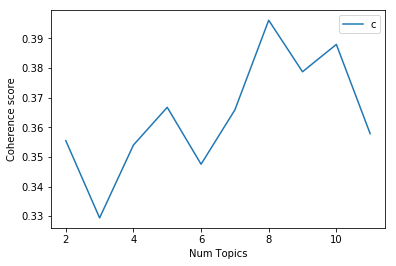

In [27]:
# display the coherence score of the different models
model_list = hashtag_pooling_models[0]
coherence_values = hashtag_pooling_models[1]

limit=12; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### After training several models, an LDA model with hashtag pooling and 8 topics reached a coherence of almost 0.40. This model is saved and used for further purposes.

In [35]:
# extract models (5-10 topics)
five_topics_lda = model_list[3]
six_topics_lda = model_list[4]
seven_topics_lda = model_list[5]
eight_topics_lda = model_list[6]
nine_topics_lda = model_list[7]
ten_topics_lda = model_list[8]

In [38]:
## Ignore this part!
# compute Perplexity
print('\nPerplexity: ', eight_topics_lda.log_perplexity(corpus_hashtag_pooling))
# a measure of how good the model is: the lower the better.

2018-09-22 00:03:26,097 : INFO : -7.913 per-word bound, 241.1 perplexity estimate based on a held-out corpus of 6198 documents with 114422 words



Perplexity:  -7.91349521381


In [32]:
eight_topics_lda.print_topics()

2018-09-21 23:49:47,469 : INFO : topic #0 (0.032): 0.011*"#workout" + 0.009*"#fit" + 0.008*"#fitness" + 0.008*"#selfie" + 0.007*"#yogaeverydamnday" + 0.007*"#fashion" + 0.006*"#sport" + 0.006*"#youtube" + 0.006*"#summer" + 0.005*"#photos"
2018-09-21 23:49:47,471 : INFO : topic #1 (0.051): 0.018*"#beach" + 0.017*"#weekend" + 0.017*"#summer" + 0.012*"#friends" + 0.011*"#love" + 0.010*"#sun" + 0.009*"#fun" + 0.008*"beach" + 0.008*"#españa" + 0.007*"#holiday"
2018-09-21 23:49:47,474 : INFO : topic #2 (0.034): 0.013*"#wanderlust" + 0.013*"#friends" + 0.011*"#travelblogger" + 0.010*"#love" + 0.008*"#gato" + 0.006*"#happy" + 0.006*"#fun" + 0.006*"#bethelona" + 0.006*"#travel" + 0.006*"love"
2018-09-21 23:49:47,476 : INFO : topic #3 (0.033): 0.039*"#streetart" + 0.033*"#graffiti" + 0.016*"#arteurbano" + 0.014*"#digerible" + 0.013*"#streetphotography" + 0.011*"#artecallejero" + 0.010*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#yogi"
2018-09-21 23:49:47,478 : INFO : topic #4 (0.047): 

[(0,
  '0.011*"#workout" + 0.009*"#fit" + 0.008*"#fitness" + 0.008*"#selfie" + 0.007*"#yogaeverydamnday" + 0.007*"#fashion" + 0.006*"#sport" + 0.006*"#youtube" + 0.006*"#summer" + 0.005*"#photos"'),
 (1,
  '0.018*"#beach" + 0.017*"#weekend" + 0.017*"#summer" + 0.012*"#friends" + 0.011*"#love" + 0.010*"#sun" + 0.009*"#fun" + 0.008*"beach" + 0.008*"#españa" + 0.007*"#holiday"'),
 (2,
  '0.013*"#wanderlust" + 0.013*"#friends" + 0.011*"#travelblogger" + 0.010*"#love" + 0.008*"#gato" + 0.006*"#happy" + 0.006*"#fun" + 0.006*"#bethelona" + 0.006*"#travel" + 0.006*"love"'),
 (3,
  '0.039*"#streetart" + 0.033*"#graffiti" + 0.016*"#arteurbano" + 0.014*"#digerible" + 0.013*"#streetphotography" + 0.011*"#artecallejero" + 0.010*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#yogi"'),
 (4,
  '0.017*"#art" + 0.014*"gothic" + 0.011*"#photooftheday" + 0.010*"#love" + 0.010*"quarter" + 0.008*"art" + 0.007*"#smile" + 0.007*"#contemporaryart" + 0.007*"claudia" + 0.007*"collec"'),
 (5,
  '0.020*"#wo

#### Manual inspection of the topics leads to the following labels:
#### Topic 0: Fitness & Sports
#### Topic 1: Summer, Sun & Beach
#### Topic 2: Travel
#### Topic 3: Streetart & Urban Life
#### Topic 4: Art
#### Topic 5: Lifestyle & Other
#### Topic 6: Sightseeing
#### Topic 7: Gastronomy

## Save Top Performing Model

In [33]:
eight_topics_lda.save('lda.model') 

2018-09-21 23:59:29,054 : INFO : saving LdaState object under lda.model.state, separately None
2018-09-21 23:59:29,061 : INFO : saved lda.model.state
2018-09-21 23:59:29,069 : INFO : saving LdaModel object under lda.model, separately ['expElogbeta', 'sstats']
2018-09-21 23:59:29,071 : INFO : storing np array 'expElogbeta' to lda.model.expElogbeta.npy
2018-09-21 23:59:29,075 : INFO : not storing attribute dispatcher
2018-09-21 23:59:29,077 : INFO : not storing attribute id2word
2018-09-21 23:59:29,079 : INFO : not storing attribute state
2018-09-21 23:59:29,083 : INFO : saved lda.model


## Visualize Model

In [40]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(eight_topics_lda, corpus_hashtag_pooling, dictionary_hashtag_pooling)

In [41]:
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      27.257570        1       1  0.170798  0.017291
4      16.132707        1       2  0.082960 -0.078106
1      14.607106        1       3  0.040717  0.082522
2       8.817934        1       4  0.023569 -0.025035
0       8.546187        1       5 -0.111867  0.109445
3       8.392901        1       6 -0.012170 -0.316201
5       8.202958        1       7  0.123290  0.172067
7       8.042636        1       8 -0.317296  0.038017, topic_info=     Category         Freq                      Term        Total  loglift  \
term                                                                         
120   Default  1677.000000           #sagradafamilia  1677.000000  30.0000   
238   Default  1299.000000                   sagrada  1299.000000  29.0000   
183   Default   732.000000                   familia   732.000000  28.0000   
1004  Default   394.000000                #streetart   394.000000  27.0000   
492   Default   803.000000                    #gaudi   803.000000  26.0000   
726   Default   369.000000                 #graffiti   369.000000  25.0000   
157   Default   596.000000                  basílica   596.000000  24.0000   
584   Default   288.000000                  #weekend   288.000000  23.0000   
560   Default   324.000000                    #beach   324.000000  22.0000   
4     Default   454.000000             #architecture   454.000000  21.0000   
1572  Default   187.000000                     #work   187.000000  20.0000   
133   Default   949.000000                   #travel   949.000000  19.0000   
5     Default   460.000000                      #art   460.000000  18.0000   
1029  Default   155.000000               #arteurbano   155.000000  17.0000   
185   Default   269.000000                   família   269.000000  16.0000   
829   Default   163.000000               #wanderlust   163.000000  15.0000   
48    Default   475.000000                  #friends   475.000000  14.0000   
105   Default   247.000000            #photooftheday   247.000000  13.0000   
4628  Default   130.000000                #digerible   130.000000  12.0000   
125   Default   554.000000                   #summer   554.000000  11.0000   
1763  Default   244.000000                   #church   244.000000  10.0000   
448   Default   150.000000        #streetphotography   150.000000   9.0000   
190   Default   504.000000                    gothic   504.000000   8.0000   
2370  Default   128.000000            #travelblogger   128.000000   7.0000   
4481  Default   106.000000            #artecallejero   106.000000   6.0000   
5039  Default   100.000000                     #vino   100.000000   5.0000   
851   Default   143.000000                  #workout   143.000000   4.0000   
144   Default    98.000000       #welcometobarcelona    98.000000   3.0000   
4612  Default    97.000000                #artederua    97.000000   2.0000   
695   Default   244.000000                      #fun   244.000000   1.0000   
...       ...          ...                       ...          ...      ...   
9855   Topic8    20.954085           #youknowimright    21.358810   2.5013   
5879   Topic8    21.147406                  #wem2017    21.561214   2.5010   
8347   Topic8    20.609380                 #nintendo    21.013311   2.5010   
8348   Topic8    20.609380             #nintendolife    21.013311   2.5010   
564    Topic8    20.745336          #circuitfestival    21.153080   2.5009   
566    Topic8    20.745336             #circuitparty    21.153080   2.5009   
573    Topic8    20.745336                 #gayparty    21.153080   2.5009   
565    Topic8    20.745336               #circuitgay    21.153082   2.5009   
4466   Topic8    20.213249  #documentaryphotographer    20.620285   2.5005   
4465   Topic8    20.213260  #arquitecturephotography    20.620372   2.5005   
2606   Topic8    22.724130                    anyone    23.1826

In [101]:
# display the 10 most important words for each topic
n_topics = 8
topic_terms = []

for i in range(0, n_topics):
    temp = eight_topics_lda.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    topic_terms.append(terms)
    print("Top 10 terms for topic #" + str(i) + ": "+ ", ".join([str(i[0]) for i in terms]))

Top 10 terms for topic #0: #workout, #fit, #fitness, #selfie, #yogaeverydamnday, #fashion, #sport, #youtube, #summer, #photos
Top 10 terms for topic #1: #beach, #weekend, #summer, #friends, #love, #sun, #fun, beach, #españa, #holiday
Top 10 terms for topic #2: #wanderlust, #friends, #travelblogger, #love, #gato, #happy, #fun, #bethelona, #travel, love
Top 10 terms for topic #3: #streetart, #graffiti, #arteurbano, #digerible, #streetphotography, #artecallejero, #artederua, arte, urbano, #yogi
Top 10 terms for topic #4: #art, gothic, #photooftheday, #love, quarter, art, #smile, #contemporaryart, claudia, collec
Top 10 terms for topic #5: #work, #welcometobarcelona, #women, #lapedrera, #blackandwhite, #friends, #nofilter, #casamila, #summer, gaudi
Top 10 terms for topic #6: #sagradafamilia, sagrada, #gaudi, #travel, familia, basílica, #architecture, #photography, família, #church
Top 10 terms for topic #7: #vino, #window, #yum, #gym, por, #fitfam, el, wa, #wine, #whitewine


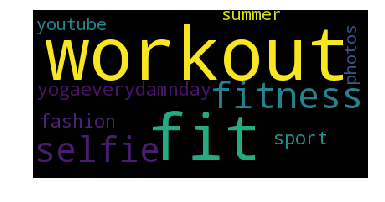

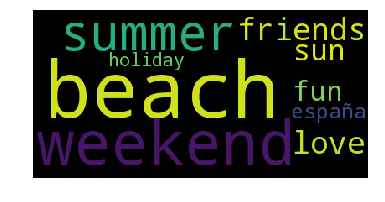

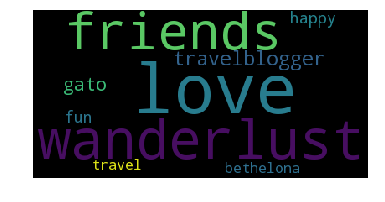

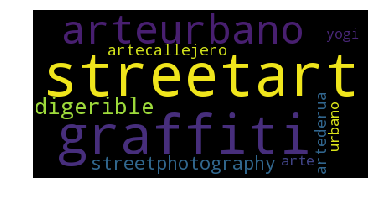

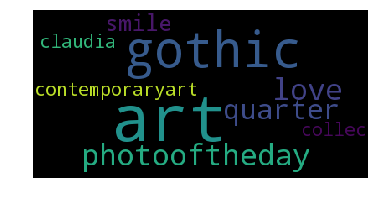

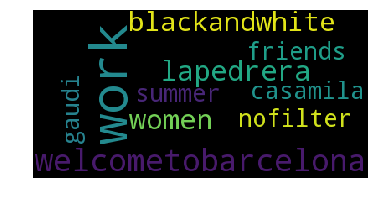

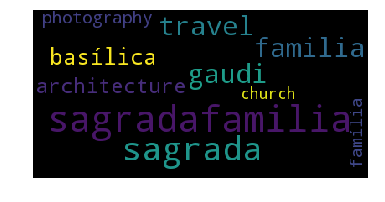

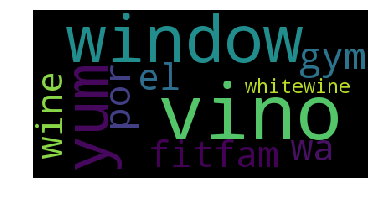

In [144]:
# display wordclouds for the topics
def terms_to_wordcounts(terms, multiplier=1000):
    return  " ".join([" ".join(int(multiplier*i[1]) * [i[0]]) for i in terms])

wordclouds = []

for topic in topic_terms:
    wordcloud = WordCloud(background_color="black", collocations=False).generate(terms_to_wordcounts(topic))
    
    _ = plt.imshow(wordcloud)
    _ = plt.axis("off")
    _ = plt.savefig("terms_wordcloud_topic" + )
    _ = plt.show()